In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy
from gurobipy import *


In [2]:
import numpy as np
import pandas as pd

In [3]:
lower_data = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_lower")
upper_data = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_upper")

In [4]:
%matplotlib inline


In [5]:
age_groups = ['age_group_0_9', 'age_group_10_19', 'age_group_20_29','age_group_30_39', 'age_group_40_49', 'age_group_50_59', 'age_group_60_69', 'age_group_70_79', 'age_group_80_plus']
econ_activities = ['transport', 'leisure', 'other']
cont = [ 'S', 'E', 'I', 'R', 'N', 'Ia', 'Ips', \
           'Ims', 'Iss', 'Rq', 'H', 'ICU', 'D' ]

In [6]:
data = pd.read_csv("donnees-hospitalieres-classe-age-covid19-2020-07-27-19h00.csv", sep=";")
data.head()

,reg,cl_age90,jour,hosp,rea,rad,dc
0,1,0,2020-03-18,0,0,0,0
1,1,9,2020-03-18,0,0,0,0
2,1,19,2020-03-18,0,0,0,0
3,1,29,2020-03-18,0,0,0,0
4,1,39,2020-03-18,0,0,0,0


In [7]:
# Extract days 
days = data[data['reg']==11][data['cl_age90']==0].jour.values
days

/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array(['2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-05-01',
       '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
       '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
       '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
       '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
       '2020-05-18', '2020-05-19', '2020-05-20', '2020-

In [8]:
beds_real = {
    age_groups[i]:data[data['reg']==11][data['cl_age90']==10*i+9].hosp.values for i in range(0,9)
}
beds_real['age_group_80_plus']+=data[data['reg']==11][data['cl_age90']==90].hosp.values
beds_real['total']=data[data['reg']==11][data['cl_age90']==0].hosp.values

icus_real = {
    age_groups[i]:data[data['reg']==11][data['cl_age90']==10*i+9].rea.values for i in range(0,9)
}
icus_real['age_group_80_plus']+=data[data['reg']==11][data['cl_age90']==90].rea.values
icus_real['total']=data[data['reg']==11][data['cl_age90']==0].rea.values

deaths_real = {
    age_groups[i]:data[data['reg']==11][data['cl_age90']==10*i+9].dc.values for i in range(0,9)
}
deaths_real['age_group_80_plus']+=data[data['reg']==11][data['cl_age90']==90].dc.values
deaths_real['total']=data[data['reg']==11][data['cl_age90']==0].dc.values


/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/sergioacamelogomez/opt/anaconda3/lib/pyth

In [9]:
mult_deaths = np.sum(data[data['reg']==11][data['cl_age90']==0].hosp.values)/np.sum(data[data['reg']==11][data['cl_age90']==0].dc.values)
print(mult_deaths)
mult_icus = np.sum(data[data['reg']==11][data['cl_age90']==0].hosp.values)/np.sum(data[data['reg']==11][data['cl_age90']==0].rea.values)
print(mult_icus)


1.2044049618865522
6.93086556254271


/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
import yaml
from inspect import getsourcefile
import os.path
import sys
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import argparse
current_path = os.path.abspath(getsourcefile(lambda:0))
current_dir = os.path.dirname(current_path)
parentdir = os.path.dirname(current_dir)
sys.path.insert(0,parentdir) 
sys.path.insert(0, parentdir+"/heuristics")
sys.path.insert(0, parentdir+"/heuristics/LP-Models")
sys.path.insert(0, parentdir+"/fast_gradient")


from fast_group import FastDynamicalModel
from aux import *


In [11]:
region = "Ile-de-France"

In [12]:
# Read group parameters
with open("../parameters/"+region+".yaml") as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    universe_params = yaml.load(file, Loader=yaml.FullLoader)
    
# Read initialization
with open("../initialization/patient_zero.yaml") as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    original_initialization = yaml.load(file, Loader=yaml.FullLoader)

# Read econ parameters
with open("../parameters/econ.yaml") as file:
    econ_params = yaml.load(file, Loader=yaml.FullLoader)

experiment_params = {
    'delta_schooling':0.5,
    'xi':0,
    'icus':3000,
}

In [13]:
date_1 = datetime.strptime("2020-03-17", '%Y-%m-%d')
date_2 = datetime.strptime("2020-04-14", '%Y-%m-%d')
date_3 = datetime.strptime("2020-05-11", '%Y-%m-%d')
date_4 = datetime.strptime("2020-06-02", '%Y-%m-%d')
date_5 = datetime.strptime("2020-06-15", '%Y-%m-%d')
date_6 = datetime.strptime("2020-06-22", '%Y-%m-%d')
date_7 = datetime.strptime("2020-07-06", '%Y-%m-%d')
#final_date = datetime.strptime(days[-1], '%Y-%m-%d') + timedelta(days=1)
final_date = datetime.strptime("2020-07-27", '%Y-%m-%d')

In [14]:
(final_date-date_1).days+140

272

In [15]:
from copy import deepcopy

In [16]:
# Create model
mixing_method = {}
dynModel = FastDynamicalModel(universe_params, econ_params, experiment_params, 1, mixing_method)


In [17]:
params = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params", index_col = 0)
initial_params = {
    "mu":params['mu'].values,
    "sigma":params['sigma'].values,
    "p_ICU":params['p_ICU'].values,
    "p_H":params['p_H'].values,
    "lambda_H_R":params['lambda_HR'].values,
    "lambda_H_D":params['lambda_HD'].values,
    "lambda_ICU_R":params['lambda_ICUR'].values,
    "lambda_ICU_D":params['lambda_ICUD'].values
}

params = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_lower", index_col = 0)
lower_params = {
    "mu":params['mu'].values,
    "sigma":params['sigma'].values,
    "p_ICU":params['p_ICU'].values,
    "p_H":params['p_H'].values,
    "lambda_H_R":params['lambda_HR'].values,
    "lambda_H_D":params['lambda_HD'].values,
    "lambda_ICU_R":params['lambda_ICUR'].values,
    "lambda_ICU_D":params['lambda_ICUD'].values
}

params = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_upper", index_col = 0)
upper_params = {
    "mu":params['mu'].values,
    "sigma":params['sigma'].values,
    "p_ICU":params['p_ICU'].values,
    "p_H":params['p_H'].values,
    "lambda_H_R":params['lambda_HR'].values,
    "lambda_H_D":params['lambda_HD'].values,
    "lambda_ICU_R":params['lambda_ICUR'].values,
    "lambda_ICU_D":params['lambda_ICUD'].values
}

In [18]:
# Construct the windows for the parameters to move
windows = {}
for p in initial_params:
    windows[p] = (
        np.min(upper_params[p]/initial_params[p]),
        np.max(lower_params[p]/initial_params[p]),
    )
    
windows['beta_mixing'] = (0.1,4.0)
windows['alpha_mixing'] = (0.1,4.0)
windows['gamma_mixing'] = (0.5,2.0)

In [23]:
import copy
import math
best_v = 0
best_error = float('inf')
def error(v):

    days_ahead = v[0]
    alpha_mixing = v[1]
    beta_mixing = v[2]
    gamma_mixing_before = v[3]
    gamma_mixing_after = v[3]*(1-v[4])
    gamma_change = v[5] + v[0]

    upper_bound_home = 1.0
    upper_bound_leisure = 1.0
    upper_bound_other = 1.0
    upper_bound_school = 1.0
    upper_bound_work = 1.0
    upper_bound_transport = 1.0
    
    work_v = v[6:13]
    work_1 = work_v[0]
    work_2 = work_v[1]
    work_3 = work_v[2]
    work_4 = work_v[3]
    work_5 = work_v[4]
    work_6 = work_v[5]
    work_7 = work_v[6]
    work_denom = work_1+work_2+work_3+work_4+work_5+work_6+work_7

    leisure_alpha = v[13]
    leisure_beta = v[14]
    
    other_alpha = v[15]
    other_beta = v[16]
    
    transport_alpha = v[17]
    transport_beta = v[18]
    
    school_alpha = v[19]
    school_beta = v[20]
    

    # Construct initialization
    initialization = copy.deepcopy(original_initialization)
    for i,group in enumerate(age_groups):
        if group == "age_group_40_49":
            initialization[group]["I"] = initialization[group]["I"] + 1
            initialization[group]["S"] = initialization[group]["S"] - 1
        initialization[group]["N"] = initialization[group]["S"] + initialization[group]["E"] + initialization[group]["I"] + initialization[group]["R"]


    # Alphas
    a_before_date_1 = {
        'home':upper_bound_home,
        'leisure':upper_bound_leisure,
        'other':upper_bound_other,
        'school':upper_bound_school,
        'transport':upper_bound_transport,
        'work':upper_bound_work
    }
    
    work_between_date_1_2 = work_1/work_denom
    a_between_date_1_2 = {
        'home':upper_bound_home,
        'leisure':(work_between_date_1_2*leisure_alpha + leisure_beta)*upper_bound_leisure,
        'other':(work_between_date_1_2*other_alpha + other_beta)*upper_bound_other,
        'school':(work_between_date_1_2*school_alpha + school_beta)*upper_bound_school,
        'transport':(work_between_date_1_2*transport_alpha + transport_beta)*upper_bound_transport,
        'work':work_between_date_1_2*upper_bound_work
    }
    
    violation = (
        max(-(1-leisure_alpha)*work_between_date_1_2*upper_bound_work + leisure_beta,0)+
        max(-(1-other_alpha)*work_between_date_1_2*upper_bound_work + other_beta,0)+
        max(-(1-school_alpha)*work_between_date_1_2*upper_bound_work + school_beta,0)+
        max(-(1-transport_alpha)*work_between_date_1_2*upper_bound_work + transport_beta,0)
    )
    
    work_between_date_2_3 = work_1/work_denom
    a_between_date_2_3 = {
        'home':upper_bound_home,
        'leisure':(work_between_date_2_3*leisure_alpha + leisure_beta)*upper_bound_leisure,
        'other':(work_between_date_2_3*other_alpha + other_beta)*upper_bound_other,
        'school':(work_between_date_2_3*school_alpha + school_beta)*upper_bound_school,
        'transport':(work_between_date_2_3*transport_alpha + transport_beta)*upper_bound_transport,
        'work':work_between_date_2_3*upper_bound_work
    }
    
    work_between_date_3_4 = (work_1+work_2)/work_denom
    a_between_date_3_4 = {
        'home':upper_bound_home,
        'leisure':(work_between_date_3_4*leisure_alpha + leisure_beta)*upper_bound_leisure,
        'other':(work_between_date_3_4*other_alpha + other_beta)*upper_bound_other,
        'school':(work_between_date_3_4*school_alpha + school_beta)*upper_bound_school,
        'transport':(work_between_date_3_4*transport_alpha + transport_beta)*upper_bound_transport,
        'work':work_between_date_3_4*upper_bound_work
    }
    
    work_between_date_4_5 = (work_1+work_2+work_3)/work_denom
    a_between_date_4_5 = {
        'home':upper_bound_home,
        'leisure':(work_between_date_4_5*leisure_alpha + leisure_beta)*upper_bound_leisure,
        'other':(work_between_date_4_5*other_alpha + other_beta)*upper_bound_other,
        'school':(work_between_date_4_5*school_alpha + school_beta)*upper_bound_school,
        'transport':(work_between_date_4_5*transport_alpha + transport_beta)*upper_bound_transport,
        'work':work_between_date_4_5*upper_bound_work
    }
    
    work_between_date_5_6 = (work_1+work_2+work_3+work_4)/work_denom
    a_between_date_5_6 = {
        'home':upper_bound_home,
        'leisure':(work_between_date_5_6*leisure_alpha + leisure_beta)*upper_bound_leisure,
        'other':(work_between_date_5_6*other_alpha + other_beta)*upper_bound_other,
        'school':(work_between_date_5_6*school_alpha + school_beta)*upper_bound_school,
        'transport':(work_between_date_5_6*transport_alpha + transport_beta)*upper_bound_transport,
        'work':work_between_date_5_6*upper_bound_work
    }
    
    work_between_date_6_7 = (work_1+work_2+work_3+work_4+work_5)/work_denom
    a_between_date_6_7 = {
        'home':upper_bound_home,
        'leisure':(work_between_date_6_7*leisure_alpha + leisure_beta)*upper_bound_leisure,
        'other':(work_between_date_6_7*other_alpha + other_beta)*upper_bound_other,
        'school':(work_between_date_6_7*school_alpha + school_beta)*upper_bound_school,
        'transport':(work_between_date_6_7*transport_alpha + transport_beta)*upper_bound_transport,
        'work':work_between_date_6_7*upper_bound_work
    }
    
    work_after_date_7 = (work_1+work_2+work_3+work_4+work_5+work_6)/work_denom
    a_after_date_7 = {
        'home':upper_bound_home,
        'leisure':(work_after_date_7*leisure_alpha + leisure_beta)*upper_bound_leisure,
        'other':(work_after_date_7*other_alpha + other_beta)*upper_bound_other,
        'school':(work_after_date_7*school_alpha + school_beta)*upper_bound_school,
        'transport':(work_after_date_7*transport_alpha + transport_beta)*upper_bound_transport,
        'work':work_after_date_7*upper_bound_work
    }

    # Determine mixing method
    mixing_method_before = {
        "name":"mult",
        "param_alpha":alpha_mixing,
        "param_beta":beta_mixing,
        "fixed_gamma":gamma_mixing_before,
    }

    # Determine mixing method
    mixing_method_after = {
        "name":"mult",
        "param_alpha":alpha_mixing,
        "param_beta":beta_mixing,
        "fixed_gamma":gamma_mixing_after,
    }
    #dynModel.mixing_method = mixing_method_after

    # Number of days
    days_before_date_1 = int(days_ahead)
    days_between_dates_1_2 = (date_2-date_1).days
    days_between_dates_2_3 = (date_3-date_2).days
    days_between_dates_3_4 = (date_4-date_3).days
    days_between_dates_4_5 = (date_5-date_4).days
    days_between_dates_5_6 = (date_6-date_5).days
    days_between_dates_6_7 = (date_7-date_6).days

    days_after_date_7 = (final_date-date_7).days
    total_days = days_before_date_1 + days_between_dates_1_2 + days_between_dates_2_3 + days_between_dates_3_4 + days_between_dates_4_5+ days_between_dates_5_6+ days_between_dates_6_7 + days_after_date_7



    # Calculate alphas
    alphas_vec = []
    for t in range(days_before_date_1):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_before_date_1
        alphas_vec.append(alphas)
    for t in range(days_between_dates_1_2):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_1_2
        alphas_vec.append(alphas)
    for t in range(days_between_dates_2_3):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_2_3
        alphas_vec.append(alphas)
    for t in range(days_between_dates_3_4):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_3_4
        alphas_vec.append(alphas)
    for t in range(days_between_dates_4_5):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_4_5
        alphas_vec.append(alphas)
    for t in range(days_between_dates_5_6):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_5_6
        alphas_vec.append(alphas)
    for t in range(days_between_dates_6_7):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_6_7
        alphas_vec.append(alphas)
    for t in range(days_after_date_7):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_after_date_7
        alphas_vec.append(alphas)

    mixing_vec = []
    for t in range(int(gamma_change)):
        mixing_vec.append(mixing_method_before)
    for t in range(int(gamma_change),total_days):
        mixing_vec.append(mixing_method_after)
        
        
        
        
    # Calculate tests
    tests = np.zeros(len(age_groups))


    # Run model
    model_data_beds = {ag:[] for ag in age_groups+["total"]}
    model_data_icus = {ag:[] for ag in age_groups+["total"]}
    model_data_deaths = {ag:[] for ag in age_groups+["total"]}

    state = state_to_matrix(initialization)
    t_beds = 0
    t_icus = 0
    t_deaths = 0
    for i,ag in enumerate(age_groups):
        state_H = state[i,cont.index("H")]
        state_ICU = state[i,cont.index("ICU")]
        state_D = state[i,cont.index("D")]
        model_data_beds[ag].append(state_H)
        model_data_icus[ag].append(state_ICU)
        model_data_deaths[ag].append(state_D)
        t_beds+= state_H
        t_icus+= state_ICU
        t_deaths+= state_D
    model_data_beds["total"].append(t_beds)
    model_data_icus["total"].append(t_icus)
    model_data_deaths["total"].append(t_deaths)

    recalc_days = [0,
                 days_before_date_1,
                 days_before_date_1+days_between_dates_1_2,
                 days_before_date_1+days_between_dates_1_2+days_between_dates_2_3,
                 days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4,
                 days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5,
                 days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5+days_between_dates_5_6,
                 days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5+days_between_dates_5_6+days_between_dates_6_7,
                int(gamma_change)
                ]

    for t in range(total_days):
        if t in recalc_days:
            update_contacts = True
        else:
            update_contacts = False
        dynModel.mixing_method = mixing_vec[t]
        state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]), "", update_contacts=update_contacts)
        t_beds = 0
        t_icus = 0
        t_deaths = 0
        for i,ag in enumerate(age_groups):
            state_H = state[i,cont.index("H")]
            state_ICU = state[i,cont.index("ICU")]
            state_D = state[i,cont.index("D")]
            model_data_beds[ag].append(state_H)
            model_data_icus[ag].append(state_ICU)
            model_data_deaths[ag].append(state_D)
            t_beds+= state_H
            t_icus+= state_ICU
            t_deaths+= state_D
        model_data_beds["total"].append(t_beds)
        model_data_icus["total"].append(t_icus)
        model_data_deaths["total"].append(t_deaths)


    initial_date = date_1-timedelta(days=days_before_date_1)

    # Calculate the days of the model
    days_model = [initial_date+timedelta(days = t) for t in range(total_days + 1)]

    # Indices where to put the real data
    indices = [(datetime.strptime(d, '%Y-%m-%d') - initial_date).days for d in days]

    # Real data
    real_data_beds = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
    real_data_icus = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
    real_data_deaths = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}

    for k,ind in enumerate(indices):
        for ag in age_groups+["total"]:
            real_data_beds[ag][ind] = beds_real[ag][k]
            real_data_icus[ag][ind] = icus_real[ag][k]
            real_data_deaths[ag][ind] = deaths_real[ag][k]


    error_beds = 0
    error_icus = 0
    error_deaths = 0
    for ag in age_groups:
        error_beds += np.nanmean(np.abs(np.array(model_data_beds[ag])-np.array(real_data_beds[ag])))
        error_icus += np.nanmean(np.abs(np.array(model_data_icus[ag])-np.array(real_data_icus[ag])))
        error_deaths += np.nanmean(np.abs(np.array(model_data_deaths[ag])-np.array(real_data_deaths[ag])))
    error_beds_total = np.nanmean(np.abs(np.array(model_data_beds["total"])-np.array(real_data_beds["total"])))
    error_icus_total = np.nanmean(np.abs(np.array(model_data_icus["total"])-np.array(real_data_icus["total"])))
    error_deaths_total = np.nanmean(np.abs(np.array(model_data_deaths["total"])-np.array(real_data_deaths["total"])))

    diff = np.array(model_data_beds["total"])-np.array(real_data_beds["total"])
    error_beds_above = np.nanmean([max(d,0) for d in diff])
    error_beds_below = -np.nanmean([min(d,0) for d in diff])

    cumm_beds_model = [sum([model_data_beds["total"][k] for k in range(i+1) if not math.isnan(real_data_beds["total"][k])]) for i in range(len(model_data_beds["total"]))]
    cumm_beds_real = [sum([real_data_beds["total"][k] for k in range(i+1) if not math.isnan(real_data_beds["total"][k])]) for i in range(len(real_data_beds["total"]))]
    diff_cumm = np.array(cumm_beds_model)-np.array(cumm_beds_real)
    error_cumm_above = np.nanmean([max(d,0) for d in diff_cumm])
    error_cumm_below = -np.nanmean([min(d,0) for d in diff_cumm])



    #     error = error_beds_total
    #     error = mult_icus*error_icus_total
    #     error = mult_deaths*error_deaths_total
    upper_model_data = model_data_beds["total"]
    upper_days_model = days_model
    upper_real_data = real_data_beds["total"]
    error = error_beds+5*error_beds_total + violation*1000000




    
    
    global best_error
    global best_v
    if error<best_error:
        best_error = error
        print(best_error)
        print("violation",violation)
        print("error_groups",error_beds)
        print("error_total",error_beds_total)
        best_v = v
        print(v)
        plt.figure(1)
        plt.plot(upper_days_model, upper_model_data, label="Upper")
        plt.plot(upper_days_model, upper_real_data, label="Model L1")
        plt.legend(loc='upper right')
        plt.show()
        print(a_before_date_1)
        print(a_between_date_1_2)
        print(a_between_date_2_3)
        print(a_between_date_3_4)
        print(a_between_date_4_5)
        print(a_between_date_5_6)
        print(a_between_date_6_7)
        print(a_after_date_7)
        

        # Calculate l-april and l-may
        l_april = a_between_date_1_2
        l_may = {}
        for a in a_between_date_1_2.keys():
            l_may[a] = a_between_date_1_2[a]/3.0 + a_between_date_3_4[a]*2.0/3.0

        eq_activities = ['leisure','other','school','transport']
        t = 0.5
        nu = (1-t)*(1-l_may["work"])/(1-0.5851)
        eta = t*(1-np.mean([l_may[act] for act in eq_activities]))/(1-0.5851)
        gamma = 1-nu-eta
        print(nu,eta,gamma)

    return error





In [24]:
%matplotlib inline

1088857.42251236
violation 1.050489026600636
error_groups 6458.949346945388
error_total 6381.88931295576
[ 1.24462130e+02  9.25218336e-01  3.59112605e+00  9.75450585e-01
  4.94254316e-01 -4.91619505e+01  9.59480782e-01  9.68625090e-01
  8.63337612e-01  9.65310525e-01  8.05038363e-01  8.82112388e-01
  2.25145783e-01  6.99086383e-01  5.73353132e-01  6.21463689e-01
  3.76060995e-01  3.05561929e-01  4.64556274e-02  2.73871107e-01
  3.38967622e-01  4.98292224e-01  6.90605862e-01  4.19437509e-01
  6.03747507e-01]


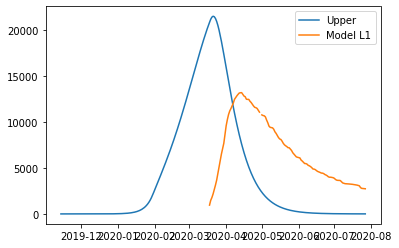

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.6916727596452888, 'other': 0.481243063745612, 'school': 0.3853200163471915, 'transport': 0.09817165928572376, 'work': 0.16924893771248542}
{'home': 1.0, 'leisure': 0.6916727596452888, 'other': 0.481243063745612, 'school': 0.3853200163471915, 'transport': 0.09817165928572376, 'work': 0.16924893771248542}
{'home': 1.0, 'leisure': 0.8111200295557797, 'other': 0.5874275679186268, 'school': 0.4321141705924151, 'transport': 0.15038056952598827, 'work': 0.34011089811165934}
{'home': 1.0, 'leisure': 0.9175836364494483, 'other': 0.6820700433719908, 'school': 0.4738219002560432, 'transport': 0.19691448277768134, 'work': 0.4924005284954308}
{'home': 1.0, 'leisure': 1.0366221665088902, 'other': 0.7878911919115794, 'school': 0.5204559283162943, 'transport': 0.24894473793264316, 'work': 0.6626778117203519}
{'home': 1.0, 'leisure': 1.135896525291873, 'other': 0.8761426736939956, 'schoo

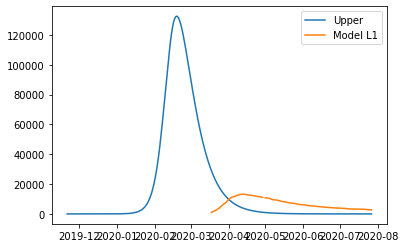

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.9163251561188732, 'other': 0.13241209628285278, 'school': 0.11475964920898417, 'transport': 0.36504630691521744, 'work': 0.16825186874284317}
{'home': 1.0, 'leisure': 0.9163251561188732, 'other': 0.13241209628285278, 'school': 0.11475964920898417, 'transport': 0.36504630691521744, 'work': 0.16825186874284317}
{'home': 1.0, 'leisure': 1.0119892306145297, 'other': 0.172754051378961, 'school': 0.1724235025347335, 'transport': 0.4021103674869054, 'work': 0.32725237700061477}
{'home': 1.0, 'leisure': 1.0946105386989073, 'other': 0.20759581531483653, 'school': 0.22222551040525765, 'transport': 0.43412114251918243, 'work': 0.46457487813383186}
{'home': 1.0, 'leisure': 1.1874548411913415, 'other': 0.24674866032824144, 'school': 0.27818967740609246, 'transport': 0.4700927114645542, 'work': 0.6188887244022716}
{'home': 1.0, 'leisure': 1.2747109723611496, 'other': 0.283544949259802

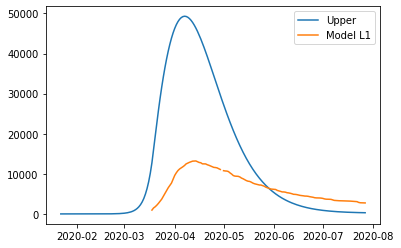

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.2525199336139885, 'other': 0.6255437154646735, 'school': 0.2845690054754345, 'transport': 0.2275010793587159, 'work': 0.14388207938642147}
{'home': 1.0, 'leisure': 0.2525199336139885, 'other': 0.6255437154646735, 'school': 0.2845690054754345, 'transport': 0.2275010793587159, 'work': 0.14388207938642147}
{'home': 1.0, 'leisure': 0.2670460002363023, 'other': 0.6996429408360518, 'school': 0.3370210771451941, 'transport': 0.3693291280091679, 'work': 0.30297567816267895}
{'home': 1.0, 'leisure': 0.28205333829897034, 'other': 0.7761971901207056, 'school': 0.39121096846967623, 'transport': 0.5158561630426078, 'work': 0.467340298160646}
{'home': 1.0, 'leisure': 0.29585828006107995, 'other': 0.8466178702308986, 'school': 0.4410591354600938, 'transport': 0.6506433702584635, 'work': 0.6185359330792491}
{'home': 1.0, 'leisure': 0.3085161476662008, 'other': 0.911187186122107, 'school

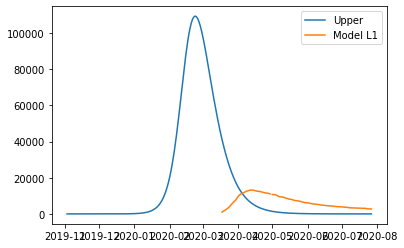

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.4630238977646976, 'other': 0.1279738326673982, 'school': 0.23520003463454317, 'transport': 0.3581089501168697, 'work': 0.16069331037420578}
{'home': 1.0, 'leisure': 0.4630238977646976, 'other': 0.1279738326673982, 'school': 0.23520003463454317, 'transport': 0.3581089501168697, 'work': 0.16069331037420578}
{'home': 1.0, 'leisure': 0.5646160919617804, 'other': 0.14524103122205884, 'school': 0.35825206486848227, 'transport': 0.4505904039198273, 'work': 0.32264005709864496}
{'home': 1.0, 'leisure': 0.665759549259948, 'other': 0.16243195985073144, 'school': 0.48076056922537136, 'transport': 0.5426633633387952, 'work': 0.4838714783840691}
{'home': 1.0, 'leisure': 0.7681011841216742, 'other': 0.17982653768746792, 'school': 0.6047203482883725, 'transport': 0.6358270483185972, 'work': 0.6470128983652602}
{'home': 1.0, 'leisure': 0.8567405110790893, 'other': 0.1948921918001844, 's

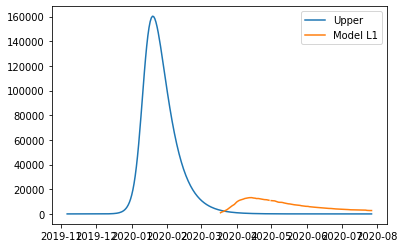

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.2143600757236882, 'other': 0.24417221866830074, 'school': 0.2281289824818903, 'transport': 0.5117416695381753, 'work': 0.16881320266378552}
{'home': 1.0, 'leisure': 0.2143600757236882, 'other': 0.24417221866830074, 'school': 0.2281289824818903, 'transport': 0.5117416695381753, 'work': 0.16881320266378552}
{'home': 1.0, 'leisure': 0.2970247393311337, 'other': 0.3532225975327366, 'school': 0.44268199014535914, 'transport': 0.6728379483838717, 'work': 0.35089316195612785}
{'home': 1.0, 'leisure': 0.37098446812864616, 'other': 0.4507895154165374, 'school': 0.6346416687673562, 'transport': 0.8169701153070428, 'work': 0.5137993400139408}
{'home': 1.0, 'leisure': 0.43876845721212826, 'other': 0.540209460625517, 'school': 0.810572448554367, 'transport': 0.949067046814821, 'work': 0.6631026267435968}
{'home': 1.0, 'leisure': 0.5060488584788432, 'other': 0.6289650779365357, 'schoo

/Users/sergioacamelogomez/Dropbox/covid-optimization/fast_gradient/fast_group.py:119: RuntimeWarning: overflow encountered in multiply
  self.B_H = self.flow_H*overflow_h/summ_entering_h
/Users/sergioacamelogomez/Dropbox/covid-optimization/fast_gradient/fast_group.py:137: RuntimeWarning: overflow encountered in multiply
  self.B_ICU = self.flow_ICU*overflow_icu/summ_entering_icu
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/sergioacamelogomez/Dropbox/covid-optimization/fast_gradient/fast_group.py:347: RuntimeWarning: invalid value encountered in multiply
  return self.economic_value - np.sum((self.econ_cost_death+self.experiment_params["xi"])*(self.new_state[:,cont.index("D")] - self.state[:,cont.index("D")]))
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:278: RuntimeWarning:

340223.2760894072
violation 0.29895963012278387
error_groups 6819.233615302359
error_total 6888.882470264191
[9.95212150e+01 3.22852052e+00 7.96948489e-01 5.26874910e-01
 8.34962500e-02 5.72927346e-01 9.57909291e-01 8.07756532e-01
 8.31175198e-01 9.30982675e-01 8.71631304e-01 8.03629414e-01
 4.86682762e-01 2.84461551e-01 5.76895827e-02 6.67720140e-01
 1.68802419e-02 3.89819231e-01 3.23120155e-01 7.29514071e-01
 1.24105438e-01 1.01188445e+00 7.47125213e-01 5.91837494e-01
 4.98377590e-01]


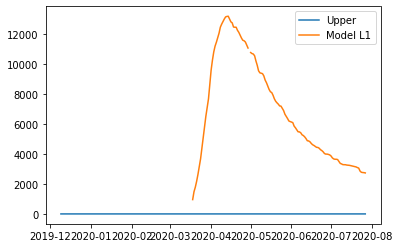

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.10558053397599132, 'other': 0.12929526813066777, 'school': 0.24692387472898997, 'transport': 0.38874875667088404, 'work': 0.16835650063854504}
{'home': 1.0, 'leisure': 0.10558053397599132, 'other': 0.12929526813066777, 'school': 0.24692387472898997, 'transport': 0.38874875667088404, 'work': 0.16835650063854504}
{'home': 1.0, 'leisure': 0.14596455477010928, 'other': 0.22408918293152447, 'school': 0.3504904598162235, 'transport': 0.4440900421704485, 'work': 0.3103230358131324}
{'home': 1.0, 'leisure': 0.1875193985246129, 'other': 0.32163138504432326, 'school': 0.4570596715207286, 'transport': 0.5010357951412061, 'work': 0.4564054979241731}
{'home': 1.0, 'leisure': 0.23406414589091457, 'other': 0.4308864500306021, 'school': 0.5764257089703226, 'transport': 0.5648195913519781, 'work': 0.6200295349624263}
{'home': 1.0, 'leisure': 0.27764160431288387, 'other': 0.53317636073438

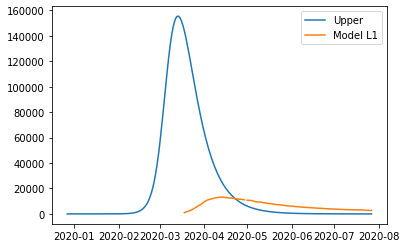

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.3367716029479853, 'other': 0.066435617685389, 'school': 0.08685801430537024, 'transport': 0.14471016396243327, 'work': 0.1520406505966344}
{'home': 1.0, 'leisure': 0.3367716029479853, 'other': 0.066435617685389, 'school': 0.08685801430537024, 'transport': 0.14471016396243327, 'work': 0.1520406505966344}
{'home': 1.0, 'leisure': 0.35807576042545636, 'other': 0.08929862976273448, 'school': 0.16822586177923557, 'transport': 0.19826340409568077, 'work': 0.29632083592352393}
{'home': 1.0, 'leisure': 0.3798474848890442, 'other': 0.11266342134775868, 'school': 0.2513795071308342, 'transport': 0.25299198885883767, 'work': 0.4437675699149641}
{'home': 1.0, 'leisure': 0.4017474645557018, 'other': 0.13616585274603848, 'school': 0.33502300287018677, 'transport': 0.3080429746226254, 'work': 0.5920828988971994}
{'home': 1.0, 'leisure': 0.42407919882495076, 'other': 0.16013163082695211

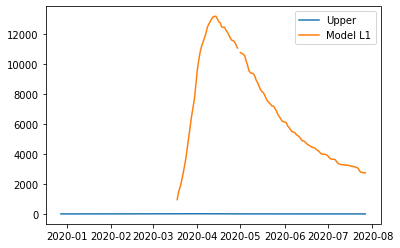

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.15238984097551728, 'other': 0.08537216879454534, 'school': 0.25576528970603635, 'transport': 0.20764094138139602, 'work': 0.15370620589622}
{'home': 1.0, 'leisure': 0.15238984097551728, 'other': 0.08537216879454534, 'school': 0.25576528970603635, 'transport': 0.20764094138139602, 'work': 0.15370620589622}
{'home': 1.0, 'leisure': 0.1592488378318951, 'other': 0.09328171044905464, 'school': 0.3354734160628874, 'transport': 0.2623284032910535, 'work': 0.316648223639626}
{'home': 1.0, 'leisure': 0.16557702302994373, 'other': 0.10057913971888624, 'school': 0.4090130015062877, 'transport': 0.31278365122628854, 'work': 0.46698030374040655}
{'home': 1.0, 'leisure': 0.1714271733396019, 'other': 0.10732531682441382, 'school': 0.47699736275515037, 'transport': 0.3594274796059028, 'work': 0.6059562087477907}
{'home': 1.0, 'leisure': 0.177197635765802, 'other': 0.11397960080813811, '

/Users/sergioacamelogomez/Dropbox/covid-optimization/fast_gradient/fast_group.py:119: RuntimeWarning: overflow encountered in multiply
  self.B_H = self.flow_H*overflow_h/summ_entering_h
/Users/sergioacamelogomez/Dropbox/covid-optimization/fast_gradient/fast_group.py:137: RuntimeWarning: overflow encountered in multiply
  self.B_ICU = self.flow_ICU*overflow_icu/summ_entering_icu
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/sergioacamelogomez/Dropbox/covid-optimization/fast_gradient/fast_group.py:347: RuntimeWarning: invalid value encountered in multiply
  return self.economic_value - np.sum((self.econ_cost_death+self.experiment_params["xi"])*(self.new_state[:,cont.index("D")] - self.state[:,cont.index("D")]))
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:278: RuntimeWarning:

156585.51390335624
violation 0.13750707328270081
error_groups 3494.845588433492
error_total 3116.7190064443853
[ 5.68200971e+01  3.72603990e+00  1.65029693e+00  1.68011845e+00
  2.99862449e-01 -3.96356988e+01  8.34923181e-01  9.44750655e-01
  8.67383517e-01  8.20137540e-01  8.51517795e-01  8.65627403e-01
  5.40590697e-01  1.03103822e-01  1.27623634e-01  5.95989913e-03
  1.82533744e-01  4.66603368e-01  7.69334692e-04  3.94932442e-01
  1.88186988e-01  1.62977452e+00  7.82368583e-01  1.07426111e+00
  2.62909933e-02]


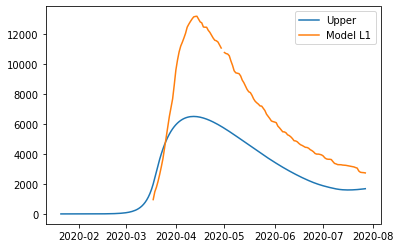

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.14266028201932376, 'other': 0.18340293465323762, 'school': 0.24578388523410682, 'transport': 0.06881871079822624, 'work': 0.14583987330232182}
{'home': 1.0, 'leisure': 0.14266028201932376, 'other': 0.18340293465323762, 'school': 0.24578388523410682, 'transport': 0.06881871079822624, 'work': 0.14583987330232182}
{'home': 1.0, 'leisure': 0.15967488128275725, 'other': 0.1843864607096518, 'school': 0.31095719422767454, 'transport': 0.14581943865474542, 'work': 0.3108638167591224}
{'home': 1.0, 'leisure': 0.1752961278834986, 'other': 0.1852894442491184, 'school': 0.37079335703186317, 'transport': 0.2165144541329136, 'work': 0.46237368636302567}
{'home': 1.0, 'leisure': 0.1900664924357483, 'other': 0.18614324269449786, 'school': 0.4273702718335083, 'transport': 0.28335874494578167, 'work': 0.6056308837244238}
{'home': 1.0, 'leisure': 0.2054020034335111, 'other': 0.187029709335

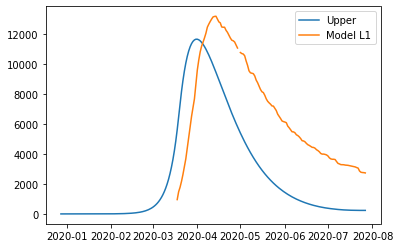

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.23652214921704434, 'other': 0.11841997511544153, 'school': 0.20078369662370882, 'transport': 0.168566125943304, 'work': 0.1664826437859372}
{'home': 1.0, 'leisure': 0.23652214921704434, 'other': 0.11841997511544153, 'school': 0.20078369662370882, 'transport': 0.168566125943304, 'work': 0.1664826437859372}
{'home': 1.0, 'leisure': 0.2663386449756972, 'other': 0.20215675626319526, 'school': 0.30596996756035866, 'transport': 0.22797168384777097, 'work': 0.3313315016891606}
{'home': 1.0, 'leisure': 0.2956281905718763, 'other': 0.28441364819834647, 'school': 0.40929727012565015, 'transport': 0.28632736088619015, 'work': 0.49326696785249413}
{'home': 1.0, 'leisure': 0.3261036802438975, 'other': 0.37000115082417395, 'school': 0.5168083317713845, 'transport': 0.34704587995806524, 'work': 0.6617592583999589}
{'home': 1.0, 'leisure': 0.35576597299271984, 'other': 0.453304867543732

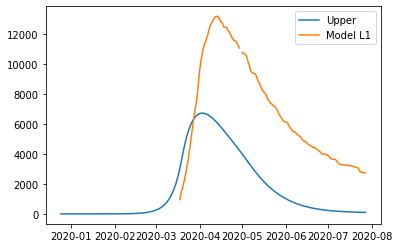

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.15517474718667568, 'other': 0.1882624709648788, 'school': 0.10443940732615202, 'transport': 0.13717570639871837, 'work': 0.1493454862934085}
{'home': 1.0, 'leisure': 0.15517474718667568, 'other': 0.1882624709648788, 'school': 0.10443940732615202, 'transport': 0.13717570639871837, 'work': 0.1493454862934085}
{'home': 1.0, 'leisure': 0.17518246545009125, 'other': 0.22704311242790542, 'school': 0.13428380579498297, 'transport': 0.16823621837649683, 'work': 0.3171881320048151}
{'home': 1.0, 'leisure': 0.19456942452418427, 'other': 0.26462054624680914, 'school': 0.16320225237087832, 'transport': 0.19833304734047924, 'work': 0.47982329411845015}
{'home': 1.0, 'leisure': 0.21519682522276387, 'other': 0.3046023082985324, 'school': 0.19397099659846512, 'transport': 0.2303555707503671, 'work': 0.6528643906501582}
{'home': 1.0, 'leisure': 0.23321818166358493, 'other': 0.33953281629

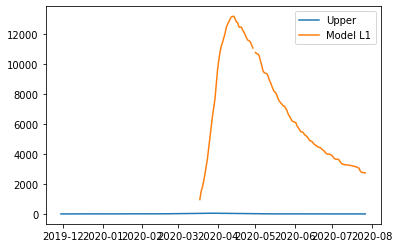

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.07327101665998204, 'other': 0.12711994830854823, 'school': 0.04576310499810268, 'transport': 0.029402741814738568, 'work': 0.15332484737865262}
{'home': 1.0, 'leisure': 0.07327101665998204, 'other': 0.12711994830854823, 'school': 0.04576310499810268, 'transport': 0.029402741814738568, 'work': 0.15332484737865262}
{'home': 1.0, 'leisure': 0.08580866437059328, 'other': 0.1386114080209764, 'school': 0.06258229464711428, 'transport': 0.034975411191475306, 'work': 0.306555765086356}
{'home': 1.0, 'leisure': 0.09909485949883243, 'other': 0.15078895356792943, 'school': 0.08040565679075626, 'transport': 0.04088079108676648, 'work': 0.46893517782265853}
{'home': 1.0, 'leisure': 0.11327678655040632, 'other': 0.16378748783204236, 'school': 0.09943063868325197, 'transport': 0.04718430131512712, 'work': 0.6422619251627646}
{'home': 1.0, 'leisure': 0.12612667870834834, 'other': 0.1755

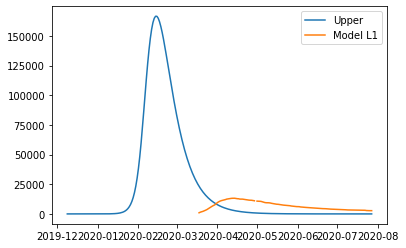

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.02983216045959749, 'other': 0.13517388659237356, 'school': 0.13935143639990147, 'transport': 0.03638100004524765, 'work': 0.150069752936529}
{'home': 1.0, 'leisure': 0.02983216045959749, 'other': 0.13517388659237356, 'school': 0.13935143639990147, 'transport': 0.03638100004524765, 'work': 0.150069752936529}
{'home': 1.0, 'leisure': 0.042625380161466844, 'other': 0.23749850720067187, 'school': 0.16176173710669, 'transport': 0.05053024338366741, 'work': 0.29439986181472994}
{'home': 1.0, 'leisure': 0.05554373556587357, 'other': 0.3408240066795815, 'school': 0.18439124210984564, 'transport': 0.06481788624517726, 'work': 0.44014172238583193}
{'home': 1.0, 'leisure': 0.06919574112540622, 'other': 0.4500174952598986, 'school': 0.20830590604664734, 'transport': 0.07991694287210765, 'work': 0.5941604522076326}
{'home': 1.0, 'leisure': 0.0815029338019302, 'other': 0.5484547026811

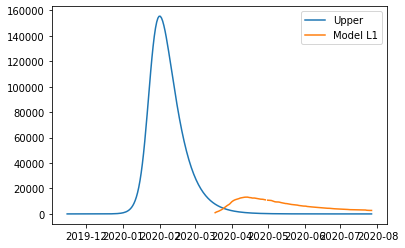

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.08759184008546111, 'other': 0.10451386268118366, 'school': 0.08946111308428364, 'transport': 0.14642342513777024, 'work': 0.15665642434395466}
{'home': 1.0, 'leisure': 0.08759184008546111, 'other': 0.10451386268118366, 'school': 0.08946111308428364, 'transport': 0.14642342513777024, 'work': 0.15665642434395466}
{'home': 1.0, 'leisure': 0.10954276650536571, 'other': 0.1635115283748928, 'school': 0.17329919185992257, 'transport': 0.20160247809752807, 'work': 0.30531678490080405}
{'home': 1.0, 'leisure': 0.13344165613989267, 'other': 0.22774474906621348, 'school': 0.2645772068968151, 'transport': 0.2616782157496386, 'work': 0.46716952323240896}
{'home': 1.0, 'leisure': 0.15600649320367094, 'other': 0.2883924268933616, 'school': 0.35076001991909667, 'transport': 0.31840048412012034, 'work': 0.6199875296180554}
{'home': 1.0, 'leisure': 0.17929267160543672, 'other': 0.35097885

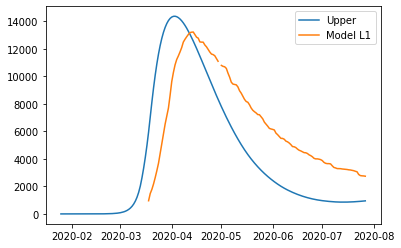

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.07455121409932047, 'other': 0.17948529176111364, 'school': 0.15438483322630975, 'transport': 0.120781243545412, 'work': 0.16521193098056164}
{'home': 1.0, 'leisure': 0.07455121409932047, 'other': 0.17948529176111364, 'school': 0.15438483322630975, 'transport': 0.120781243545412, 'work': 0.16521193098056164}
{'home': 1.0, 'leisure': 0.12017904042884613, 'other': 0.18887156000007194, 'school': 0.25946724990849235, 'transport': 0.19573513036508364, 'work': 0.3097342534700446}
{'home': 1.0, 'leisure': 0.17242478512483364, 'other': 0.19961922460541692, 'school': 0.37979095488547165, 'transport': 0.2815604249226387, 'work': 0.4752182787033631}
{'home': 1.0, 'leisure': 0.22077555321206926, 'other': 0.2095656392241818, 'school': 0.49114439789966774, 'transport': 0.3609873512171687, 'work': 0.6283652913980243}
{'home': 1.0, 'leisure': 0.26797245859296087, 'other': 0.2192746884950

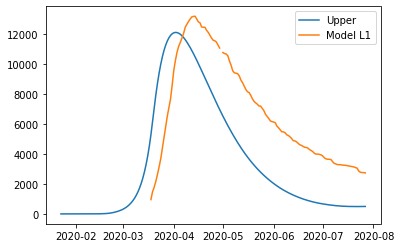

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.05532152449079716, 'other': 0.13378497197812755, 'school': 0.09082220650013612, 'transport': 0.06046403350805691, 'work': 0.136997392976647}
{'home': 1.0, 'leisure': 0.05532152449079716, 'other': 0.13378497197812755, 'school': 0.09082220650013612, 'transport': 0.06046403350805691, 'work': 0.136997392976647}
{'home': 1.0, 'leisure': 0.056499715905899854, 'other': 0.23577989725427645, 'school': 0.15520334225521917, 'transport': 0.12420316692915478, 'work': 0.2953069885091672}
{'home': 1.0, 'leisure': 0.05763959314084356, 'other': 0.3344579999053064, 'school': 0.21749083651661855, 'transport': 0.18586953644298784, 'work': 0.44846843724110846}
{'home': 1.0, 'leisure': 0.05871310844538084, 'other': 0.42739121251027046, 'school': 0.27615204697073636, 'transport': 0.2439457830939008, 'work': 0.5927130578356781}
{'home': 1.0, 'leisure': 0.059677403831767825, 'other': 0.510869359

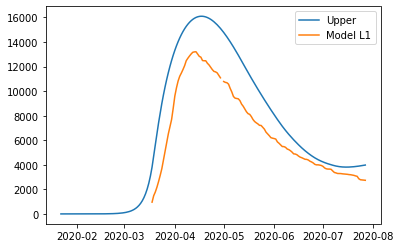

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.04919256282035518, 'other': 0.0513962497603304, 'school': 0.1371851901938516, 'transport': 0.09733592693406985, 'work': 0.15076657764489906}
{'home': 1.0, 'leisure': 0.04919256282035518, 'other': 0.0513962497603304, 'school': 0.1371851901938516, 'transport': 0.09733592693406985, 'work': 0.15076657764489906}
{'home': 1.0, 'leisure': 0.057957796116240676, 'other': 0.05917090254126962, 'school': 0.230213178165228, 'transport': 0.1654921437919412, 'work': 0.2958413561292775}
{'home': 1.0, 'leisure': 0.06770259325541178, 'other': 0.06781441625279956, 'school': 0.33363756408224077, 'transport': 0.2412651990698969, 'work': 0.45712905248803504}
{'home': 1.0, 'leisure': 0.07571640169675256, 'other': 0.07492256454517084, 'school': 0.4186904600086865, 'transport': 0.3035785280536048, 'work': 0.5897668779968548}
{'home': 1.0, 'leisure': 0.08378152865328856, 'other': 0.08207623172145

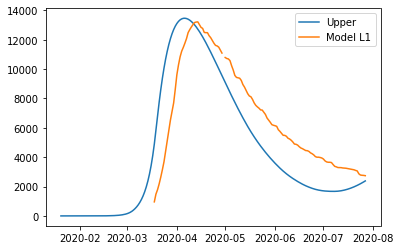

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.07324524693672778, 'other': 0.136046206606703, 'school': 0.057288907135782316, 'transport': 0.11467295355673125, 'work': 0.1498482038830584}
{'home': 1.0, 'leisure': 0.07324524693672778, 'other': 0.136046206606703, 'school': 0.057288907135782316, 'transport': 0.11467295355673125, 'work': 0.1498482038830584}
{'home': 1.0, 'leisure': 0.11723184153290273, 'other': 0.23318663530008676, 'school': 0.0714931813663809, 'transport': 0.19487968502020153, 'work': 0.306172553687719}
{'home': 1.0, 'leisure': 0.1653942235410893, 'other': 0.33954891403799564, 'school': 0.08704591255468297, 'transport': 0.28270069675880094, 'work': 0.477337271520369}
{'home': 1.0, 'leisure': 0.2094775443302692, 'other': 0.43690295380858696, 'school': 0.10128142187823061, 'transport': 0.3630838022257387, 'work': 0.6340053774027482}
{'home': 1.0, 'leisure': 0.25365232257352943, 'other': 0.5344589691214573

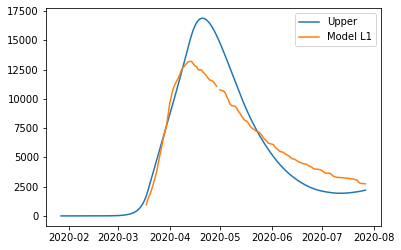

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.0764583863854554, 'other': 0.13753870432492715, 'school': 0.12725942047230504, 'transport': 0.09553512367555188, 'work': 0.15762439056197966}
{'home': 1.0, 'leisure': 0.0764583863854554, 'other': 0.13753870432492715, 'school': 0.12725942047230504, 'transport': 0.09553512367555188, 'work': 0.15762439056197966}
{'home': 1.0, 'leisure': 0.11929074012794194, 'other': 0.21863569920628015, 'school': 0.21165646558621573, 'transport': 0.14214076190951896, 'work': 0.3082561446542476}
{'home': 1.0, 'leisure': 0.1659118293307288, 'other': 0.3069061280314698, 'school': 0.3035188505572369, 'transport': 0.1928689014491243, 'work': 0.4722120291832353}
{'home': 1.0, 'leisure': 0.2103793960839936, 'other': 0.3910991671312256, 'school': 0.3911379260800115, 'transport': 0.241253805573404, 'work': 0.6285944596359224}
{'home': 1.0, 'leisure': 0.2554727339931875, 'other': 0.4764770152782353, 

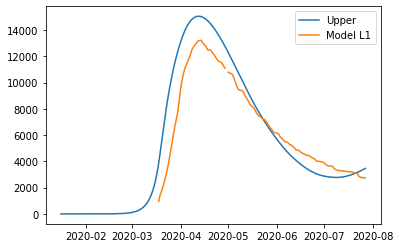

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.11259961056299111, 'other': 0.1386884972116758, 'school': 0.11751228000374563, 'transport': 0.04463000214296477, 'work': 0.1469778422174069}
{'home': 1.0, 'leisure': 0.11259961056299111, 'other': 0.1386884972116758, 'school': 0.11751228000374563, 'transport': 0.04463000214296477, 'work': 0.1469778422174069}
{'home': 1.0, 'leisure': 0.13160020610566428, 'other': 0.207916898570241, 'school': 0.1866557385366963, 'transport': 0.08429746758417425, 'work': 0.29077717051372837}
{'home': 1.0, 'leisure': 0.15202533859851647, 'other': 0.28233558017637084, 'school': 0.26098310887505044, 'transport': 0.12693893297786119, 'work': 0.44535760596582147}
{'home': 1.0, 'leisure': 0.1727954716367922, 'other': 0.3580112663944805, 'school': 0.3365659414884034, 'transport': 0.17030065459625698, 'work': 0.6025490567717411}
{'home': 1.0, 'leisure': 0.19323155959626231, 'other': 0.43246986408841

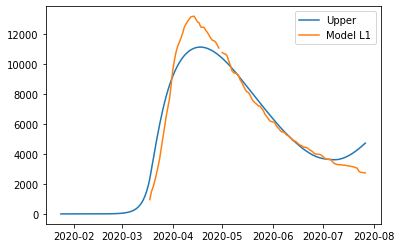

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.14010726242033983, 'other': 0.11497555911954611, 'school': 0.03551807572135485, 'transport': 0.1550731835071142, 'work': 0.15154418101339454}
{'home': 1.0, 'leisure': 0.14010726242033983, 'other': 0.11497555911954611, 'school': 0.03551807572135485, 'transport': 0.1550731835071142, 'work': 0.15154418101339454}
{'home': 1.0, 'leisure': 0.17251802046047665, 'other': 0.20525346214246337, 'school': 0.06560362788919857, 'transport': 0.24199946406101475, 'work': 0.30740242770391096}
{'home': 1.0, 'leisure': 0.20447913523439676, 'other': 0.29427891524945604, 'school': 0.0952717950046492, 'transport': 0.32771979266957907, 'work': 0.461098410524451}
{'home': 1.0, 'leisure': 0.23723521075884169, 'other': 0.3855186760086804, 'school': 0.12567789096155685, 'transport': 0.4155722214019319, 'work': 0.6186172347796509}
{'home': 1.0, 'leisure': 0.26804936768414583, 'other': 0.47134935812

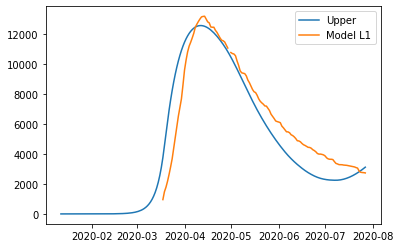

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.12928378849481503, 'other': 0.12666673515850088, 'school': 0.12339875463105268, 'transport': 0.09134654282799808, 'work': 0.15869052011484566}
{'home': 1.0, 'leisure': 0.12928378849481503, 'other': 0.12666673515850088, 'school': 0.12339875463105268, 'transport': 0.09134654282799808, 'work': 0.15869052011484566}
{'home': 1.0, 'leisure': 0.18043129713525768, 'other': 0.18757322648927044, 'school': 0.23232658456145863, 'transport': 0.1448563168531367, 'work': 0.3267680513978605}
{'home': 1.0, 'leisure': 0.22908772651282042, 'other': 0.24551333878102485, 'school': 0.3359492126256765, 'transport': 0.1957599602576724, 'work': 0.48665956416571143}
{'home': 1.0, 'leisure': 0.27921898338333095, 'other': 0.3052096767483067, 'school': 0.44271275141260125, 'transport': 0.24820654657323968, 'work': 0.6513975566678066}
{'home': 1.0, 'leisure': 0.32761077705195335, 'other': 0.362834660

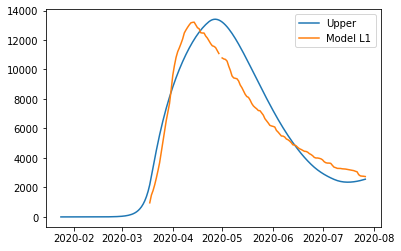

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.11481362583626685, 'other': 0.13268847126684552, 'school': 0.13393499487501676, 'transport': 0.0644054731873569, 'work': 0.1464951614049896}
{'home': 1.0, 'leisure': 0.11481362583626685, 'other': 0.13268847126684552, 'school': 0.13393499487501676, 'transport': 0.0644054731873569, 'work': 0.1464951614049896}
{'home': 1.0, 'leisure': 0.19835997811925105, 'other': 0.18324432228649812, 'school': 0.22503290795882033, 'transport': 0.12672546352131167, 'work': 0.2917442733136563}
{'home': 1.0, 'leisure': 0.28868372555994537, 'other': 0.23790133356667223, 'school': 0.3235208092125492, 'transport': 0.19410093729860414, 'work': 0.4487761932182622}
{'home': 1.0, 'leisure': 0.3850505063652294, 'other': 0.29621512561750385, 'school': 0.4285979595856804, 'transport': 0.26598410974349845, 'work': 0.6163141999292441}
{'home': 1.0, 'leisure': 0.48136527273009494, 'other': 0.3544974425143

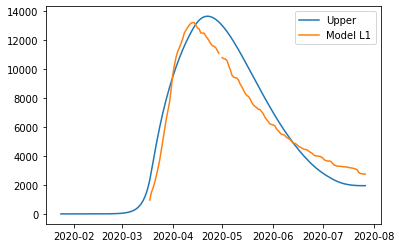

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.1136462718751487, 'other': 0.1254619570331877, 'school': 0.03315923283263165, 'transport': 0.07789805586892949, 'work': 0.13932419200326296}
{'home': 1.0, 'leisure': 0.1136462718751487, 'other': 0.1254619570331877, 'school': 0.03315923283263165, 'transport': 0.07789805586892949, 'work': 0.13932419200326296}
{'home': 1.0, 'leisure': 0.21875845457918996, 'other': 0.14959557929690423, 'school': 0.06315652185531248, 'transport': 0.1645693174397582, 'work': 0.2947251913421026}
{'home': 1.0, 'leisure': 0.3238899167618856, 'other': 0.17373362810417944, 'school': 0.09315931292426925, 'transport': 0.2512564760902062, 'work': 0.4501546940396639}
{'home': 1.0, 'leisure': 0.4304430511568355, 'other': 0.1981980910270284, 'school': 0.12356782587197894, 'transport': 0.33911588824168937, 'work': 0.6076860395192234}
{'home': 1.0, 'leisure': 0.542845568240784, 'other': 0.22400556470905536

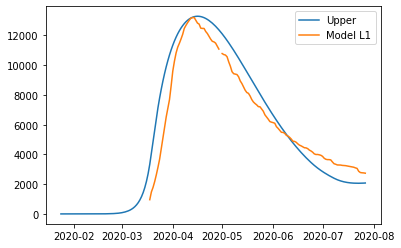

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.07420225776578337, 'other': 0.09787995587424224, 'school': 0.08720150072367873, 'transport': 0.12052996160255716, 'work': 0.13974167268958437}
{'home': 1.0, 'leisure': 0.07420225776578337, 'other': 0.09787995587424224, 'school': 0.08720150072367873, 'transport': 0.12052996160255716, 'work': 0.13974167268958437}
{'home': 1.0, 'leisure': 0.15174422739758733, 'other': 0.1021900681505309, 'school': 0.1671402408310689, 'transport': 0.25382651199451967, 'work': 0.29453303819021437}
{'home': 1.0, 'leisure': 0.22983917873503196, 'other': 0.10653091750055346, 'school': 0.2476490549391744, 'transport': 0.38807365152087947, 'work': 0.4504282806457299}
{'home': 1.0, 'leisure': 0.3060491327534379, 'other': 0.11076699068711078, 'school': 0.3262146077204751, 'transport': 0.5190804343562881, 'work': 0.602560640750378}
{'home': 1.0, 'leisure': 0.38954525198958884, 'other': 0.115408059907

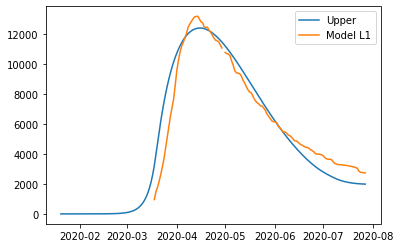

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.062454484324286505, 'other': 0.11066226629420269, 'school': 0.056414704332505304, 'transport': 0.12169521615480587, 'work': 0.13100846117457504}
{'home': 1.0, 'leisure': 0.062454484324286505, 'other': 0.11066226629420269, 'school': 0.056414704332505304, 'transport': 0.12169521615480587, 'work': 0.13100846117457504}
{'home': 1.0, 'leisure': 0.13216581876545178, 'other': 0.11229816988832368, 'school': 0.08011654331782397, 'transport': 0.22113214633311315, 'work': 0.278601993976546}
{'home': 1.0, 'leisure': 0.20222304198175922, 'other': 0.11394219039334527, 'school': 0.10393598441363112, 'transport': 0.32106245564781183, 'work': 0.42692784594424554}
{'home': 1.0, 'leisure': 0.2728964300876169, 'other': 0.11560067033119034, 'school': 0.1279649214417368, 'transport': 0.42187166859549485, 'work': 0.5765582483636942}
{'home': 1.0, 'leisure': 0.34066669055365517, 'other': 0.1171

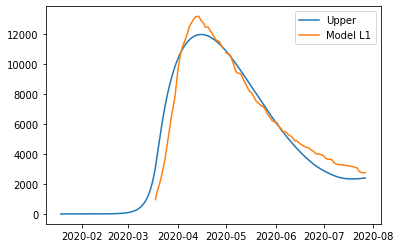

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.08786045374048401, 'other': 0.12031668150745384, 'school': 0.0491399689625645, 'transport': 0.1311338383246506, 'work': 0.13898591980094907}
{'home': 1.0, 'leisure': 0.08786045374048401, 'other': 0.12031668150745384, 'school': 0.0491399689625645, 'transport': 0.1311338383246506, 'work': 0.13898591980094907}
{'home': 1.0, 'leisure': 0.12129930222804464, 'other': 0.1631087962966917, 'school': 0.08760864500033434, 'transport': 0.23284568162177677, 'work': 0.30240394836984724}
{'home': 1.0, 'leisure': 0.15285777613737306, 'other': 0.2034945720988556, 'school': 0.12391410299228597, 'transport': 0.328837939075144, 'work': 0.45663245276418873}
{'home': 1.0, 'leisure': 0.1860153407289921, 'other': 0.24592672435026938, 'school': 0.1620591847809403, 'transport': 0.4296941935933486, 'work': 0.6186758269468853}
{'home': 1.0, 'leisure': 0.21622619112569677, 'other': 0.284587929401549

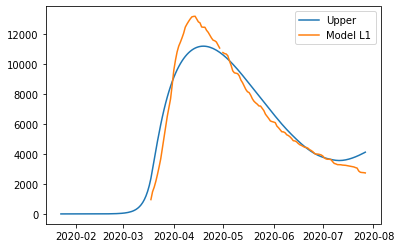

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.10978215168099247, 'other': 0.10268559802276007, 'school': 0.07561529710449748, 'transport': 0.08753297750679097, 'work': 0.13133108332948085}
{'home': 1.0, 'leisure': 0.10978215168099247, 'other': 0.10268559802276007, 'school': 0.07561529710449748, 'transport': 0.08753297750679097, 'work': 0.13133108332948085}
{'home': 1.0, 'leisure': 0.20188176136811495, 'other': 0.1376903245948286, 'school': 0.11328160632423274, 'transport': 0.1404363875030425, 'work': 0.2859852565934381}
{'home': 1.0, 'leisure': 0.2948499797758672, 'other': 0.17302518731912458, 'school': 0.15130315358214586, 'transport': 0.1938387394973101, 'work': 0.4420980024185084}
{'home': 1.0, 'leisure': 0.38423756567253964, 'other': 0.20699914240840234, 'school': 0.18786031666055222, 'transport': 0.24518432197406206, 'work': 0.5921981303547048}
{'home': 1.0, 'leisure': 0.46809100794087377, 'other': 0.2388697098

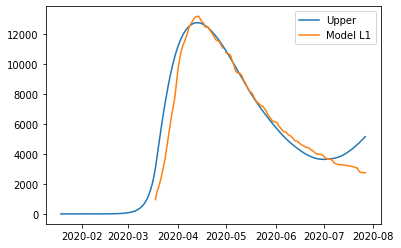

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.11578613916021134, 'other': 0.08382128254798658, 'school': 0.06028108370912713, 'transport': 0.10310006636272812, 'work': 0.15454423887918964}
{'home': 1.0, 'leisure': 0.11578613916021134, 'other': 0.08382128254798658, 'school': 0.06028108370912713, 'transport': 0.10310006636272812, 'work': 0.15454423887918964}
{'home': 1.0, 'leisure': 0.18629430220653415, 'other': 0.11930788481015665, 'school': 0.06879980605616347, 'transport': 0.1595820591522553, 'work': 0.3142765656461962}
{'home': 1.0, 'leisure': 0.24916965043127087, 'other': 0.15095290828184726, 'school': 0.0763963397177746, 'transport': 0.20994963095717417, 'work': 0.4567171744254198}
{'home': 1.0, 'leisure': 0.3230711072482241, 'other': 0.18814734778150072, 'school': 0.0853250362610602, 'transport': 0.2691498904835553, 'work': 0.6241368197378079}
{'home': 1.0, 'leisure': 0.3923816503328732, 'other': 0.223031190570

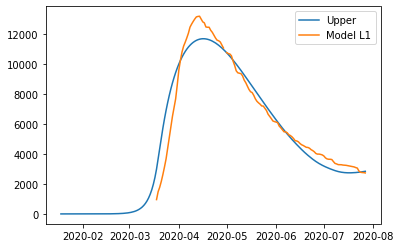

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.10129182948614184, 'other': 0.06248106555524609, 'school': 0.026588073706175806, 'transport': 0.07757518827257077, 'work': 0.146008089240922}
{'home': 1.0, 'leisure': 0.10129182948614184, 'other': 0.06248106555524609, 'school': 0.026588073706175806, 'transport': 0.07757518827257077, 'work': 0.146008089240922}
{'home': 1.0, 'leisure': 0.13878055190041844, 'other': 0.11070778512042481, 'school': 0.0273444008316904, 'transport': 0.09635254444476037, 'work': 0.2908250250065783}
{'home': 1.0, 'leisure': 0.17487585350234275, 'other': 0.1571419625442366, 'school': 0.028072615984062976, 'transport': 0.11443196381872722, 'work': 0.4302592504721336}
{'home': 1.0, 'leisure': 0.21385921110799222, 'other': 0.20729142974082398, 'school': 0.028859097061624588, 'transport': 0.13395795306050387, 'work': 0.5808498822872372}
{'home': 1.0, 'leisure': 0.25339304748053115, 'other': 0.25814905

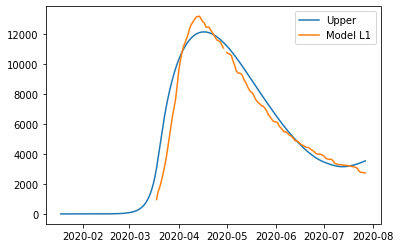

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.11739070838882876, 'other': 0.056824737089652085, 'school': 0.018168511710751515, 'transport': 0.10209368366524027, 'work': 0.1559674704940157}
{'home': 1.0, 'leisure': 0.11739070838882876, 'other': 0.056824737089652085, 'school': 0.018168511710751515, 'transport': 0.10209368366524027, 'work': 0.1559674704940157}
{'home': 1.0, 'leisure': 0.1615187699501014, 'other': 0.11058778003092384, 'school': 0.02775427842829794, 'transport': 0.14950124763923867, 'work': 0.3115854924658951}
{'home': 1.0, 'leisure': 0.204901803279667, 'other': 0.16344312425630916, 'school': 0.03717820556861269, 'transport': 0.19610841448933342, 'work': 0.4645761654079408}
{'home': 1.0, 'leisure': 0.24813904472363596, 'other': 0.21612084419618313, 'school': 0.04657046290619431, 'transport': 0.24255895451516313, 'work': 0.617052701901355}
{'home': 1.0, 'leisure': 0.29027356853345454, 'other': 0.26745507

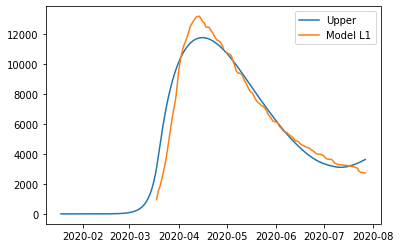

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.11644662088311551, 'other': 0.060643286104646664, 'school': 0.05160706264403995, 'transport': 0.0814630436083071, 'work': 0.15528735408503394}
{'home': 1.0, 'leisure': 0.11644662088311551, 'other': 0.060643286104646664, 'school': 0.05160706264403995, 'transport': 0.0814630436083071, 'work': 0.15528735408503394}
{'home': 1.0, 'leisure': 0.1675972989983749, 'other': 0.12204812041614341, 'school': 0.09758453709295495, 'transport': 0.13911159601024664, 'work': 0.31727177605822865}
{'home': 1.0, 'leisure': 0.21396035144772113, 'other': 0.1777055556394321, 'school': 0.13925858987012826, 'transport': 0.1913643315970045, 'work': 0.4640947025304357}
{'home': 1.0, 'leisure': 0.26329039267735843, 'other': 0.2369247707094574, 'school': 0.18359956038646938, 'transport': 0.24696096436125742, 'work': 0.620313515436317}
{'home': 1.0, 'leisure': 0.30750872441567567, 'other': 0.2900075339

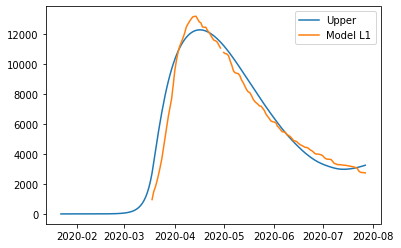

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.05731774855349527, 'other': 0.0662704699142001, 'school': 0.08697347101617117, 'transport': 0.1377979318043505, 'work': 0.14399339107022205}
{'home': 1.0, 'leisure': 0.05731774855349527, 'other': 0.0662704699142001, 'school': 0.08697347101617117, 'transport': 0.1377979318043505, 'work': 0.14399339107022205}
{'home': 1.0, 'leisure': 0.07359783408589791, 'other': 0.12497273894081909, 'school': 0.1466596277939653, 'transport': 0.262349742018647, 'work': 0.29750646782787554}
{'home': 1.0, 'leisure': 0.08957724198335473, 'other': 0.18259083310964958, 'school': 0.20524343824665972, 'transport': 0.3846011992250359, 'work': 0.4481843046378716}
{'home': 1.0, 'leisure': 0.10517519295209928, 'other': 0.23883348074247948, 'school': 0.2624287487955433, 'transport': 0.5039342963960712, 'work': 0.5952651930988804}
{'home': 1.0, 'leisure': 0.11942340350563461, 'other': 0.290209272804310

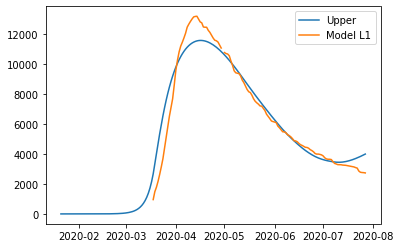

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.01611676465064806, 'other': 0.07770890259016391, 'school': 0.04811584402567298, 'transport': 0.052974857431654816, 'work': 0.15486043596178825}
{'home': 1.0, 'leisure': 0.01611676465064806, 'other': 0.07770890259016391, 'school': 0.04811584402567298, 'transport': 0.052974857431654816, 'work': 0.15486043596178825}
{'home': 1.0, 'leisure': 0.024279279242425927, 'other': 0.11185880420550819, 'school': 0.07640202764558926, 'transport': 0.09008824236246989, 'work': 0.31492982864026453}
{'home': 1.0, 'leisure': 0.031995857797171554, 'other': 0.1441430219534414, 'school': 0.1031428751458081, 'transport': 0.12517404184632347, 'work': 0.4662542800609207}
{'home': 1.0, 'leisure': 0.04000398813701557, 'other': 0.17764701881048847, 'school': 0.13089405925679568, 'transport': 0.16158547125781256, 'work': 0.6232961506237163}
{'home': 1.0, 'leisure': 0.0471391938376985, 'other': 0.2074

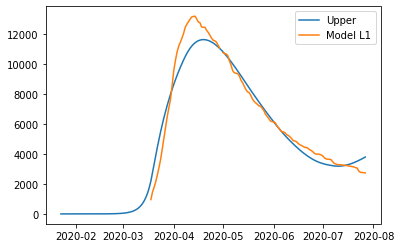

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.11159589405041548, 'other': 0.11110225105602986, 'school': 0.026945971238771325, 'transport': 0.03472615031390924, 'work': 0.15246720206261094}
{'home': 1.0, 'leisure': 0.11159589405041548, 'other': 0.11110225105602986, 'school': 0.026945971238771325, 'transport': 0.03472615031390924, 'work': 0.15246720206261094}
{'home': 1.0, 'leisure': 0.18156349358966017, 'other': 0.17815615309667723, 'school': 0.034103304860309096, 'transport': 0.044867007504345816, 'work': 0.296594551819204}
{'home': 1.0, 'leisure': 0.25064043115648194, 'other': 0.2443564834692459, 'school': 0.04116952824049762, 'transport': 0.05487877528873199, 'work': 0.43888721308484363}
{'home': 1.0, 'leisure': 0.31888579232391795, 'other': 0.3097598672152199, 'school': 0.04815068553636432, 'transport': 0.06477001732170407, 'work': 0.5794668971531395}
{'home': 1.0, 'leisure': 0.38882828323310636, 'other': 0.3767

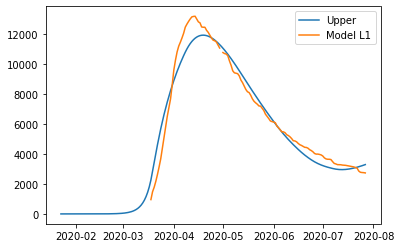

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.1290979280995891, 'other': 0.07845033491798853, 'school': 0.05403551882980938, 'transport': 0.06518110727369272, 'work': 0.15429493260295118}
{'home': 1.0, 'leisure': 0.1290979280995891, 'other': 0.07845033491798853, 'school': 0.05403551882980938, 'transport': 0.06518110727369272, 'work': 0.15429493260295118}
{'home': 1.0, 'leisure': 0.19990427798502078, 'other': 0.11463835843665786, 'school': 0.08040807777081066, 'transport': 0.10208430265621386, 'work': 0.3001500372818144}
{'home': 1.0, 'leisure': 0.27231775264677566, 'other': 0.15164775841799086, 'school': 0.10737922699301844, 'transport': 0.13982510709104046, 'work': 0.4493156833579096}
{'home': 1.0, 'leisure': 0.34257164208023294, 'other': 0.18755342799719668, 'school': 0.13354601631228608, 'transport': 0.17644036846717215, 'work': 0.5940327661335956}
{'home': 1.0, 'leisure': 0.4097643239270326, 'other': 0.221894562

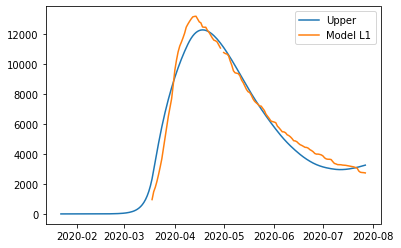

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.04190110745549594, 'other': 0.03471446858716887, 'school': 0.11811628854292547, 'transport': 0.07414056726814278, 'work': 0.15400832651396285}
{'home': 1.0, 'leisure': 0.04190110745549594, 'other': 0.03471446858716887, 'school': 0.11811628854292547, 'transport': 0.07414056726814278, 'work': 0.15400832651396285}
{'home': 1.0, 'leisure': 0.05159379702248371, 'other': 0.04525307080416194, 'school': 0.1887991730805356, 'transport': 0.11309121879599092, 'work': 0.3012192105872295}
{'home': 1.0, 'leisure': 0.0618756492517301, 'other': 0.056432253831644935, 'school': 0.2637784622582087, 'transport': 0.15440945564597855, 'work': 0.4573781947491905}
{'home': 1.0, 'leisure': 0.0720763313273726, 'other': 0.06752318272132524, 'school': 0.33816582691839553, 'transport': 0.1954015053891124, 'work': 0.6123043807296138}
{'home': 1.0, 'leisure': 0.08130659626499015, 'other': 0.0775590030

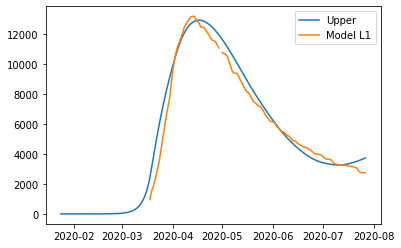

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.040363330539832744, 'other': 0.09367528590925128, 'school': 0.13173883623072044, 'transport': 0.055331297450547656, 'work': 0.14338095415291274}
{'home': 1.0, 'leisure': 0.040363330539832744, 'other': 0.09367528590925128, 'school': 0.13173883623072044, 'transport': 0.055331297450547656, 'work': 0.14338095415291274}
{'home': 1.0, 'leisure': 0.05257450517499292, 'other': 0.12981687675446227, 'school': 0.21414710430228764, 'transport': 0.08067111261112526, 'work': 0.28023193138924624}
{'home': 1.0, 'leisure': 0.0671235067089456, 'other': 0.172877767811776, 'school': 0.31233241852516375, 'transport': 0.11086223022726323, 'work': 0.4432830003667906}
{'home': 1.0, 'leisure': 0.08040435774867807, 'other': 0.21218529544078446, 'school': 0.40195949908050377, 'transport': 0.13842176651896343, 'work': 0.5921218711241021}
{'home': 1.0, 'leisure': 0.09240766991341313, 'other': 0.2477

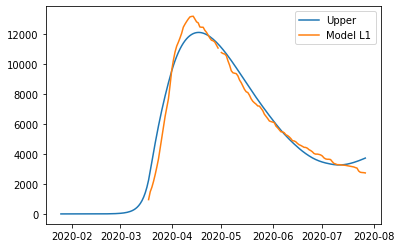

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.011585458190397203, 'other': 0.13135303762380438, 'school': 0.11764760254800477, 'transport': 0.12644141421071778, 'work': 0.14304626684248153}
{'home': 1.0, 'leisure': 0.011585458190397203, 'other': 0.13135303762380438, 'school': 0.11764760254800477, 'transport': 0.12644141421071778, 'work': 0.14304626684248153}
{'home': 1.0, 'leisure': 0.023139340113609033, 'other': 0.18994821646028853, 'school': 0.20463056307569277, 'transport': 0.14675139545752872, 'work': 0.29076179247904943}
{'home': 1.0, 'leisure': 0.03538849976325472, 'other': 0.2520694762271628, 'school': 0.29684789551717694, 'transport': 0.1682835700484509, 'work': 0.4473663924116981}
{'home': 1.0, 'leisure': 0.047147705213692284, 'other': 0.31170594740825364, 'school': 0.3853766264086941, 'transport': 0.18895447907825277, 'work': 0.5977069641540923}
{'home': 1.0, 'leisure': 0.057204069297288246, 'other': 0.362

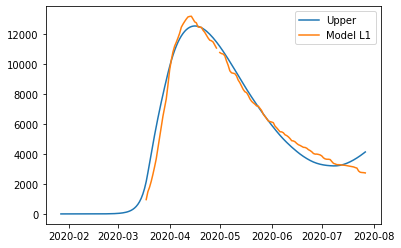

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.05522941725449984, 'other': 0.08490118559091733, 'school': 0.12171850530294763, 'transport': 0.13515323247186278, 'work': 0.15943901380189043}
{'home': 1.0, 'leisure': 0.05522941725449984, 'other': 0.08490118559091733, 'school': 0.12171850530294763, 'transport': 0.13515323247186278, 'work': 0.15943901380189043}
{'home': 1.0, 'leisure': 0.11068954917433882, 'other': 0.13548097953580313, 'school': 0.19362661029449, 'transport': 0.20826712625014088, 'work': 0.32108477342078645}
{'home': 1.0, 'leisure': 0.1665783754047881, 'other': 0.18645174387952163, 'school': 0.2660905487186177, 'transport': 0.281946173936358, 'work': 0.48398001830205184}
{'home': 1.0, 'leisure': 0.21923926709754485, 'other': 0.23447862298293717, 'school': 0.33436923464501045, 'transport': 0.3513697888505579, 'work': 0.6374670286140315}
{'home': 1.0, 'leisure': 0.26763330369861427, 'other': 0.278614118422

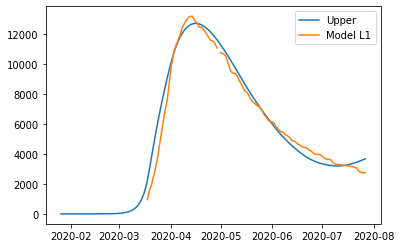

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.05589056819582622, 'other': 0.1326977792657497, 'school': 0.10139404249672788, 'transport': 0.07452453823371846, 'work': 0.14464661776739093}
{'home': 1.0, 'leisure': 0.05589056819582622, 'other': 0.1326977792657497, 'school': 0.10139404249672788, 'transport': 0.07452453823371846, 'work': 0.14464661776739093}
{'home': 1.0, 'leisure': 0.10276295550663368, 'other': 0.1724733796659057, 'school': 0.18115960272151913, 'transport': 0.08542879770615086, 'work': 0.30337301303439146}
{'home': 1.0, 'leisure': 0.14689256337311446, 'other': 0.20992147542159179, 'school': 0.2562576102249384, 'transport': 0.09569498473438974, 'work': 0.4528113920686446}
{'home': 1.0, 'leisure': 0.1903733230936153, 'other': 0.2468189628968899, 'school': 0.33025143381893324, 'transport': 0.10581022556705602, 'work': 0.6000525429863917}
{'home': 1.0, 'leisure': 0.2287174997573533, 'other': 0.279357579684

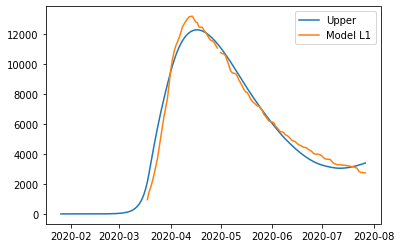

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.03130836951748346, 'other': 0.13225150765715338, 'school': 0.09980081309259, 'transport': 0.08549275277610775, 'work': 0.14177612397089695}
{'home': 1.0, 'leisure': 0.03130836951748346, 'other': 0.13225150765715338, 'school': 0.09980081309259, 'transport': 0.08549275277610775, 'work': 0.14177612397089695}
{'home': 1.0, 'leisure': 0.048209854424118244, 'other': 0.1744139008991222, 'school': 0.17865375337227118, 'transport': 0.08866098648175373, 'work': 0.2981553147815027}
{'home': 1.0, 'leisure': 0.0635096350100248, 'other': 0.21258068737630348, 'school': 0.2500340309926785, 'transport': 0.09152897594001895, 'work': 0.43971490678307085}
{'home': 1.0, 'leisure': 0.0793652576104504, 'other': 0.2521340756654569, 'school': 0.32400755869838466, 'transport': 0.09450115964010028, 'work': 0.5864173678833714}
{'home': 1.0, 'leisure': 0.09507366897683425, 'other': 0.291320231254431

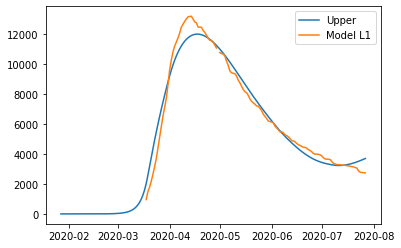

{'home': 1.0, 'leisure': 1.0, 'other': 1.0, 'school': 1.0, 'transport': 1.0, 'work': 1.0}
{'home': 1.0, 'leisure': 0.03408423590767022, 'other': 0.1338363806205756, 'school': 0.09001544368755014, 'transport': 0.11929340520466672, 'work': 0.15585599384647397}
{'home': 1.0, 'leisure': 0.03408423590767022, 'other': 0.1338363806205756, 'school': 0.09001544368755014, 'transport': 0.11929340520466672, 'work': 0.15585599384647397}
{'home': 1.0, 'leisure': 0.0591258372896948, 'other': 0.1589755673797105, 'school': 0.16239198905138136, 'transport': 0.17601588146605385, 'work': 0.301283396358334}
{'home': 1.0, 'leisure': 0.08400244544453274, 'other': 0.18394911794453978, 'school': 0.23429166236497817, 'transport': 0.2323646266601019, 'work': 0.44575261188783016}
{'home': 1.0, 'leisure': 0.10956041114027175, 'other': 0.20960668125316873, 'school': 0.30816063086124706, 'transport': 0.29025673508997807, 'work': 0.5941787651484028}
{'home': 1.0, 'leisure': 0.13368830666251974, 'other': 0.23382860150

KeyboardInterrupt: 

In [25]:
from scipy.optimize import minimize, Bounds, shgo, differential_evolution, dual_annealing
epsilon = 0.1
result = differential_evolution(error, [(50,140),
                                        windows['alpha_mixing'],windows['beta_mixing'],windows['gamma_mixing'],(0,0.5),(-50,50)]+
                                        [(0.8,1),(0.8,1),(0.8,1),(0.8,1),(0.8,1),(0.8,1)]+
                                        [(0,1.0),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1)]+
                                        [(0,2),(0,1.0)]*3
                               )




In [23]:
# v0 = (list(best_v[0:4]) + list(best_v[4]*initial_params["mu"]) + list(best_v[5]*initial_params['sigma']) + list(best_v[6]*initial_params['p_H'])+
#       list(best_v[7]*initial_params['p_ICU'])+list(best_v[8]*initial_params['lambda_H_R'])+list(best_v[9]*initial_params['lambda_H_D'])+
#     list(best_v[10]*initial_params['lambda_ICU_R'])+list(best_v[11]*initial_params['lambda_ICU_D']) + list(best_v[12:]))
v0 = best_v
error(best_v)

4273.382598592445

In [50]:
best_v = [55.76574406,  1.65994558,  3.54471426,  1.81803306,  0.29064393, 10.16456894,
  0.99267626,  0.89923718,  0.88046196,  0.97375347,  0.96930897,  0.90837394,
  0.97350105,  0.55814137,  0.2174009 ,  0.36999562,  0.57774866,  0.95434156,
  0.53047664,  0.85170554,  0.72113671,  0.49993411,  0.29182439,  0.84573728,
  0.19667646,  0.34152441,  0.26903685,  0.42398907,  0.50355682,  0.30630559,
  0.8104787 ,  0.58992106,  0.86364   ,  0.47907731,  0.63184319,  0.52658515,
  0.59142121,  0.49368035,  0.44186236,  0.24121374]

In [30]:
lb= ([50,windows['alpha_mixing'][0],windows['beta_mixing'][0],windows['gamma_mixing'][0],0,-50]+
                [0.8,0.8,0.8,0.8,0.8,0.8]+[0,0,0,0,0,0,0]*4)
ub = ([140,windows['alpha_mixing'][1],windows['beta_mixing'][1],windows['gamma_mixing'][1],0.5,50]+
                [1,1,1,1,1,1]+[1,1,1,1,1,1,1]*4)
for i in range(len(v0)):
    assert(v0[i]>=lb[i])
    assert(ub[i]>=v0[i])

5390.179867295266
error_groups 2198.2218545859414
error_total 638.391602541865
[55.76574406  1.65994559  3.54471426  1.81803306  0.29064393 10.16456894
  0.99267626  0.89923718  0.88046196  0.97375347  0.96930897  0.90837394
  0.97350105  0.55814137  0.2174009   0.36999562  0.57774866  0.95434156
  0.53047664  0.85170554  0.72113671  0.49993411  0.29182439  0.84573728
  0.19667646  0.34152441  0.26903685  0.42398907  0.50355682  0.30630559
  0.8104787   0.58992106  0.86364     0.47907731  0.63184319  0.52658515
  0.59142121  0.49368035  0.44186236  0.24121374]


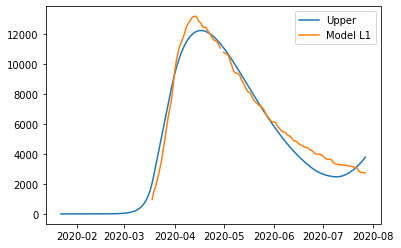

{'home': 0.9926762575521164, 'leisure': 0.8992371773679771, 'other': 0.8804619609267378, 'school': 0.973753474706641, 'transport': 0.9083739433709013, 'work': 0.9693089741306267}
{'home': 0.9926762575521164, 'leisure': 0.2093474089530366, 'other': 0.20004976537803368, 'school': 0, 'transport': 0.1277809202911023, 'work': 0.0692287783036484}
{'home': 0.9926762575521164, 'leisure': 0.2093474089530366, 'other': 0.20004976537803368, 'school': 0, 'transport': 0.1277809202911023, 'work': 0.0692287783036484}
{'home': 0.9926762575521164, 'leisure': 0.3293734206314323, 'other': 0.3694313462507579, 'school': 0.32133864665319156, 'transport': 0.29630800745045155, 'work': 0.1783299890810433}
{'home': 0.9926762575521164, 'leisure': 0.37612459178557583, 'other': 0.48685655686096946, 'school': 0.6524148280534495, 'transport': 0.43676035830631027, 'work': 0.3079056367257564}
{'home': 0.9926762575521164, 'leisure': 0.45569063169850027, 'other': 0.5554006691885353, 'school': 0.6524148280534495, 'transpo

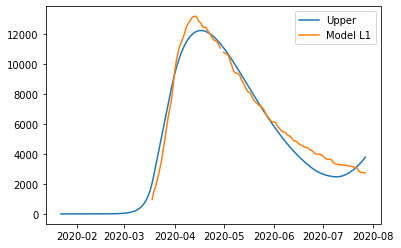

{'home': 0.9926762575521164, 'leisure': 0.8992371773679771, 'other': 0.8804619609267378, 'school': 0.973753474706641, 'transport': 0.9083739433709013, 'work': 0.9693089741306267}
{'home': 0.9926762575521164, 'leisure': 0.2093474089530366, 'other': 0.20004976537803368, 'school': 0, 'transport': 0.1277809202911023, 'work': 0.0692287783036484}
{'home': 0.9926762575521164, 'leisure': 0.2093474089530366, 'other': 0.20004976537803368, 'school': 0, 'transport': 0.1277809202911023, 'work': 0.0692287783036484}
{'home': 0.9926762575521164, 'leisure': 0.3293734206314323, 'other': 0.3694313462507579, 'school': 0.32133864665319156, 'transport': 0.29630800745045155, 'work': 0.1783299890810433}
{'home': 0.9926762575521164, 'leisure': 0.37612459178557583, 'other': 0.48685655686096946, 'school': 0.6524148280534495, 'transport': 0.43676035830631027, 'work': 0.3079056367257564}
{'home': 0.9926762575521164, 'leisure': 0.45569063169850027, 'other': 0.5554006691885353, 'school': 0.6524148280534495, 'transpo

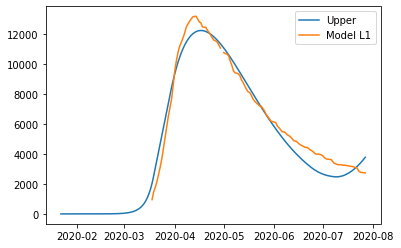

{'home': 0.9926762675521165, 'leisure': 0.8992371773679771, 'other': 0.8804619609267378, 'school': 0.973753474706641, 'transport': 0.9083739433709013, 'work': 0.9693089741306267}
{'home': 0.9926762675521165, 'leisure': 0.2093474089530366, 'other': 0.20004976537803368, 'school': 0, 'transport': 0.1277809202911023, 'work': 0.0692287783036484}
{'home': 0.9926762675521165, 'leisure': 0.2093474089530366, 'other': 0.20004976537803368, 'school': 0, 'transport': 0.1277809202911023, 'work': 0.0692287783036484}
{'home': 0.9926762675521165, 'leisure': 0.3293734206314323, 'other': 0.3694313462507579, 'school': 0.32133864665319156, 'transport': 0.29630800745045155, 'work': 0.1783299890810433}
{'home': 0.9926762675521165, 'leisure': 0.37612459178557583, 'other': 0.48685655686096946, 'school': 0.6524148280534495, 'transport': 0.43676035830631027, 'work': 0.3079056367257564}
{'home': 0.9926762675521165, 'leisure': 0.45569063169850027, 'other': 0.5554006691885353, 'school': 0.6524148280534495, 'transpo

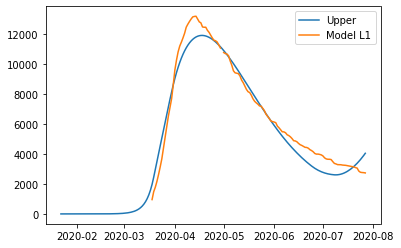

{'home': 0.9927299510396164, 'leisure': 0.8985096271871158, 'other': 0.8798720598858443, 'school': 0.9724796136870016, 'transport': 0.9075794076516135, 'work': 0.9680676976451678}
{'home': 0.9927299510396164, 'leisure': 0.2096541071161323, 'other': 0.20046440804750215, 'school': 0, 'transport': 0.12879938809528163, 'work': 0.07034851456329774}
{'home': 0.9927299510396164, 'leisure': 0.2096541071161323, 'other': 0.20046440804750215, 'school': 0, 'transport': 0.12879938809528163, 'work': 0.07034851456329774}
{'home': 0.9927299510396164, 'leisure': 0.33052948902387563, 'other': 0.3704612654343222, 'school': 0.32091827251671057, 'transport': 0.29804616030546643, 'work': 0.18013181552153607}
{'home': 0.9927299510396164, 'leisure': 0.378575211632973, 'other': 0.48884165550648245, 'school': 0.6515613411702912, 'transport': 0.4394240621292979, 'work': 0.3101648227135491}
{'home': 0.9927299510396164, 'leisure': 0.45765784814424354, 'other': 0.5569373464812789, 'school': 0.6515613411702912, 'tra

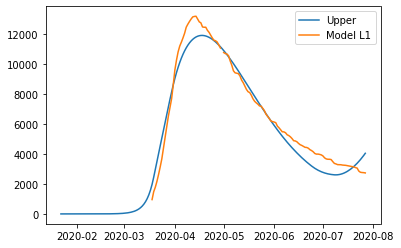

{'home': 0.9927299510396164, 'leisure': 0.8985096271871158, 'other': 0.8798720598858443, 'school': 0.9724796136870016, 'transport': 0.9075794076516135, 'work': 0.9680676976451678}
{'home': 0.9927299510396164, 'leisure': 0.2096541071161323, 'other': 0.20046440804750215, 'school': 0, 'transport': 0.12879938809528163, 'work': 0.07034851456329774}
{'home': 0.9927299510396164, 'leisure': 0.2096541071161323, 'other': 0.20046440804750215, 'school': 0, 'transport': 0.12879938809528163, 'work': 0.07034851456329774}
{'home': 0.9927299510396164, 'leisure': 0.33052948902387563, 'other': 0.3704612654343222, 'school': 0.32091827251671057, 'transport': 0.29804616030546643, 'work': 0.18013181552153607}
{'home': 0.9927299510396164, 'leisure': 0.378575211632973, 'other': 0.48884165550648245, 'school': 0.6515613411702912, 'transport': 0.4394240621292979, 'work': 0.3101648227135491}
{'home': 0.9927299510396164, 'leisure': 0.45765784814424354, 'other': 0.5569373464812789, 'school': 0.6515613411702912, 'tra

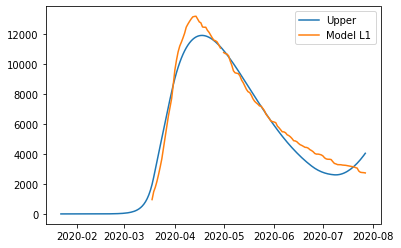

{'home': 0.9927299610396164, 'leisure': 0.8985096271871158, 'other': 0.8798720598858443, 'school': 0.9724796136870016, 'transport': 0.9075794076516135, 'work': 0.9680676976451678}
{'home': 0.9927299610396164, 'leisure': 0.2096541071161323, 'other': 0.20046440804750215, 'school': 0, 'transport': 0.12879938809528163, 'work': 0.07034851456329774}
{'home': 0.9927299610396164, 'leisure': 0.2096541071161323, 'other': 0.20046440804750215, 'school': 0, 'transport': 0.12879938809528163, 'work': 0.07034851456329774}
{'home': 0.9927299610396164, 'leisure': 0.33052948902387563, 'other': 0.3704612654343222, 'school': 0.32091827251671057, 'transport': 0.29804616030546643, 'work': 0.18013181552153607}
{'home': 0.9927299610396164, 'leisure': 0.378575211632973, 'other': 0.48884165550648245, 'school': 0.6515613411702912, 'transport': 0.4394240621292979, 'work': 0.3101648227135491}
{'home': 0.9927299610396164, 'leisure': 0.45765784814424354, 'other': 0.5569373464812789, 'school': 0.6515613411702912, 'tra

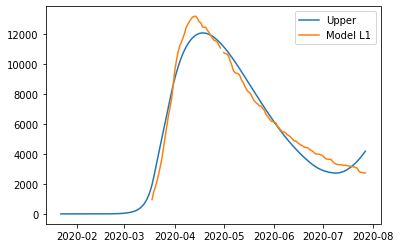

{'home': 0.993790710847253, 'leisure': 0.8980613930683979, 'other': 0.8795163502338759, 'school': 0.9715669147718862, 'transport': 0.9069832925020045, 'work': 0.9672488386123693}
{'home': 0.993790710847253, 'leisure': 0.20992166681447477, 'other': 0.20081208951479626, 'school': 0, 'transport': 0.12959608307815618, 'work': 0.07122557607411784}
{'home': 0.993790710847253, 'leisure': 0.20992166681447477, 'other': 0.20081208951479626, 'school': 0, 'transport': 0.12959608307815618, 'work': 0.07122557607411784}
{'home': 0.993790710847253, 'leisure': 0.33147650363830483, 'other': 0.37130950962409887, 'school': 0.32061708187472243, 'transport': 0.29940780495155767, 'work': 0.1815529596190739}
{'home': 0.993790710847253, 'leisure': 0.38053950245817836, 'other': 0.490449292105768, 'school': 0.6509498328971638, 'transport': 0.44151031543394675, 'work': 0.3119590562891415}
{'home': 0.993790710847253, 'leisure': 0.459255146192539, 'other': 0.5582030644497578, 'school': 0.6509498328971638, 'transpor

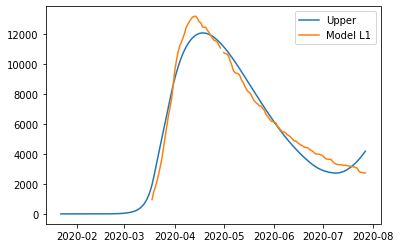

{'home': 0.993790710847253, 'leisure': 0.8980613930683979, 'other': 0.8795163502338759, 'school': 0.9715669147718862, 'transport': 0.9069832925020045, 'work': 0.9672488386123693}
{'home': 0.993790710847253, 'leisure': 0.20992166681447477, 'other': 0.20081208951479626, 'school': 0, 'transport': 0.12959608307815618, 'work': 0.07122557607411784}
{'home': 0.993790710847253, 'leisure': 0.20992166681447477, 'other': 0.20081208951479626, 'school': 0, 'transport': 0.12959608307815618, 'work': 0.07122557607411784}
{'home': 0.993790710847253, 'leisure': 0.33147650363830483, 'other': 0.37130950962409887, 'school': 0.32061708187472243, 'transport': 0.29940780495155767, 'work': 0.1815529596190739}
{'home': 0.993790710847253, 'leisure': 0.38053950245817836, 'other': 0.490449292105768, 'school': 0.6509498328971638, 'transport': 0.44151031543394675, 'work': 0.3119590562891415}
{'home': 0.993790710847253, 'leisure': 0.459255146192539, 'other': 0.5582030644497578, 'school': 0.6509498328971638, 'transpor

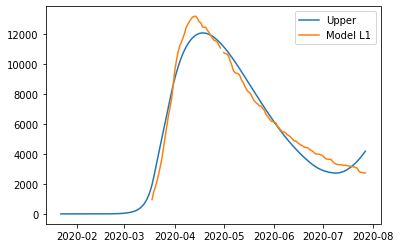

{'home': 0.993790710847253, 'leisure': 0.8980613930683979, 'other': 0.8795163502338759, 'school': 0.9715669147718862, 'transport': 0.9069832925020045, 'work': 0.9672488386123693}
{'home': 0.993790710847253, 'leisure': 0.20992166681447477, 'other': 0.20081208951479626, 'school': 0, 'transport': 0.12959608307815618, 'work': 0.07122557607411784}
{'home': 0.993790710847253, 'leisure': 0.20992166681447477, 'other': 0.20081208951479626, 'school': 0, 'transport': 0.12959608307815618, 'work': 0.07122557607411784}
{'home': 0.993790710847253, 'leisure': 0.33147650363830483, 'other': 0.37130950962409887, 'school': 0.32061708187472243, 'transport': 0.29940780495155767, 'work': 0.1815529596190739}
{'home': 0.993790710847253, 'leisure': 0.38053950245817836, 'other': 0.490449292105768, 'school': 0.6509498328971638, 'transport': 0.44151031543394675, 'work': 0.3119590562891415}
{'home': 0.993790710847253, 'leisure': 0.459255146192539, 'other': 0.5582030644497578, 'school': 0.6509498328971638, 'transpor

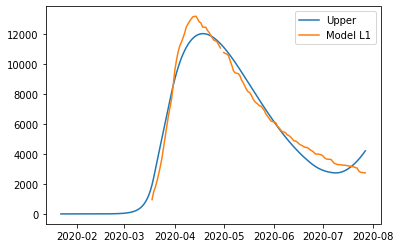

{'home': 0.9937508117315402, 'leisure': 0.8979937332694341, 'other': 0.8794607230136284, 'school': 0.9714523677880518, 'transport': 0.9069156102500724, 'work': 0.9671360561525061}
{'home': 0.9937508117315402, 'leisure': 0.2099455682423262, 'other': 0.20084517236640162, 'school': 0, 'transport': 0.12968037325073067, 'work': 0.07131682004776264}
{'home': 0.9937508117315402, 'leisure': 0.2099455682423262, 'other': 0.20084517236640162, 'school': 0, 'transport': 0.12968037325073067, 'work': 0.07131682004776264}
{'home': 0.9937508117315402, 'leisure': 0.33157020766740675, 'other': 0.37139259616420967, 'school': 0.3205792813700571, 'transport': 0.2995515076037348, 'work': 0.1816990375114425}
{'home': 0.9937508117315402, 'leisure': 0.3807406204553425, 'other': 0.49061095282204964, 'school': 0.6508730864179947, 'transport': 0.44173056505930935, 'work': 0.3121412678758263}
{'home': 0.9937508117315402, 'leisure': 0.45941534009152185, 'other': 0.5583268242811933, 'school': 0.6508730864179947, 'tra

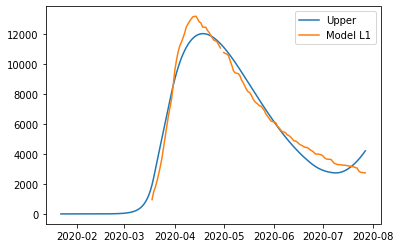

{'home': 0.9937508117315402, 'leisure': 0.8979937332694341, 'other': 0.8794607230136284, 'school': 0.9714523677880518, 'transport': 0.9069156102500724, 'work': 0.9671360561525061}
{'home': 0.9937508117315402, 'leisure': 0.2099455682423262, 'other': 0.20084517236640162, 'school': 0, 'transport': 0.12968037325073067, 'work': 0.07131682004776264}
{'home': 0.9937508117315402, 'leisure': 0.2099455682423262, 'other': 0.20084517236640162, 'school': 0, 'transport': 0.12968037325073067, 'work': 0.07131682004776264}
{'home': 0.9937508117315402, 'leisure': 0.33157020766740675, 'other': 0.37139259616420967, 'school': 0.3205792813700571, 'transport': 0.2995515076037348, 'work': 0.1816990375114425}
{'home': 0.9937508117315402, 'leisure': 0.3807406204553425, 'other': 0.49061095282204964, 'school': 0.6508730864179947, 'transport': 0.44173056505930935, 'work': 0.3121412678758263}
{'home': 0.9937508117315402, 'leisure': 0.45941534009152185, 'other': 0.5583268242811933, 'school': 0.6508730864179947, 'tra

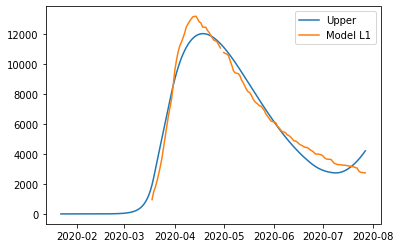

{'home': 0.9937508117315402, 'leisure': 0.8979937332694341, 'other': 0.8794607230136284, 'school': 0.9714523677880518, 'transport': 0.9069156102500724, 'work': 0.9671360561525061}
{'home': 0.9937508117315402, 'leisure': 0.2099455682423262, 'other': 0.20084517236640162, 'school': 0, 'transport': 0.12968037325073067, 'work': 0.07131682004776264}
{'home': 0.9937508117315402, 'leisure': 0.2099455682423262, 'other': 0.20084517236640162, 'school': 0, 'transport': 0.12968037325073067, 'work': 0.07131682004776264}
{'home': 0.9937508117315402, 'leisure': 0.33157020766740675, 'other': 0.37139259616420967, 'school': 0.3205792813700571, 'transport': 0.2995515076037348, 'work': 0.1816990375114425}
{'home': 0.9937508117315402, 'leisure': 0.3807406204553425, 'other': 0.49061095282204964, 'school': 0.6508730864179947, 'transport': 0.44173056505930935, 'work': 0.3121412678758263}
{'home': 0.9937508117315402, 'leisure': 0.45941534009152185, 'other': 0.5583268242811933, 'school': 0.6508730864179947, 'tra

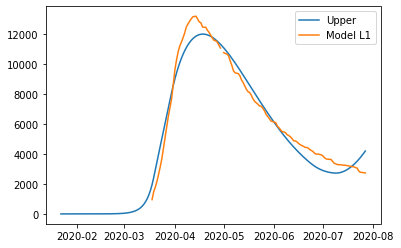

{'home': 0.9936201267247384, 'leisure': 0.8980295491073467, 'other': 0.8794901799932844, 'school': 0.971523695873957, 'transport': 0.9069714152279245, 'work': 0.9672057545407057}
{'home': 0.9936201267247384, 'leisure': 0.20991765430977485, 'other': 0.20081038540989077, 'school': 0, 'transport': 0.12960242966992708, 'work': 0.07123084554231414}
{'home': 0.9936201267247384, 'leisure': 0.20991765430977485, 'other': 0.20081038540989077, 'school': 0, 'transport': 0.12960242966992708, 'work': 0.07123084554231414}
{'home': 0.9936201267247384, 'leisure': 0.3314749946914416, 'other': 0.3713083039824298, 'school': 0.3206028196384058, 'transport': 0.29941809834565347, 'work': 0.18155904599647518}
{'home': 0.9936201267247384, 'leisure': 0.3805456713154264, 'other': 0.49045193965225226, 'school': 0.6509208762355513, 'transport': 0.4415261832255009, 'work': 0.31196365863618647}
{'home': 0.9936201267247384, 'leisure': 0.45925537932104327, 'other': 0.5582004822265308, 'school': 0.6509208762355513, 'tr

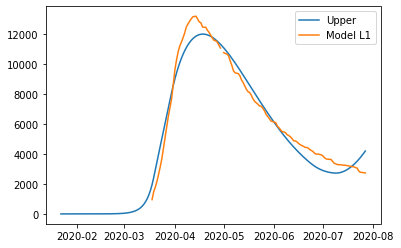

{'home': 0.9936201267247384, 'leisure': 0.8980295491073467, 'other': 0.8794901799932844, 'school': 0.971523695873957, 'transport': 0.9069714152279245, 'work': 0.9672057545407057}
{'home': 0.9936201267247384, 'leisure': 0.20991765430977485, 'other': 0.20081038540989077, 'school': 0, 'transport': 0.12960242966992708, 'work': 0.07123084554231414}
{'home': 0.9936201267247384, 'leisure': 0.20991765430977485, 'other': 0.20081038540989077, 'school': 0, 'transport': 0.12960242966992708, 'work': 0.07123084554231414}
{'home': 0.9936201267247384, 'leisure': 0.3314749946914416, 'other': 0.3713083039824298, 'school': 0.3206028196384058, 'transport': 0.29941809834565347, 'work': 0.18155904599647518}
{'home': 0.9936201267247384, 'leisure': 0.3805456713154264, 'other': 0.49045193965225226, 'school': 0.6509208762355513, 'transport': 0.4415261832255009, 'work': 0.31196365863618647}
{'home': 0.9936201267247384, 'leisure': 0.45925537932104327, 'other': 0.5582004822265308, 'school': 0.6509208762355513, 'tr

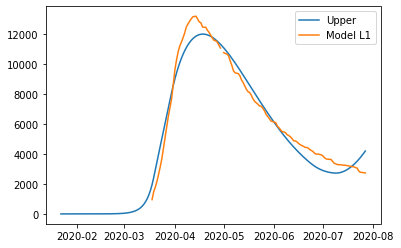

{'home': 0.9936201267247384, 'leisure': 0.8980295491073467, 'other': 0.8794901799932844, 'school': 0.971523695873957, 'transport': 0.9069714152279245, 'work': 0.9672057545407057}
{'home': 0.9936201267247384, 'leisure': 0.20991765430977485, 'other': 0.20081038540989077, 'school': 0, 'transport': 0.12960242966992708, 'work': 0.07123084554231414}
{'home': 0.9936201267247384, 'leisure': 0.20991765430977485, 'other': 0.20081038540989077, 'school': 0, 'transport': 0.12960242966992708, 'work': 0.07123084554231414}
{'home': 0.9936201267247384, 'leisure': 0.3314749946914416, 'other': 0.3713083039824298, 'school': 0.3206028196384058, 'transport': 0.29941809834565347, 'work': 0.18155904599647518}
{'home': 0.9936201267247384, 'leisure': 0.3805456713154264, 'other': 0.49045193965225226, 'school': 0.6509208762355513, 'transport': 0.4415261832255009, 'work': 0.31196365863618647}
{'home': 0.9936201267247384, 'leisure': 0.45925537932104327, 'other': 0.5582004822265308, 'school': 0.6509208762355513, 'tr

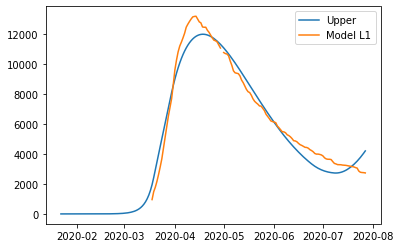

{'home': 0.9936307311069354, 'leisure': 0.8980048856697053, 'other': 0.8794725062335006, 'school': 0.9714677494768726, 'transport': 0.9069479356535469, 'work': 0.9671666264121608}
{'home': 0.9936307311069354, 'leisure': 0.20992486107622466, 'other': 0.20082164913896244, 'school': 0, 'transport': 0.1296296580250853, 'work': 0.07126028826521087}
{'home': 0.9936307311069354, 'leisure': 0.20992486107622466, 'other': 0.20082164913896244, 'school': 0, 'transport': 0.1296296580250853, 'work': 0.07126028826521087}
{'home': 0.9936307311069354, 'leisure': 0.33150462479295967, 'other': 0.37133633300418734, 'school': 0.320584357327368, 'transport': 0.299464393945798, 'work': 0.18160599885162512}
{'home': 0.9936307311069354, 'leisure': 0.38061001644522974, 'other': 0.49050563068733594, 'school': 0.6508833921495047, 'transport': 0.44159713923739063, 'work': 0.3120219775020042}
{'home': 0.9936307311069354, 'leisure': 0.4593060207512391, 'other': 0.5582415242471718, 'school': 0.6508833921495047, 'tran

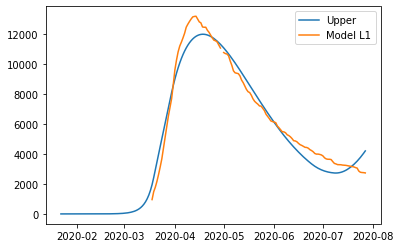

{'home': 0.9936307311069354, 'leisure': 0.8980048856697053, 'other': 0.8794725062335006, 'school': 0.9714677494768726, 'transport': 0.9069479356535469, 'work': 0.9671666264121608}
{'home': 0.9936307311069354, 'leisure': 0.20992486107622466, 'other': 0.20082164913896244, 'school': 0, 'transport': 0.1296296580250853, 'work': 0.07126028826521087}
{'home': 0.9936307311069354, 'leisure': 0.20992486107622466, 'other': 0.20082164913896244, 'school': 0, 'transport': 0.1296296580250853, 'work': 0.07126028826521087}
{'home': 0.9936307311069354, 'leisure': 0.33150462479295967, 'other': 0.37133633300418734, 'school': 0.320584357327368, 'transport': 0.299464393945798, 'work': 0.18160599885162512}
{'home': 0.9936307311069354, 'leisure': 0.38061001644522974, 'other': 0.49050563068733594, 'school': 0.6508833921495047, 'transport': 0.44159713923739063, 'work': 0.3120219775020042}
{'home': 0.9936307311069354, 'leisure': 0.4593060207512391, 'other': 0.5582415242471718, 'school': 0.6508833921495047, 'tran

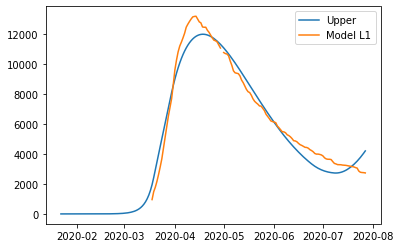

{'home': 0.9936307311069354, 'leisure': 0.8980048856697053, 'other': 0.8794725062335006, 'school': 0.9714677494768726, 'transport': 0.9069479356535469, 'work': 0.9671666264121608}
{'home': 0.9936307311069354, 'leisure': 0.20992486107622466, 'other': 0.20082164913896244, 'school': 0, 'transport': 0.1296296580250853, 'work': 0.07126028826521087}
{'home': 0.9936307311069354, 'leisure': 0.20992486107622466, 'other': 0.20082164913896244, 'school': 0, 'transport': 0.1296296580250853, 'work': 0.07126028826521087}
{'home': 0.9936307311069354, 'leisure': 0.33150462479295967, 'other': 0.37133633300418734, 'school': 0.320584357327368, 'transport': 0.299464393945798, 'work': 0.18160599885162512}
{'home': 0.9936307311069354, 'leisure': 0.38061001644522974, 'other': 0.49050563068733594, 'school': 0.6508833921495047, 'transport': 0.44159713923739063, 'work': 0.3120219775020042}
{'home': 0.9936307311069354, 'leisure': 0.4593060207512391, 'other': 0.5582415242471718, 'school': 0.6508833921495047, 'tran

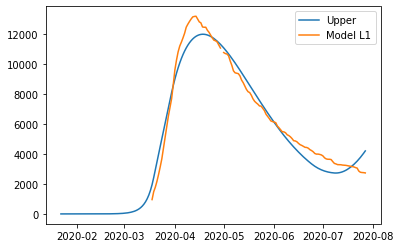

{'home': 0.9936307311069354, 'leisure': 0.8980048856697053, 'other': 0.8794725062335006, 'school': 0.9714677494768726, 'transport': 0.9069479356535469, 'work': 0.9671666264121608}
{'home': 0.9936307311069354, 'leisure': 0.20992486107622466, 'other': 0.20082164913896244, 'school': 0, 'transport': 0.1296296580250853, 'work': 0.07126028826521087}
{'home': 0.9936307311069354, 'leisure': 0.20992486107622466, 'other': 0.20082164913896244, 'school': 0, 'transport': 0.1296296580250853, 'work': 0.07126028826521087}
{'home': 0.9936307311069354, 'leisure': 0.33150462479295967, 'other': 0.37133633300418734, 'school': 0.320584357327368, 'transport': 0.299464393945798, 'work': 0.18160599885162512}
{'home': 0.9936307311069354, 'leisure': 0.38061001644522974, 'other': 0.49050563068733594, 'school': 0.6508833921495047, 'transport': 0.44159713923739063, 'work': 0.3120219775020042}
{'home': 0.9936307311069354, 'leisure': 0.4593060207512391, 'other': 0.5582415242471718, 'school': 0.6508833921495047, 'tran

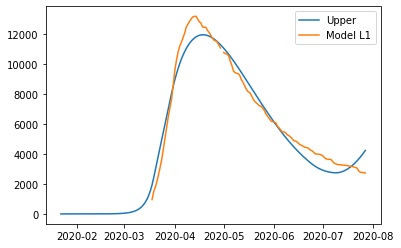

{'home': 0.9936731486357235, 'leisure': 0.8979062319191397, 'other': 0.8794018111943654, 'school': 0.9712439638885351, 'transport': 0.9068540173560368, 'work': 0.9670101138979812}
{'home': 0.9936731486357235, 'leisure': 0.20995369559419727, 'other': 0.20086671017423782, 'school': 0, 'transport': 0.1297385699927835, 'work': 0.07137799152609488}
{'home': 0.9936731486357235, 'leisure': 0.20995369559419727, 'other': 0.20086671017423782, 'school': 0, 'transport': 0.1297385699927835, 'work': 0.07137799152609488}
{'home': 0.9936731486357235, 'leisure': 0.33162316745094494, 'other': 0.3714484632859536, 'school': 0.32051050808321657, 'transport': 0.2996495737787614, 'work': 0.18179369666754364}
{'home': 0.9936731486357235, 'leisure': 0.3808674399338148, 'other': 0.49072042024371165, 'school': 0.6507334558053185, 'transport': 0.4418809593710154, 'work': 0.31225510454236705}
{'home': 0.9936731486357235, 'leisure': 0.4595086228106842, 'other': 0.5584057132312282, 'school': 0.6507334558053185, 'tra

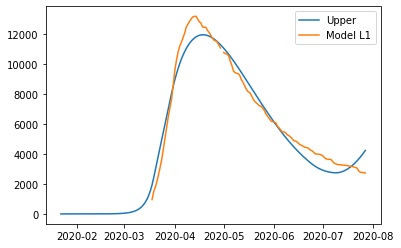

{'home': 0.9936731486357235, 'leisure': 0.8979062319191397, 'other': 0.8794018111943654, 'school': 0.9712439638885351, 'transport': 0.9068540173560368, 'work': 0.9670101138979812}
{'home': 0.9936731486357235, 'leisure': 0.20995369559419727, 'other': 0.20086671017423782, 'school': 0, 'transport': 0.1297385699927835, 'work': 0.07137799152609488}
{'home': 0.9936731486357235, 'leisure': 0.20995369559419727, 'other': 0.20086671017423782, 'school': 0, 'transport': 0.1297385699927835, 'work': 0.07137799152609488}
{'home': 0.9936731486357235, 'leisure': 0.33162316745094494, 'other': 0.3714484632859536, 'school': 0.32051050808321657, 'transport': 0.2996495737787614, 'work': 0.18179369666754364}
{'home': 0.9936731486357235, 'leisure': 0.3808674399338148, 'other': 0.49072042024371165, 'school': 0.6507334558053185, 'transport': 0.4418809593710154, 'work': 0.31225510454236705}
{'home': 0.9936731486357235, 'leisure': 0.4595086228106842, 'other': 0.5584057132312282, 'school': 0.6507334558053185, 'tra

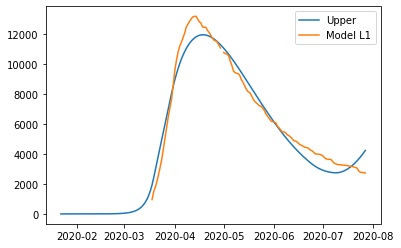

{'home': 0.9936731486357235, 'leisure': 0.8979062319191397, 'other': 0.8794018111943654, 'school': 0.9712439638885351, 'transport': 0.9068540173560368, 'work': 0.9670101138979812}
{'home': 0.9936731486357235, 'leisure': 0.20995369559419727, 'other': 0.20086671017423782, 'school': 0, 'transport': 0.1297385699927835, 'work': 0.07137799152609488}
{'home': 0.9936731486357235, 'leisure': 0.20995369559419727, 'other': 0.20086671017423782, 'school': 0, 'transport': 0.1297385699927835, 'work': 0.07137799152609488}
{'home': 0.9936731486357235, 'leisure': 0.33162316745094494, 'other': 0.3714484632859536, 'school': 0.32051050808321657, 'transport': 0.2996495737787614, 'work': 0.18179369666754364}
{'home': 0.9936731486357235, 'leisure': 0.3808674399338148, 'other': 0.49072042024371165, 'school': 0.6507334558053185, 'transport': 0.4418809593710154, 'work': 0.31225510454236705}
{'home': 0.9936731486357235, 'leisure': 0.4595086228106842, 'other': 0.5584057132312282, 'school': 0.6507334558053185, 'tra

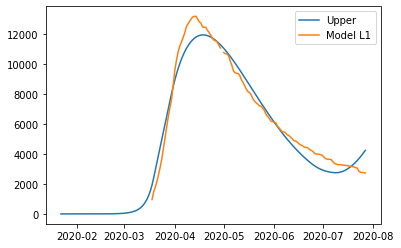

{'home': 0.9936930005398655, 'leisure': 0.8978735101328073, 'other': 0.879378236663575, 'school': 0.9711628629221811, 'transport': 0.9068248298383241, 'work': 0.9669608129512324}
{'home': 0.9936930005398655, 'leisure': 0.20996134117620685, 'other': 0.20087957728109654, 'school': 0, 'transport': 0.1297703928674653, 'work': 0.07141229475551669}
{'home': 0.9936930005398655, 'leisure': 0.20996134117620685, 'other': 0.20087957728109654, 'school': 0, 'transport': 0.1297703928674653, 'work': 0.07141229475551669}
{'home': 0.9936930005398655, 'leisure': 0.3316567492453958, 'other': 0.3714807792190527, 'school': 0.3204837447643198, 'transport': 0.29970354376134134, 'work': 0.18184815285350178}
{'home': 0.9936930005398655, 'leisure': 0.38094161560091216, 'other': 0.4907825654807638, 'school': 0.6506791181578614, 'transport': 0.44196368864225105, 'work': 0.3123224170406288}
{'home': 0.9936930005398655, 'leisure': 0.45956622298899674, 'other': 0.5584524886513705, 'school': 0.6506791181578614, 'tran

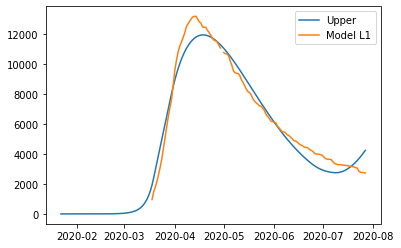

{'home': 0.9936930005398655, 'leisure': 0.8978735101328073, 'other': 0.879378236663575, 'school': 0.9711628629221811, 'transport': 0.9068248298383241, 'work': 0.9669608129512324}
{'home': 0.9936930005398655, 'leisure': 0.20996134117620685, 'other': 0.20087957728109654, 'school': 0, 'transport': 0.1297703928674653, 'work': 0.07141229475551669}
{'home': 0.9936930005398655, 'leisure': 0.20996134117620685, 'other': 0.20087957728109654, 'school': 0, 'transport': 0.1297703928674653, 'work': 0.07141229475551669}
{'home': 0.9936930005398655, 'leisure': 0.3316567492453958, 'other': 0.3714807792190527, 'school': 0.3204837447643198, 'transport': 0.29970354376134134, 'work': 0.18184815285350178}
{'home': 0.9936930005398655, 'leisure': 0.38094161560091216, 'other': 0.4907825654807638, 'school': 0.6506791181578614, 'transport': 0.44196368864225105, 'work': 0.3123224170406288}
{'home': 0.9936930005398655, 'leisure': 0.45956622298899674, 'other': 0.5584524886513705, 'school': 0.6506791181578614, 'tran

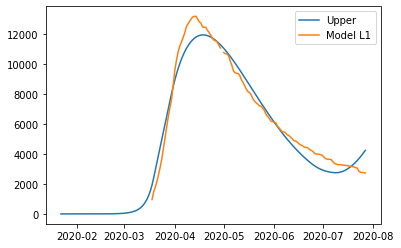

{'home': 0.9936930005398655, 'leisure': 0.8978735101328073, 'other': 0.879378236663575, 'school': 0.9711628629221811, 'transport': 0.9068248298383241, 'work': 0.9669608129512324}
{'home': 0.9936930005398655, 'leisure': 0.20996134117620685, 'other': 0.20087957728109654, 'school': 0, 'transport': 0.1297703928674653, 'work': 0.07141229475551669}
{'home': 0.9936930005398655, 'leisure': 0.20996134117620685, 'other': 0.20087957728109654, 'school': 0, 'transport': 0.1297703928674653, 'work': 0.07141229475551669}
{'home': 0.9936930005398655, 'leisure': 0.3316567492453958, 'other': 0.3714807792190527, 'school': 0.3204837447643198, 'transport': 0.29970354376134134, 'work': 0.18184815285350178}
{'home': 0.9936930005398655, 'leisure': 0.38094161560091216, 'other': 0.4907825654807638, 'school': 0.6506791181578614, 'transport': 0.44196368864225105, 'work': 0.3123224170406288}
{'home': 0.9936930005398655, 'leisure': 0.45956622298899674, 'other': 0.5584524886513705, 'school': 0.6506791181578614, 'tran

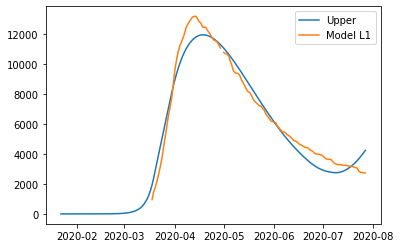

{'home': 0.9937790052155583, 'leisure': 0.8978401708901103, 'other': 0.8793552036274995, 'school': 0.9710221155659854, 'transport': 0.9068086652919737, 'work': 0.9669293655871715}
{'home': 0.9937790052155583, 'leisure': 0.20995542193225789, 'other': 0.20087847282387575, 'school': 0, 'transport': 0.1297719902216221, 'work': 0.07141349889883916}
{'home': 0.9937790052155583, 'leisure': 0.20995542193225789, 'other': 0.20087847282387575, 'school': 0, 'transport': 0.1297719902216221, 'work': 0.07141349889883916}
{'home': 0.9937790052155583, 'leisure': 0.33164994806638043, 'other': 0.37148007472363836, 'school': 0.3204372981367752, 'transport': 0.2997050965628082, 'work': 0.1818480764789176}
{'home': 0.9937790052155583, 'leisure': 0.3809369444154659, 'other': 0.49078231972368747, 'school': 0.6505848174292103, 'transport': 0.4419661509663075, 'work': 0.31231968514862296}
{'home': 0.9937790052155583, 'leisure': 0.4595560974009204, 'other': 0.5584466625957977, 'school': 0.6505848174292103, 'tran

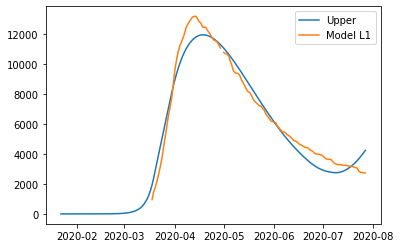

{'home': 0.9937790052155583, 'leisure': 0.8978401708901103, 'other': 0.8793552036274995, 'school': 0.9710221155659854, 'transport': 0.9068086652919737, 'work': 0.9669293655871715}
{'home': 0.9937790052155583, 'leisure': 0.20995542193225789, 'other': 0.20087847282387575, 'school': 0, 'transport': 0.1297719902216221, 'work': 0.07141349889883916}
{'home': 0.9937790052155583, 'leisure': 0.20995542193225789, 'other': 0.20087847282387575, 'school': 0, 'transport': 0.1297719902216221, 'work': 0.07141349889883916}
{'home': 0.9937790052155583, 'leisure': 0.33164994806638043, 'other': 0.37148007472363836, 'school': 0.3204372981367752, 'transport': 0.2997050965628082, 'work': 0.1818480764789176}
{'home': 0.9937790052155583, 'leisure': 0.3809369444154659, 'other': 0.49078231972368747, 'school': 0.6505848174292103, 'transport': 0.4419661509663075, 'work': 0.31231968514862296}
{'home': 0.9937790052155583, 'leisure': 0.4595560974009204, 'other': 0.5584466625957977, 'school': 0.6505848174292103, 'tran

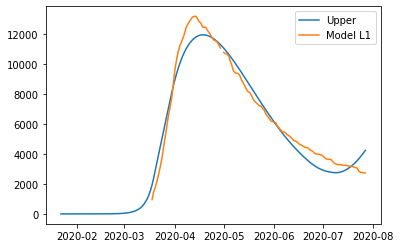

{'home': 0.9937790052155583, 'leisure': 0.8978401708901103, 'other': 0.8793552036274995, 'school': 0.9710221155659854, 'transport': 0.9068086652919737, 'work': 0.9669293655871715}
{'home': 0.9937790052155583, 'leisure': 0.20995542193225789, 'other': 0.20087847282387575, 'school': 0, 'transport': 0.1297719902216221, 'work': 0.07141349889883916}
{'home': 0.9937790052155583, 'leisure': 0.20995542193225789, 'other': 0.20087847282387575, 'school': 0, 'transport': 0.1297719902216221, 'work': 0.07141349889883916}
{'home': 0.9937790052155583, 'leisure': 0.33164994806638043, 'other': 0.37148007472363836, 'school': 0.3204372981367752, 'transport': 0.2997050965628082, 'work': 0.1818480764789176}
{'home': 0.9937790052155583, 'leisure': 0.3809369444154659, 'other': 0.49078231972368747, 'school': 0.6505848174292103, 'transport': 0.4419661509663075, 'work': 0.31231968514862296}
{'home': 0.9937790052155583, 'leisure': 0.4595560974009204, 'other': 0.5584466625957977, 'school': 0.6505848174292103, 'tran

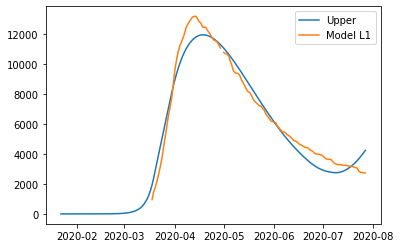

{'home': 0.9937790052155583, 'leisure': 0.8978401708901103, 'other': 0.8793552036274995, 'school': 0.9710221155659854, 'transport': 0.9068086652919737, 'work': 0.9669293655871715}
{'home': 0.9937790052155583, 'leisure': 0.20995542193225789, 'other': 0.20087847282387575, 'school': 0, 'transport': 0.1297719902216221, 'work': 0.07141349889883916}
{'home': 0.9937790052155583, 'leisure': 0.20995542193225789, 'other': 0.20087847282387575, 'school': 0, 'transport': 0.1297719902216221, 'work': 0.07141349889883916}
{'home': 0.9937790052155583, 'leisure': 0.33164994806638043, 'other': 0.37148007472363836, 'school': 0.3204372981367752, 'transport': 0.2997050965628082, 'work': 0.1818480764789176}
{'home': 0.9937790052155583, 'leisure': 0.3809369444154659, 'other': 0.49078231972368747, 'school': 0.6505848174292103, 'transport': 0.4419661509663075, 'work': 0.31231968514862296}
{'home': 0.9937790052155583, 'leisure': 0.4595560974009204, 'other': 0.5584466625957977, 'school': 0.6505848174292103, 'tran

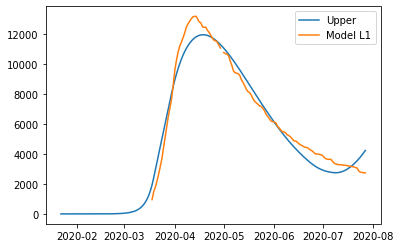

{'home': 0.993831725330298, 'leisure': 0.8978251821752183, 'other': 0.8793460920307262, 'school': 0.9709130959698623, 'transport': 0.9068179913479372, 'work': 0.9669333785460262}
{'home': 0.993831725330298, 'leisure': 0.2099373232197537, 'other': 0.2008616964948429, 'school': 0, 'transport': 0.1297382568364362, 'work': 0.07137600804841256}
{'home': 0.993831725330298, 'leisure': 0.2099373232197537, 'other': 0.2008616964948429, 'school': 0, 'transport': 0.1297382568364362, 'work': 0.07137600804841256}
{'home': 0.993831725330298, 'leisure': 0.33160071320495205, 'other': 0.3714413328877586, 'school': 0.3204013216700546, 'transport': 0.2996461893549828, 'work': 0.18178525034007648}
{'home': 0.993831725330298, 'leisure': 0.3808446922963774, 'other': 0.4907101855631429, 'school': 0.6505117742998078, 'transport': 0.44187598472299716, 'work': 0.3122376606224408}
{'home': 0.993831725330298, 'leisure': 0.45947442803964184, 'other': 0.5583837687756548, 'school': 0.6505117742998078, 'transport': 0.

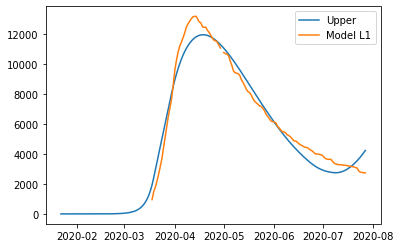

{'home': 0.993831725330298, 'leisure': 0.8978251821752183, 'other': 0.8793460920307262, 'school': 0.9709130959698623, 'transport': 0.9068179913479372, 'work': 0.9669333785460262}
{'home': 0.993831725330298, 'leisure': 0.2099373232197537, 'other': 0.2008616964948429, 'school': 0, 'transport': 0.1297382568364362, 'work': 0.07137600804841256}
{'home': 0.993831725330298, 'leisure': 0.2099373232197537, 'other': 0.2008616964948429, 'school': 0, 'transport': 0.1297382568364362, 'work': 0.07137600804841256}
{'home': 0.993831725330298, 'leisure': 0.33160071320495205, 'other': 0.3714413328877586, 'school': 0.3204013216700546, 'transport': 0.2996461893549828, 'work': 0.18178525034007648}
{'home': 0.993831725330298, 'leisure': 0.3808446922963774, 'other': 0.4907101855631429, 'school': 0.6505117742998078, 'transport': 0.44187598472299716, 'work': 0.3122376606224408}
{'home': 0.993831725330298, 'leisure': 0.45947442803964184, 'other': 0.5583837687756548, 'school': 0.6505117742998078, 'transport': 0.

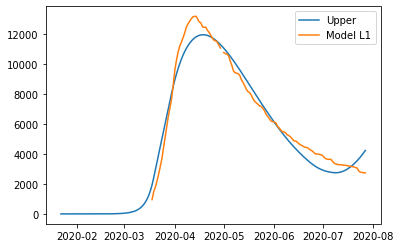

{'home': 0.993831725330298, 'leisure': 0.8978251821752183, 'other': 0.8793460920307262, 'school': 0.9709130959698623, 'transport': 0.9068179913479372, 'work': 0.9669333785460262}
{'home': 0.993831725330298, 'leisure': 0.2099373232197537, 'other': 0.2008616964948429, 'school': 0, 'transport': 0.1297382568364362, 'work': 0.07137600804841256}
{'home': 0.993831725330298, 'leisure': 0.2099373232197537, 'other': 0.2008616964948429, 'school': 0, 'transport': 0.1297382568364362, 'work': 0.07137600804841256}
{'home': 0.993831725330298, 'leisure': 0.33160071320495205, 'other': 0.3714413328877586, 'school': 0.3204013216700546, 'transport': 0.2996461893549828, 'work': 0.18178525034007648}
{'home': 0.993831725330298, 'leisure': 0.3808446922963774, 'other': 0.4907101855631429, 'school': 0.6505117742998078, 'transport': 0.44187598472299716, 'work': 0.3122376606224408}
{'home': 0.993831725330298, 'leisure': 0.45947442803964184, 'other': 0.5583837687756548, 'school': 0.6505117742998078, 'transport': 0.

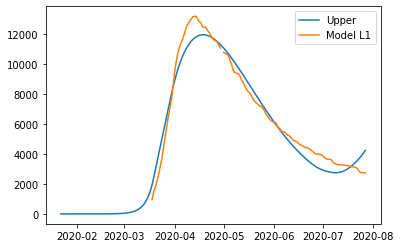

{'home': 0.993831725330298, 'leisure': 0.8978251821752183, 'other': 0.8793460920307262, 'school': 0.9709130959698623, 'transport': 0.9068179913479372, 'work': 0.9669333785460262}
{'home': 0.993831725330298, 'leisure': 0.2099373232197537, 'other': 0.2008616964948429, 'school': 0, 'transport': 0.1297382568364362, 'work': 0.07137600804841256}
{'home': 0.993831725330298, 'leisure': 0.2099373232197537, 'other': 0.2008616964948429, 'school': 0, 'transport': 0.1297382568364362, 'work': 0.07137600804841256}
{'home': 0.993831725330298, 'leisure': 0.33160071320495205, 'other': 0.3714413328877586, 'school': 0.3204013216700546, 'transport': 0.2996461893549828, 'work': 0.18178525034007648}
{'home': 0.993831725330298, 'leisure': 0.3808446922963774, 'other': 0.4907101855631429, 'school': 0.6505117742998078, 'transport': 0.44187598472299716, 'work': 0.3122376606224408}
{'home': 0.993831725330298, 'leisure': 0.45947442803964184, 'other': 0.5583837687756548, 'school': 0.6505117742998078, 'transport': 0.

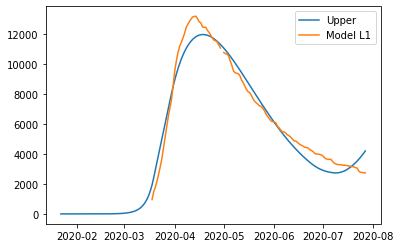

{'home': 0.9940426057892566, 'leisure': 0.8977652273156507, 'other': 0.879309645643633, 'school': 0.97047701758537, 'transport': 0.9068552955717911, 'work': 0.9669494303814453}
{'home': 0.9940426057892566, 'leisure': 0.2098649519924972, 'other': 0.20079460701794188, 'school': 0, 'transport': 0.1296033356834324, 'work': 0.07122598356742574}
{'home': 0.9940426057892566, 'leisure': 0.2098649519924972, 'other': 0.20079460701794188, 'school': 0, 'transport': 0.1296033356834324, 'work': 0.07122598356742574}
{'home': 0.9940426057892566, 'leisure': 0.3314038444934979, 'other': 0.3712864031541264, 'school': 0.32025741580317213, 'transport': 0.2994105824214097, 'work': 0.1815338430126325}
{'home': 0.9940426057892566, 'leisure': 0.38047582285437115, 'other': 0.49042172119111105, 'school': 0.650219601782198, 'transport': 0.44151535320653557, 'work': 0.3119094278381043}
{'home': 0.9940426057892566, 'leisure': 0.4591478703740686, 'other': 0.5581322550495992, 'school': 0.650219601782198, 'transport':

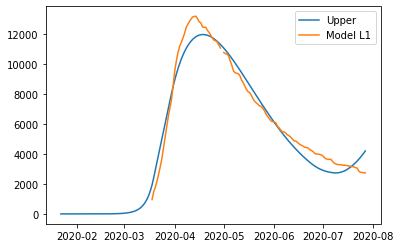

{'home': 0.9940426057892566, 'leisure': 0.8977652273156507, 'other': 0.879309645643633, 'school': 0.97047701758537, 'transport': 0.9068552955717911, 'work': 0.9669494303814453}
{'home': 0.9940426057892566, 'leisure': 0.2098649519924972, 'other': 0.20079460701794188, 'school': 0, 'transport': 0.1296033356834324, 'work': 0.07122598356742574}
{'home': 0.9940426057892566, 'leisure': 0.2098649519924972, 'other': 0.20079460701794188, 'school': 0, 'transport': 0.1296033356834324, 'work': 0.07122598356742574}
{'home': 0.9940426057892566, 'leisure': 0.3314038444934979, 'other': 0.3712864031541264, 'school': 0.32025741580317213, 'transport': 0.2994105824214097, 'work': 0.1815338430126325}
{'home': 0.9940426057892566, 'leisure': 0.38047582285437115, 'other': 0.49042172119111105, 'school': 0.650219601782198, 'transport': 0.44151535320653557, 'work': 0.3119094278381043}
{'home': 0.9940426057892566, 'leisure': 0.4591478703740686, 'other': 0.5581322550495992, 'school': 0.650219601782198, 'transport':

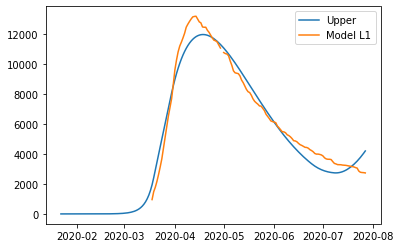

{'home': 0.9940426057892566, 'leisure': 0.8977652273156507, 'other': 0.879309645643633, 'school': 0.97047701758537, 'transport': 0.9068552955717911, 'work': 0.9669494303814453}
{'home': 0.9940426057892566, 'leisure': 0.2098649519924972, 'other': 0.20079460701794188, 'school': 0, 'transport': 0.1296033356834324, 'work': 0.07122598356742574}
{'home': 0.9940426057892566, 'leisure': 0.2098649519924972, 'other': 0.20079460701794188, 'school': 0, 'transport': 0.1296033356834324, 'work': 0.07122598356742574}
{'home': 0.9940426057892566, 'leisure': 0.3314038444934979, 'other': 0.3712864031541264, 'school': 0.32025741580317213, 'transport': 0.2994105824214097, 'work': 0.1815338430126325}
{'home': 0.9940426057892566, 'leisure': 0.38047582285437115, 'other': 0.49042172119111105, 'school': 0.650219601782198, 'transport': 0.44151535320653557, 'work': 0.3119094278381043}
{'home': 0.9940426057892566, 'leisure': 0.4591478703740686, 'other': 0.5581322550495992, 'school': 0.650219601782198, 'transport':

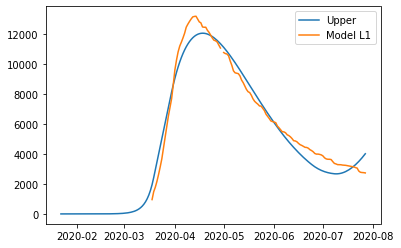

{'home': 0.9955730040853434, 'leisure': 0.8972594623186024, 'other': 0.8789902953701373, 'school': 0.9672937823218781, 'transport': 0.9070057635944103, 'work': 0.96689566389119}
{'home': 0.9955730040853434, 'leisure': 0.20941019174513809, 'other': 0.2003922188183085, 'school': 0, 'transport': 0.12881196461001942, 'work': 0.07034045025122121}
{'home': 0.9955730040853434, 'leisure': 0.20941019174513809, 'other': 0.2003922188183085, 'school': 0, 'transport': 0.12881196461001942, 'work': 0.07034045025122121}
{'home': 0.9955730040853434, 'leisure': 0.3302089950703872, 'other': 0.3703656263712221, 'school': 0.3192069481662198, 'transport': 0.2980232778357653, 'work': 0.1800400109864561}
{'home': 0.9955730040853434, 'leisure': 0.37827405661237906, 'other': 0.4887131648885721, 'school': 0.6480868341556584, 'transport': 0.4393922647615771, 'work': 0.309946742969246}
{'home': 0.9955730040853434, 'leisure': 0.4571718554987089, 'other': 0.5566178669538974, 'school': 0.6480868341556584, 'transport'

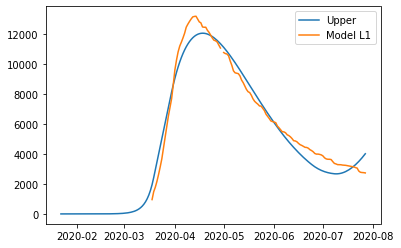

{'home': 0.9955730040853434, 'leisure': 0.8972594623186024, 'other': 0.8789902953701373, 'school': 0.9672937823218781, 'transport': 0.9070057635944103, 'work': 0.96689566389119}
{'home': 0.9955730040853434, 'leisure': 0.20941019174513809, 'other': 0.2003922188183085, 'school': 0, 'transport': 0.12881196461001942, 'work': 0.07034045025122121}
{'home': 0.9955730040853434, 'leisure': 0.20941019174513809, 'other': 0.2003922188183085, 'school': 0, 'transport': 0.12881196461001942, 'work': 0.07034045025122121}
{'home': 0.9955730040853434, 'leisure': 0.3302089950703872, 'other': 0.3703656263712221, 'school': 0.3192069481662198, 'transport': 0.2980232778357653, 'work': 0.1800400109864561}
{'home': 0.9955730040853434, 'leisure': 0.37827405661237906, 'other': 0.4887131648885721, 'school': 0.6480868341556584, 'transport': 0.4393922647615771, 'work': 0.309946742969246}
{'home': 0.9955730040853434, 'leisure': 0.4571718554987089, 'other': 0.5566178669538974, 'school': 0.6480868341556584, 'transport'

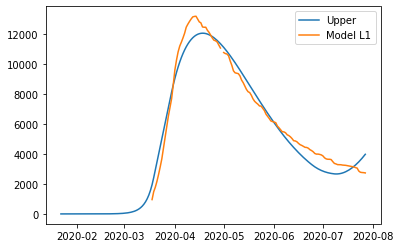

{'home': 0.9961019834642388, 'leisure': 0.8970141206696967, 'other': 0.8788352643193259, 'school': 0.966097987455587, 'transport': 0.906976704949477, 'work': 0.9667357782303718}
{'home': 0.9961019834642388, 'leisure': 0.20928787122144513, 'other': 0.20030220019306133, 'school': 0, 'transport': 0.12864798630368585, 'work': 0.07015242327197016}
{'home': 0.9961019834642388, 'leisure': 0.20928787122144513, 'other': 0.20030220019306133, 'school': 0, 'transport': 0.12864798630368585, 'work': 0.07015242327197016}
{'home': 0.9961019834642388, 'leisure': 0.3299232939299942, 'other': 0.3701663220026124, 'school': 0.3188123358603437, 'transport': 0.2977311095201391, 'work': 0.17971303014679457}
{'home': 0.9961019834642388, 'leisure': 0.37778007667029095, 'other': 0.48834699417073973, 'school': 0.6472856515952433, 'transport': 0.43894547067367207, 'work': 0.30950500916937645}
{'home': 0.9961019834642388, 'leisure': 0.456704880182273, 'other': 0.556272679709365, 'school': 0.6472856515952433, 'trans

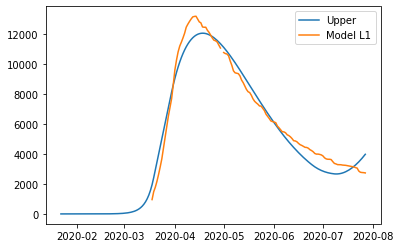

{'home': 0.9961019834642388, 'leisure': 0.8970141206696967, 'other': 0.8788352643193259, 'school': 0.966097987455587, 'transport': 0.906976704949477, 'work': 0.9667357782303718}
{'home': 0.9961019834642388, 'leisure': 0.20928787122144513, 'other': 0.20030220019306133, 'school': 0, 'transport': 0.12864798630368585, 'work': 0.07015242327197016}
{'home': 0.9961019834642388, 'leisure': 0.20928787122144513, 'other': 0.20030220019306133, 'school': 0, 'transport': 0.12864798630368585, 'work': 0.07015242327197016}
{'home': 0.9961019834642388, 'leisure': 0.3299232939299942, 'other': 0.3701663220026124, 'school': 0.3188123358603437, 'transport': 0.2977311095201391, 'work': 0.17971303014679457}
{'home': 0.9961019834642388, 'leisure': 0.37778007667029095, 'other': 0.48834699417073973, 'school': 0.6472856515952433, 'transport': 0.43894547067367207, 'work': 0.30950500916937645}
{'home': 0.9961019834642388, 'leisure': 0.456704880182273, 'other': 0.556272679709365, 'school': 0.6472856515952433, 'trans

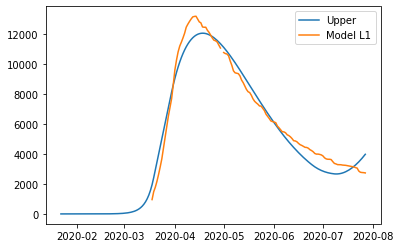

{'home': 0.9961019834642388, 'leisure': 0.8970141206696967, 'other': 0.8788352643193259, 'school': 0.966097987455587, 'transport': 0.906976704949477, 'work': 0.9667357782303718}
{'home': 0.9961019834642388, 'leisure': 0.20928787122144513, 'other': 0.20030220200584836, 'school': 0, 'transport': 0.12864798630368585, 'work': 0.07015242327197016}
{'home': 0.9961019834642388, 'leisure': 0.20928787122144513, 'other': 0.20030220200584836, 'school': 0, 'transport': 0.12864798630368585, 'work': 0.07015242327197016}
{'home': 0.9961019834642388, 'leisure': 0.3299232939299942, 'other': 0.37016632336158595, 'school': 0.3188123358603437, 'transport': 0.2977311095201391, 'work': 0.17971303014679457}
{'home': 0.9961019834642388, 'leisure': 0.37778007667029095, 'other': 0.4883469952139787, 'school': 0.6472856515952433, 'transport': 0.43894547067367207, 'work': 0.30950500916937645}
{'home': 0.9961019834642388, 'leisure': 0.456704880182273, 'other': 0.5562726805711319, 'school': 0.6472856515952433, 'tran

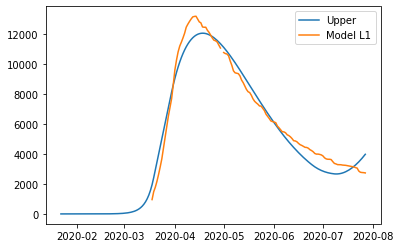

{'home': 0.9961019834642388, 'leisure': 0.8970141206696967, 'other': 0.8788352643193259, 'school': 0.966097987455587, 'transport': 0.906976704949477, 'work': 0.9667357782303718}
{'home': 0.9961019834642388, 'leisure': 0.20928787122144513, 'other': 0.2003021996579286, 'school': 0, 'transport': 0.12864798630368585, 'work': 0.07015242327197016}
{'home': 0.9961019834642388, 'leisure': 0.20928787122144513, 'other': 0.2003021996579286, 'school': 0, 'transport': 0.12864798630368585, 'work': 0.07015242327197016}
{'home': 0.9961019834642388, 'leisure': 0.3299232939299942, 'other': 0.37016632336158595, 'school': 0.3188123358603437, 'transport': 0.2977311095201391, 'work': 0.17971303014679457}
{'home': 0.9961019834642388, 'leisure': 0.37778007667029095, 'other': 0.4883469952139787, 'school': 0.6472856515952433, 'transport': 0.43894547067367207, 'work': 0.30950500916937645}
{'home': 0.9961019834642388, 'leisure': 0.456704880182273, 'other': 0.5562726805711319, 'school': 0.6472856515952433, 'transp

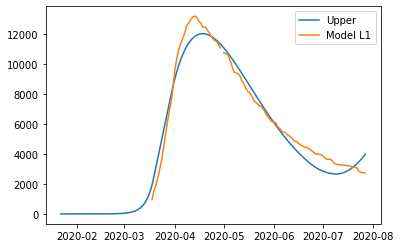

{'home': 0.9961171558232681, 'leisure': 0.8969693475977402, 'other': 0.878807012613941, 'school': 0.965870845452499, 'transport': 0.9069740047488366, 'work': 0.9667099925131454}
{'home': 0.9961171558232681, 'leisure': 0.20926344060332477, 'other': 0.20028311199983245, 'school': 0, 'transport': 0.12861246192601689, 'work': 0.07011191142981937}
{'home': 0.9961171558232681, 'leisure': 0.20926344060332477, 'other': 0.20028311199983245, 'school': 0, 'transport': 0.12861246192601689, 'work': 0.07011191142981937}
{'home': 0.9961171558232681, 'leisure': 0.32986431429623553, 'other': 0.3701236887644961, 'school': 0.3187373789993247, 'transport': 0.29766809501385016, 'work': 0.17964315108608514}
{'home': 0.9961171558232681, 'leisure': 0.3776760830691882, 'other': 0.4882684502501461, 'school': 0.6471334664531744, 'transport': 0.4388490870746084, 'work': 0.30941129268859413}
{'home': 0.9961171558232681, 'leisure': 0.45660804745124406, 'other': 0.5561998273362675, 'school': 0.6471334664531744, 'tra

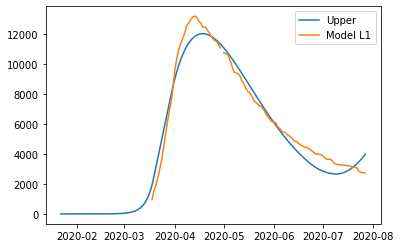

{'home': 0.9961171558232681, 'leisure': 0.8969693475977402, 'other': 0.878807012613941, 'school': 0.965870845452499, 'transport': 0.9069740047488366, 'work': 0.9667099925131454}
{'home': 0.9961171558232681, 'leisure': 0.20926344060332477, 'other': 0.20028311199983245, 'school': 0, 'transport': 0.12861246192601689, 'work': 0.07011191142981937}
{'home': 0.9961171558232681, 'leisure': 0.20926344060332477, 'other': 0.20028311199983245, 'school': 0, 'transport': 0.12861246192601689, 'work': 0.07011191142981937}
{'home': 0.9961171558232681, 'leisure': 0.32986431429623553, 'other': 0.3701236887644961, 'school': 0.3187373789993247, 'transport': 0.29766809501385016, 'work': 0.17964315108608514}
{'home': 0.9961171558232681, 'leisure': 0.3776760830691882, 'other': 0.4882684502501461, 'school': 0.6471334664531744, 'transport': 0.4388490870746084, 'work': 0.30941129268859413}
{'home': 0.9961171558232681, 'leisure': 0.45660804745124406, 'other': 0.5561998273362675, 'school': 0.6471334664531744, 'tra

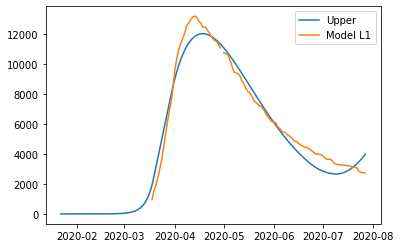

{'home': 0.9961171558232681, 'leisure': 0.8969693475977402, 'other': 0.878807012613941, 'school': 0.965870845452499, 'transport': 0.9069740047488366, 'work': 0.9667099925131454}
{'home': 0.9961171558232681, 'leisure': 0.20926344060332477, 'other': 0.2002831138125193, 'school': 0, 'transport': 0.12861246192601689, 'work': 0.07011191142981937}
{'home': 0.9961171558232681, 'leisure': 0.20926344060332477, 'other': 0.2002831138125193, 'school': 0, 'transport': 0.12861246192601689, 'work': 0.07011191142981937}
{'home': 0.9961171558232681, 'leisure': 0.32986431429623553, 'other': 0.37012369012345125, 'school': 0.3187373789993247, 'transport': 0.29766809501385016, 'work': 0.17964315108608514}
{'home': 0.9961171558232681, 'leisure': 0.3776760830691882, 'other': 0.48826845129347574, 'school': 0.6471334664531744, 'transport': 0.4388490870746084, 'work': 0.30941129268859413}
{'home': 0.9961171558232681, 'leisure': 0.45660804745124406, 'other': 0.5561998281981174, 'school': 0.6471334664531744, 'tra

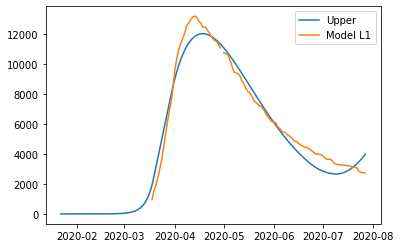

{'home': 0.9961171558232681, 'leisure': 0.8969693475977402, 'other': 0.878807012613941, 'school': 0.965870845452499, 'transport': 0.9069740047488366, 'work': 0.9667099925131454}
{'home': 0.9961171558232681, 'leisure': 0.20926344060332477, 'other': 0.2002831114647731, 'school': 0, 'transport': 0.12861246192601689, 'work': 0.07011191142981937}
{'home': 0.9961171558232681, 'leisure': 0.20926344060332477, 'other': 0.2002831114647731, 'school': 0, 'transport': 0.12861246192601689, 'work': 0.07011191142981937}
{'home': 0.9961171558232681, 'leisure': 0.32986431429623553, 'other': 0.37012369012345125, 'school': 0.3187373789993247, 'transport': 0.29766809501385016, 'work': 0.17964315108608514}
{'home': 0.9961171558232681, 'leisure': 0.3776760830691882, 'other': 0.48826845129347574, 'school': 0.6471334664531744, 'transport': 0.4388490870746084, 'work': 0.30941129268859413}
{'home': 0.9961171558232681, 'leisure': 0.45660804745124406, 'other': 0.5561998281981174, 'school': 0.6471334664531744, 'tra

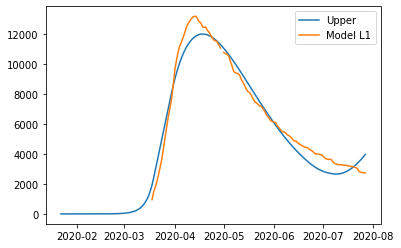

{'home': 0.9961306139769383, 'leisure': 0.8969287142294802, 'other': 0.8787819665286444, 'school': 0.9656643457799523, 'transport': 0.9069714723763638, 'work': 0.9666866737129507}
{'home': 0.9961306139769383, 'leisure': 0.2092415055750682, 'other': 0.20026603873721485, 'school': 0, 'transport': 0.12858040848876953, 'work': 0.07007535687131808}
{'home': 0.9961306139769383, 'leisure': 0.2092415055750682, 'other': 0.20026603873721485, 'school': 0, 'transport': 0.12858040848876953, 'work': 0.07007535687131808}
{'home': 0.9961306139769383, 'leisure': 0.3298112829225111, 'other': 0.37008550819925806, 'school': 0.3186692341073843, 'transport': 0.29761123041420867, 'work': 0.17958009439803302}
{'home': 0.9961306139769383, 'leisure': 0.37758247184503174, 'other': 0.48819794961215046, 'school': 0.6469951116725681, 'transport': 0.43876210916962444, 'work': 0.3093267203193875}
{'home': 0.9961306139769383, 'leisure': 0.45652091615505286, 'other': 0.5561344655329724, 'school': 0.6469951116725681, 't

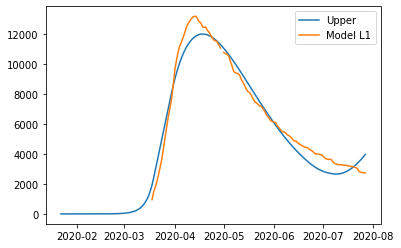

{'home': 0.9961306139769383, 'leisure': 0.8969287142294802, 'other': 0.8787819665286444, 'school': 0.9656643457799523, 'transport': 0.9069714723763638, 'work': 0.9666866737129507}
{'home': 0.9961306139769383, 'leisure': 0.2092415055750682, 'other': 0.20026603873721485, 'school': 0, 'transport': 0.12858040848876953, 'work': 0.07007535687131808}
{'home': 0.9961306139769383, 'leisure': 0.2092415055750682, 'other': 0.20026603873721485, 'school': 0, 'transport': 0.12858040848876953, 'work': 0.07007535687131808}
{'home': 0.9961306139769383, 'leisure': 0.3298112829225111, 'other': 0.37008550819925806, 'school': 0.3186692341073843, 'transport': 0.29761123041420867, 'work': 0.17958009439803302}
{'home': 0.9961306139769383, 'leisure': 0.37758247184503174, 'other': 0.48819794961215046, 'school': 0.6469951116725681, 'transport': 0.43876210916962444, 'work': 0.3093267203193875}
{'home': 0.9961306139769383, 'leisure': 0.45652091615505286, 'other': 0.5561344655329724, 'school': 0.6469951116725681, 't

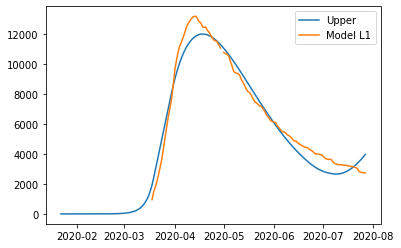

{'home': 0.9961306139769383, 'leisure': 0.8969287142294802, 'other': 0.8787819665286444, 'school': 0.9656643457799523, 'transport': 0.9069714723763638, 'work': 0.9666866737129507}
{'home': 0.9961306139769383, 'leisure': 0.2092415055750682, 'other': 0.20026604054981212, 'school': 0, 'transport': 0.12858040848876953, 'work': 0.07007535687131808}
{'home': 0.9961306139769383, 'leisure': 0.2092415055750682, 'other': 0.20026604054981212, 'school': 0, 'transport': 0.12858040848876953, 'work': 0.07007535687131808}
{'home': 0.9961306139769383, 'leisure': 0.3298112829225111, 'other': 0.37008550955819713, 'school': 0.3186692341073843, 'transport': 0.29761123041420867, 'work': 0.17958009439803302}
{'home': 0.9961306139769383, 'leisure': 0.37758247184503174, 'other': 0.48819795065556215, 'school': 0.6469951116725681, 'transport': 0.43876210916962444, 'work': 0.3093267203193875}
{'home': 0.9961306139769383, 'leisure': 0.45652091615505286, 'other': 0.5561344663948976, 'school': 0.6469951116725681, 't

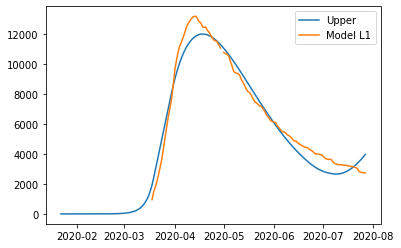

{'home': 0.9961306139769383, 'leisure': 0.8969287142294802, 'other': 0.8787819665286444, 'school': 0.9656643457799523, 'transport': 0.9069714723763638, 'work': 0.9666866737129507}
{'home': 0.9961306139769383, 'leisure': 0.2092415055750682, 'other': 0.20026603820222125, 'school': 0, 'transport': 0.12858040848876953, 'work': 0.07007535687131808}
{'home': 0.9961306139769383, 'leisure': 0.2092415055750682, 'other': 0.20026603820222125, 'school': 0, 'transport': 0.12858040848876953, 'work': 0.07007535687131808}
{'home': 0.9961306139769383, 'leisure': 0.3298112829225111, 'other': 0.37008550955819713, 'school': 0.3186692341073843, 'transport': 0.29761123041420867, 'work': 0.17958009439803302}
{'home': 0.9961306139769383, 'leisure': 0.37758247184503174, 'other': 0.48819795065556215, 'school': 0.6469951116725681, 'transport': 0.43876210916962444, 'work': 0.3093267203193875}
{'home': 0.9961306139769383, 'leisure': 0.45652091615505286, 'other': 0.5561344663948976, 'school': 0.6469951116725681, 't

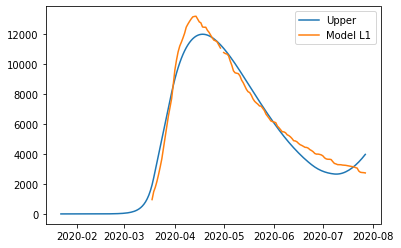

{'home': 0.9961374752085593, 'leisure': 0.8969079985386057, 'other': 0.8787691975414096, 'school': 0.9655590681826145, 'transport': 0.9069701813230356, 'work': 0.9666747853296568}
{'home': 0.9961374752085593, 'leisure': 0.2092303236335283, 'other': 0.20025733503056897, 'school': 0, 'transport': 0.12856406771552292, 'work': 0.07005671936584267}
{'home': 0.9961374752085593, 'leisure': 0.2092303236335283, 'other': 0.20025733503056897, 'school': 0, 'transport': 0.12856406771552292, 'work': 0.07005671936584267}
{'home': 0.9961374752085593, 'leisure': 0.32978424944332285, 'other': 0.37006604440254826, 'school': 0.3186344925002628, 'transport': 0.2975822409595458, 'work': 0.1795479447146989}
{'home': 0.9961374752085593, 'leisure': 0.3775347529435964, 'other': 0.4881620098803984, 'school': 0.6469245756823517, 'transport': 0.4387177680155249, 'work': 0.30928360084748646}
{'home': 0.9961374752085593, 'leisure': 0.45647650006726154, 'other': 0.5561011453200677, 'school': 0.6469245756823517, 'tran

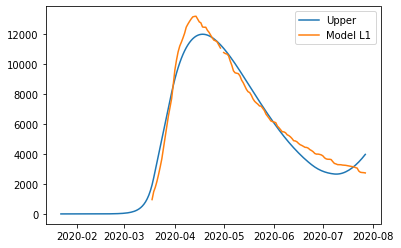

{'home': 0.9961374752085593, 'leisure': 0.8969079985386057, 'other': 0.8787691975414096, 'school': 0.9655590681826145, 'transport': 0.9069701813230356, 'work': 0.9666747853296568}
{'home': 0.9961374752085593, 'leisure': 0.2092303236335283, 'other': 0.20025733503056897, 'school': 0, 'transport': 0.12856406771552292, 'work': 0.07005671936584267}
{'home': 0.9961374752085593, 'leisure': 0.2092303236335283, 'other': 0.20025733503056897, 'school': 0, 'transport': 0.12856406771552292, 'work': 0.07005671936584267}
{'home': 0.9961374752085593, 'leisure': 0.32978424944332285, 'other': 0.37006604440254826, 'school': 0.3186344925002628, 'transport': 0.2975822409595458, 'work': 0.1795479447146989}
{'home': 0.9961374752085593, 'leisure': 0.3775347529435964, 'other': 0.4881620098803984, 'school': 0.6469245756823517, 'transport': 0.4387177680155249, 'work': 0.30928360084748646}
{'home': 0.9961374752085593, 'leisure': 0.45647650006726154, 'other': 0.5561011453200677, 'school': 0.6469245756823517, 'tran

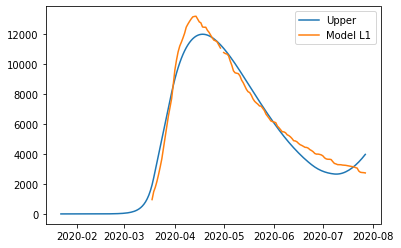

{'home': 0.9961374752085593, 'leisure': 0.8969079985386057, 'other': 0.8787691975414096, 'school': 0.9655590681826145, 'transport': 0.9069701813230356, 'work': 0.9666747853296568}
{'home': 0.9961374752085593, 'leisure': 0.2092303236335283, 'other': 0.20025733503056897, 'school': 0, 'transport': 0.12856406771552292, 'work': 0.07005671936584267}
{'home': 0.9961374752085593, 'leisure': 0.2092303236335283, 'other': 0.20025733503056897, 'school': 0, 'transport': 0.12856406771552292, 'work': 0.07005671936584267}
{'home': 0.9961374752085593, 'leisure': 0.32978424944332285, 'other': 0.37006604440254826, 'school': 0.3186344925002628, 'transport': 0.2975822409595458, 'work': 0.1795479447146989}
{'home': 0.9961374752085593, 'leisure': 0.3775347529435964, 'other': 0.4881620098803984, 'school': 0.6469245756823517, 'transport': 0.4387177680155249, 'work': 0.30928360084748646}
{'home': 0.9961374752085593, 'leisure': 0.45647650006726154, 'other': 0.5561011453200677, 'school': 0.6469245756823517, 'tran

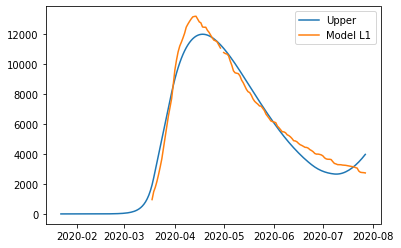

{'home': 0.9961374752085593, 'leisure': 0.8969079985386057, 'other': 0.8787691975414096, 'school': 0.9655590681826145, 'transport': 0.9069701813230356, 'work': 0.9666747853296568}
{'home': 0.9961374752085593, 'leisure': 0.2092303236335283, 'other': 0.2002573368431206, 'school': 0, 'transport': 0.12856406771552292, 'work': 0.07005671936584267}
{'home': 0.9961374752085593, 'leisure': 0.2092303236335283, 'other': 0.2002573368431206, 'school': 0, 'transport': 0.12856406771552292, 'work': 0.07005671936584267}
{'home': 0.9961374752085593, 'leisure': 0.32978424944332285, 'other': 0.37006604576147917, 'school': 0.3186344925002628, 'transport': 0.2975822409595458, 'work': 0.1795479447146989}
{'home': 0.9961374752085593, 'leisure': 0.3775347529435964, 'other': 0.488162010923852, 'school': 0.6469245756823517, 'transport': 0.4387177680155249, 'work': 0.30928360084748646}
{'home': 0.9961374752085593, 'leisure': 0.45647650006726154, 'other': 0.5561011461820312, 'school': 0.6469245756823517, 'transpo

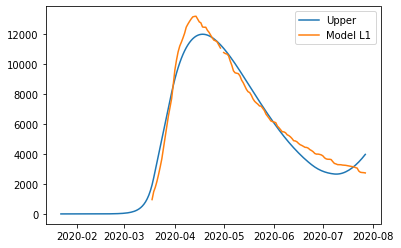

{'home': 0.9961374752085593, 'leisure': 0.8969079985386057, 'other': 0.8787691975414096, 'school': 0.9655590681826145, 'transport': 0.9069701813230356, 'work': 0.9666747853296568}
{'home': 0.9961374752085593, 'leisure': 0.2092303236335283, 'other': 0.20025733449560892, 'school': 0, 'transport': 0.12856406771552292, 'work': 0.07005671936584267}
{'home': 0.9961374752085593, 'leisure': 0.2092303236335283, 'other': 0.20025733449560892, 'school': 0, 'transport': 0.12856406771552292, 'work': 0.07005671936584267}
{'home': 0.9961374752085593, 'leisure': 0.32978424944332285, 'other': 0.37006604576147917, 'school': 0.3186344925002628, 'transport': 0.2975822409595458, 'work': 0.1795479447146989}
{'home': 0.9961374752085593, 'leisure': 0.3775347529435964, 'other': 0.488162010923852, 'school': 0.6469245756823517, 'transport': 0.4387177680155249, 'work': 0.30928360084748646}
{'home': 0.9961374752085593, 'leisure': 0.45647650006726154, 'other': 0.5561011461820312, 'school': 0.6469245756823517, 'trans

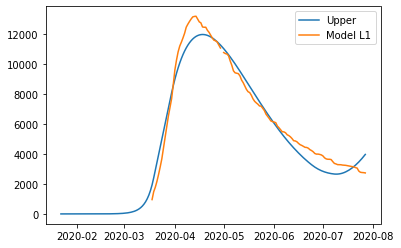

{'home': 0.9961510156903575, 'leisure': 0.8968801660848342, 'other': 0.8787526892469912, 'school': 0.9654174874592997, 'transport': 0.90696832923714, 'work': 0.966658844649393}
{'home': 0.9961510156903575, 'leisure': 0.2092150419250735, 'other': 0.20024594851914373, 'school': 0, 'transport': 0.12854239688676072, 'work': 0.070032001256507}
{'home': 0.9961510156903575, 'leisure': 0.2092150419250735, 'other': 0.20024594851914373, 'school': 0, 'transport': 0.12854239688676072, 'work': 0.070032001256507}
{'home': 0.9961510156903575, 'leisure': 0.32974770223679295, 'other': 0.3700405331504933, 'school': 0.3185877708615689, 'transport': 0.2975437853353519, 'work': 0.17950529449274852}
{'home': 0.9961510156903575, 'leisure': 0.37747068233256237, 'other': 0.48811473299887376, 'school': 0.6468297165977308, 'transport': 0.4386589470910278, 'work': 0.30922638283294024}
{'home': 0.9961510156903575, 'leisure': 0.4564166115503998, 'other': 0.556057335967948, 'school': 0.6468297165977308, 'transport':

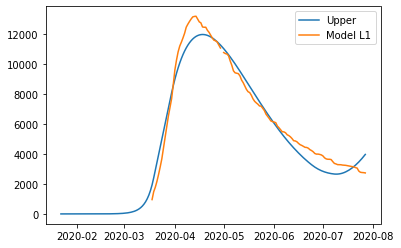

{'home': 0.9961510156903575, 'leisure': 0.8968801660848342, 'other': 0.8787526892469912, 'school': 0.9654174874592997, 'transport': 0.90696832923714, 'work': 0.966658844649393}
{'home': 0.9961510156903575, 'leisure': 0.2092150419250735, 'other': 0.20024594851914373, 'school': 0, 'transport': 0.12854239688676072, 'work': 0.070032001256507}
{'home': 0.9961510156903575, 'leisure': 0.2092150419250735, 'other': 0.20024594851914373, 'school': 0, 'transport': 0.12854239688676072, 'work': 0.070032001256507}
{'home': 0.9961510156903575, 'leisure': 0.32974770223679295, 'other': 0.3700405331504933, 'school': 0.3185877708615689, 'transport': 0.2975437853353519, 'work': 0.17950529449274852}
{'home': 0.9961510156903575, 'leisure': 0.37747068233256237, 'other': 0.48811473299887376, 'school': 0.6468297165977308, 'transport': 0.4386589470910278, 'work': 0.30922638283294024}
{'home': 0.9961510156903575, 'leisure': 0.4564166115503998, 'other': 0.556057335967948, 'school': 0.6468297165977308, 'transport':

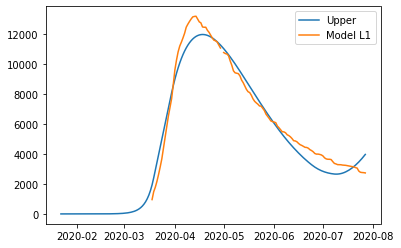

{'home': 0.9961510156903575, 'leisure': 0.8968801660848342, 'other': 0.8787526892469912, 'school': 0.9654174874592997, 'transport': 0.90696832923714, 'work': 0.966658844649393}
{'home': 0.9961510156903575, 'leisure': 0.2092150419250735, 'other': 0.20024594851914373, 'school': 0, 'transport': 0.12854239688676072, 'work': 0.070032001256507}
{'home': 0.9961510156903575, 'leisure': 0.2092150419250735, 'other': 0.20024594851914373, 'school': 0, 'transport': 0.12854239688676072, 'work': 0.070032001256507}
{'home': 0.9961510156903575, 'leisure': 0.32974770223679295, 'other': 0.3700405331504933, 'school': 0.3185877708615689, 'transport': 0.2975437853353519, 'work': 0.17950529449274852}
{'home': 0.9961510156903575, 'leisure': 0.37747068233256237, 'other': 0.48811473299887376, 'school': 0.6468297165977308, 'transport': 0.4386589470910278, 'work': 0.30922638283294024}
{'home': 0.9961510156903575, 'leisure': 0.4564166115503998, 'other': 0.556057335967948, 'school': 0.6468297165977308, 'transport':

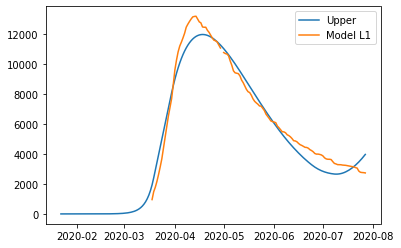

{'home': 0.9961510156903575, 'leisure': 0.8968801660848342, 'other': 0.8787526892469912, 'school': 0.9654174874592997, 'transport': 0.90696832923714, 'work': 0.966658844649393}
{'home': 0.9961510156903575, 'leisure': 0.2092150419250735, 'other': 0.2002459503316357, 'school': 0, 'transport': 0.12854239688676072, 'work': 0.070032001256507}
{'home': 0.9961510156903575, 'leisure': 0.2092150419250735, 'other': 0.2002459503316357, 'school': 0, 'transport': 0.12854239688676072, 'work': 0.070032001256507}
{'home': 0.9961510156903575, 'leisure': 0.32974770223679295, 'other': 0.3700405345094138, 'school': 0.3185877708615689, 'transport': 0.2975437853353519, 'work': 0.17950529449274852}
{'home': 0.9961510156903575, 'leisure': 0.37747068233256237, 'other': 0.4881147340423831, 'school': 0.6468297165977308, 'transport': 0.4386589470910278, 'work': 0.30922638283294024}
{'home': 0.9961510156903575, 'leisure': 0.4564166115503998, 'other': 0.5560573368299626, 'school': 0.6468297165977308, 'transport': 0

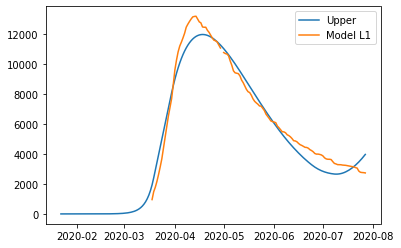

{'home': 0.9961510156903575, 'leisure': 0.8968801660848342, 'other': 0.8787526892469912, 'school': 0.9654174874592997, 'transport': 0.90696832923714, 'work': 0.966658844649393}
{'home': 0.9961510156903575, 'leisure': 0.2092150419250735, 'other': 0.20024594798422765, 'school': 0, 'transport': 0.12854239688676072, 'work': 0.070032001256507}
{'home': 0.9961510156903575, 'leisure': 0.2092150419250735, 'other': 0.20024594798422765, 'school': 0, 'transport': 0.12854239688676072, 'work': 0.070032001256507}
{'home': 0.9961510156903575, 'leisure': 0.32974770223679295, 'other': 0.3700405345094138, 'school': 0.3185877708615689, 'transport': 0.2975437853353519, 'work': 0.17950529449274852}
{'home': 0.9961510156903575, 'leisure': 0.37747068233256237, 'other': 0.4881147340423831, 'school': 0.6468297165977308, 'transport': 0.4386589470910278, 'work': 0.30922638283294024}
{'home': 0.9961510156903575, 'leisure': 0.4564166115503998, 'other': 0.5560573368299626, 'school': 0.6468297165977308, 'transport':

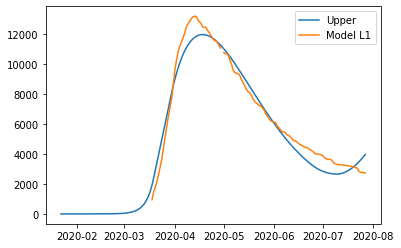

{'home': 0.996153632929933, 'leisure': 0.8968747863501557, 'other': 0.8787494983589476, 'school': 0.9653901213228722, 'transport': 0.906967971247478, 'work': 0.966655763475483}
{'home': 0.996153632929933, 'leisure': 0.20921208826661478, 'other': 0.20024374769812392, 'school': 0, 'transport': 0.12853820822902778, 'work': 0.07002722332025105}
{'home': 0.996153632929933, 'leisure': 0.20921208826661478, 'other': 0.20024374769812392, 'school': 0, 'transport': 0.12853820822902778, 'work': 0.07002722332025105}
{'home': 0.996153632929933, 'leisure': 0.32974063845517676, 'other': 0.3700356022698719, 'school': 0.31857874003654785, 'transport': 0.29753635241881343, 'work': 0.17949705034012098}
{'home': 0.996153632929933, 'leisure': 0.3774582989755059, 'other': 0.48810559523903835, 'school': 0.6468113812863244, 'transport': 0.438647577856336, 'work': 0.3092153227805002}
{'home': 0.996153632929933, 'leisure': 0.45640503644253005, 'other': 0.5560488683985227, 'school': 0.6468113812863244, 'transport

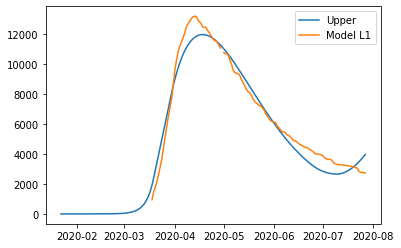

{'home': 0.996153632929933, 'leisure': 0.8968747863501557, 'other': 0.8787494983589476, 'school': 0.9653901213228722, 'transport': 0.906967971247478, 'work': 0.966655763475483}
{'home': 0.996153632929933, 'leisure': 0.20921208826661478, 'other': 0.20024374769812392, 'school': 0, 'transport': 0.12853820822902778, 'work': 0.07002722332025105}
{'home': 0.996153632929933, 'leisure': 0.20921208826661478, 'other': 0.20024374769812392, 'school': 0, 'transport': 0.12853820822902778, 'work': 0.07002722332025105}
{'home': 0.996153632929933, 'leisure': 0.32974063845517676, 'other': 0.3700356022698719, 'school': 0.31857874003654785, 'transport': 0.29753635241881343, 'work': 0.17949705034012098}
{'home': 0.996153632929933, 'leisure': 0.3774582989755059, 'other': 0.48810559523903835, 'school': 0.6468113812863244, 'transport': 0.438647577856336, 'work': 0.3092153227805002}
{'home': 0.996153632929933, 'leisure': 0.45640503644253005, 'other': 0.5560488683985227, 'school': 0.6468113812863244, 'transport

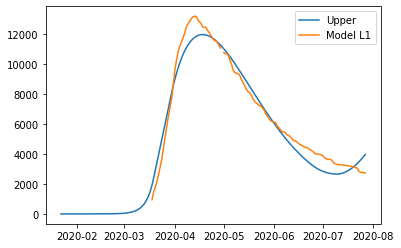

{'home': 0.996153632929933, 'leisure': 0.8968747863501557, 'other': 0.8787494983589476, 'school': 0.9653901213228722, 'transport': 0.906967971247478, 'work': 0.966655763475483}
{'home': 0.996153632929933, 'leisure': 0.20921208826661478, 'other': 0.20024374951060436, 'school': 0, 'transport': 0.12853820822902778, 'work': 0.07002722332025105}
{'home': 0.996153632929933, 'leisure': 0.20921208826661478, 'other': 0.20024374951060436, 'school': 0, 'transport': 0.12853820822902778, 'work': 0.07002722332025105}
{'home': 0.996153632929933, 'leisure': 0.32974063845517676, 'other': 0.3700356036287904, 'school': 0.31857874003654785, 'transport': 0.29753635241881343, 'work': 0.17949705034012098}
{'home': 0.996153632929933, 'leisure': 0.3774582989755059, 'other': 0.48810559628255856, 'school': 0.6468113812863244, 'transport': 0.438647577856336, 'work': 0.3092153227805002}
{'home': 0.996153632929933, 'leisure': 0.45640503644253005, 'other': 0.5560488692605471, 'school': 0.6468113812863244, 'transport

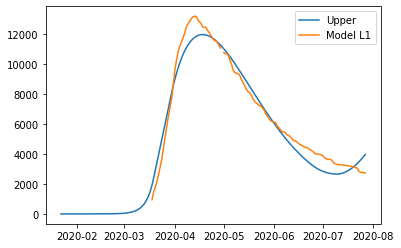

{'home': 0.996153632929933, 'leisure': 0.8968747863501557, 'other': 0.8787494983589476, 'school': 0.9653901213228722, 'transport': 0.906967971247478, 'work': 0.966655763475483}
{'home': 0.996153632929933, 'leisure': 0.20921208826661478, 'other': 0.20024374716321633, 'school': 0, 'transport': 0.12853820822902778, 'work': 0.07002722332025105}
{'home': 0.996153632929933, 'leisure': 0.20921208826661478, 'other': 0.20024374716321633, 'school': 0, 'transport': 0.12853820822902778, 'work': 0.07002722332025105}
{'home': 0.996153632929933, 'leisure': 0.32974063845517676, 'other': 0.3700356036287904, 'school': 0.31857874003654785, 'transport': 0.29753635241881343, 'work': 0.17949705034012098}
{'home': 0.996153632929933, 'leisure': 0.3774582989755059, 'other': 0.48810559628255856, 'school': 0.6468113812863244, 'transport': 0.438647577856336, 'work': 0.3092153227805002}
{'home': 0.996153632929933, 'leisure': 0.45640503644253005, 'other': 0.5560488692605471, 'school': 0.6468113812863244, 'transport

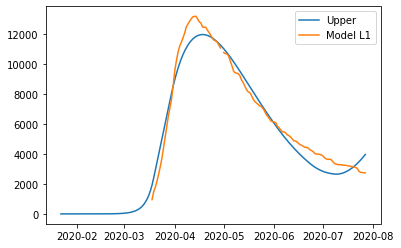

{'home': 0.9961542866612789, 'leisure': 0.896873442605691, 'other': 0.8787487013422911, 'school': 0.9653832858381239, 'transport': 0.906967881829197, 'work': 0.9666549938631073}
{'home': 0.9961542866612789, 'leisure': 0.20921135051213463, 'other': 0.20024319798329251, 'school': 0, 'transport': 0.12853716199538892, 'work': 0.07002602988360548}
{'home': 0.9961542866612789, 'leisure': 0.20921135051213463, 'other': 0.20024319798329251, 'school': 0, 'transport': 0.12853716199538892, 'work': 0.07002602988360548}
{'home': 0.9961542866612789, 'leisure': 0.32973887409285774, 'other': 0.3700343706492578, 'school': 0.3185764843265809, 'transport': 0.297534495841373, 'work': 0.17949499110960548}
{'home': 0.9961542866612789, 'leisure': 0.37745520591662696, 'other': 0.48810331283862807, 'school': 0.6468068015115431, 'transport': 0.43864473807406795, 'work': 0.3092125601928747}
{'home': 0.9961542866612789, 'leisure': 0.4564021452618341, 'other': 0.5560467533951248, 'school': 0.6468068015115431, 'tran

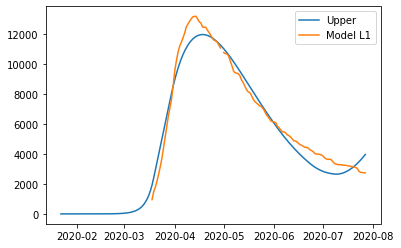

{'home': 0.9961542866612789, 'leisure': 0.896873442605691, 'other': 0.8787487013422911, 'school': 0.9653832858381239, 'transport': 0.906967881829197, 'work': 0.9666549938631073}
{'home': 0.9961542866612789, 'leisure': 0.20921135051213463, 'other': 0.20024319798329251, 'school': 0, 'transport': 0.12853716199538892, 'work': 0.07002602988360548}
{'home': 0.9961542866612789, 'leisure': 0.20921135051213463, 'other': 0.20024319798329251, 'school': 0, 'transport': 0.12853716199538892, 'work': 0.07002602988360548}
{'home': 0.9961542866612789, 'leisure': 0.32973887409285774, 'other': 0.3700343706492578, 'school': 0.3185764843265809, 'transport': 0.297534495841373, 'work': 0.17949499110960548}
{'home': 0.9961542866612789, 'leisure': 0.37745520591662696, 'other': 0.48810331283862807, 'school': 0.6468068015115431, 'transport': 0.43864473807406795, 'work': 0.3092125601928747}
{'home': 0.9961542866612789, 'leisure': 0.4564021452618341, 'other': 0.5560467533951248, 'school': 0.6468068015115431, 'tran

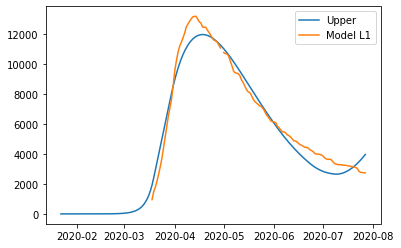

{'home': 0.9961542866612789, 'leisure': 0.896873442605691, 'other': 0.8787487013422911, 'school': 0.9653832858381239, 'transport': 0.906967881829197, 'work': 0.9666549938631073}
{'home': 0.9961542866612789, 'leisure': 0.20921135051213463, 'other': 0.20024319798329251, 'school': 0, 'transport': 0.12853716199538892, 'work': 0.07002602988360548}
{'home': 0.9961542866612789, 'leisure': 0.20921135051213463, 'other': 0.20024319798329251, 'school': 0, 'transport': 0.12853716199538892, 'work': 0.07002602988360548}
{'home': 0.9961542866612789, 'leisure': 0.32973887409285774, 'other': 0.3700343706492578, 'school': 0.3185764843265809, 'transport': 0.297534495841373, 'work': 0.17949499110960548}
{'home': 0.9961542866612789, 'leisure': 0.37745520591662696, 'other': 0.48810331283862807, 'school': 0.6468068015115431, 'transport': 0.43864473807406795, 'work': 0.3092125601928747}
{'home': 0.9961542866612789, 'leisure': 0.4564021452618341, 'other': 0.5560467533951248, 'school': 0.6468068015115431, 'tran

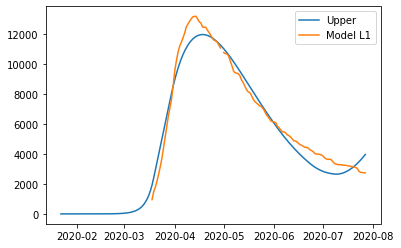

{'home': 0.9961542866612789, 'leisure': 0.896873442605691, 'other': 0.8787487013422911, 'school': 0.9653832858381239, 'transport': 0.906967881829197, 'work': 0.9666549938631073}
{'home': 0.9961542866612789, 'leisure': 0.20921135051213463, 'other': 0.20024319979577007, 'school': 0, 'transport': 0.12853716199538892, 'work': 0.07002602988360548}
{'home': 0.9961542866612789, 'leisure': 0.20921135051213463, 'other': 0.20024319979577007, 'school': 0, 'transport': 0.12853716199538892, 'work': 0.07002602988360548}
{'home': 0.9961542866612789, 'leisure': 0.32973887409285774, 'other': 0.3700343720081758, 'school': 0.3185764843265809, 'transport': 0.297534495841373, 'work': 0.17949499110960548}
{'home': 0.9961542866612789, 'leisure': 0.37745520591662696, 'other': 0.488103313882151, 'school': 0.6468068015115431, 'transport': 0.43864473807406795, 'work': 0.3092125601928747}
{'home': 0.9961542866612789, 'leisure': 0.4564021452618341, 'other': 0.5560467542571519, 'school': 0.6468068015115431, 'transp

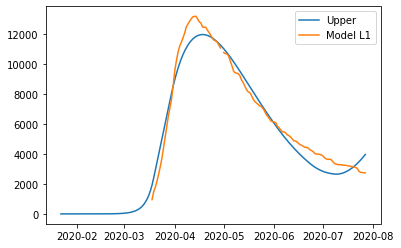

{'home': 0.9961542866612789, 'leisure': 0.896873442605691, 'other': 0.8787487013422911, 'school': 0.9653832858381239, 'transport': 0.906967881829197, 'work': 0.9666549938631073}
{'home': 0.9961542866612789, 'leisure': 0.20921135051213463, 'other': 0.20024319744838706, 'school': 0, 'transport': 0.12853716199538892, 'work': 0.07002602988360548}
{'home': 0.9961542866612789, 'leisure': 0.20921135051213463, 'other': 0.20024319744838706, 'school': 0, 'transport': 0.12853716199538892, 'work': 0.07002602988360548}
{'home': 0.9961542866612789, 'leisure': 0.32973887409285774, 'other': 0.3700343720081758, 'school': 0.3185764843265809, 'transport': 0.297534495841373, 'work': 0.17949499110960548}
{'home': 0.9961542866612789, 'leisure': 0.37745520591662696, 'other': 0.488103313882151, 'school': 0.6468068015115431, 'transport': 0.43864473807406795, 'work': 0.3092125601928747}
{'home': 0.9961542866612789, 'leisure': 0.4564021452618341, 'other': 0.5560467542571519, 'school': 0.6468068015115431, 'transp

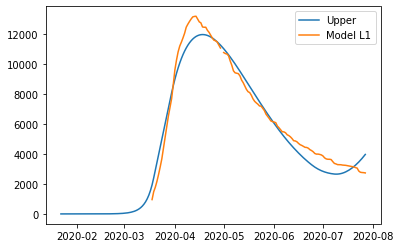

{'home': 0.9961544561199005, 'leisure': 0.8968729913759913, 'other': 0.878748458264309, 'school': 0.9653809815724504, 'transport': 0.9069678498966722, 'work': 0.9666547388962659}
{'home': 0.9961544561199005, 'leisure': 0.20921110504441326, 'other': 0.20024302250965817, 'school': 0, 'transport': 0.12853681624999566, 'work': 0.07002563563929819}
{'home': 0.9961544561199005, 'leisure': 0.20921110504441326, 'other': 0.20024302250965817, 'school': 0, 'transport': 0.12853681624999566, 'work': 0.07002563563929819}
{'home': 0.9961544561199005, 'leisure': 0.3297382887248208, 'other': 0.37003397536525173, 'school': 0.31857572391890865, 'transport': 0.2975338821411153, 'work': 0.17949431081153686}
{'home': 0.9961544561199005, 'leisure': 0.37745418117002405, 'other': 0.4881025736530826, 'school': 0.6468052576535418, 'transport': 0.43864379933125824, 'work': 0.3092116474358865}
{'home': 0.9961544561199005, 'leisure': 0.45640118605109214, 'other': 0.5560460702462722, 'school': 0.6468052576535418, 't

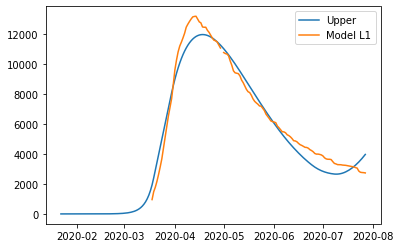

{'home': 0.9961544561199005, 'leisure': 0.8968729913759913, 'other': 0.878748458264309, 'school': 0.9653809815724504, 'transport': 0.9069678498966722, 'work': 0.9666547388962659}
{'home': 0.9961544561199005, 'leisure': 0.20921110504441326, 'other': 0.20024302250965817, 'school': 0, 'transport': 0.12853681624999566, 'work': 0.07002563563929819}
{'home': 0.9961544561199005, 'leisure': 0.20921110504441326, 'other': 0.20024302250965817, 'school': 0, 'transport': 0.12853681624999566, 'work': 0.07002563563929819}
{'home': 0.9961544561199005, 'leisure': 0.3297382887248208, 'other': 0.37003397536525173, 'school': 0.31857572391890865, 'transport': 0.2975338821411153, 'work': 0.17949431081153686}
{'home': 0.9961544561199005, 'leisure': 0.37745418117002405, 'other': 0.4881025736530826, 'school': 0.6468052576535418, 'transport': 0.43864379933125824, 'work': 0.3092116474358865}
{'home': 0.9961544561199005, 'leisure': 0.45640118605109214, 'other': 0.5560460702462722, 'school': 0.6468052576535418, 't

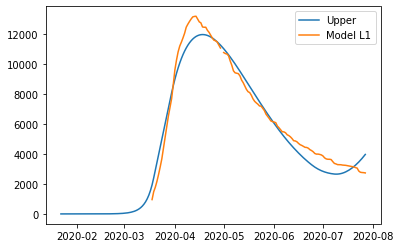

{'home': 0.9961544561199005, 'leisure': 0.8968729913759913, 'other': 0.878748458264309, 'school': 0.9653809815724504, 'transport': 0.9069678498966722, 'work': 0.9666547388962659}
{'home': 0.9961544561199005, 'leisure': 0.20921110504441326, 'other': 0.20024302250965817, 'school': 0, 'transport': 0.12853681624999566, 'work': 0.07002563563929819}
{'home': 0.9961544561199005, 'leisure': 0.20921110504441326, 'other': 0.20024302250965817, 'school': 0, 'transport': 0.12853681624999566, 'work': 0.07002563563929819}
{'home': 0.9961544561199005, 'leisure': 0.3297382887248208, 'other': 0.37003397536525173, 'school': 0.31857572391890865, 'transport': 0.2975338821411153, 'work': 0.17949431081153686}
{'home': 0.9961544561199005, 'leisure': 0.37745418117002405, 'other': 0.4881025736530826, 'school': 0.6468052576535418, 'transport': 0.43864379933125824, 'work': 0.3092116474358865}
{'home': 0.9961544561199005, 'leisure': 0.45640118605109214, 'other': 0.5560460702462722, 'school': 0.6468052576535418, 't

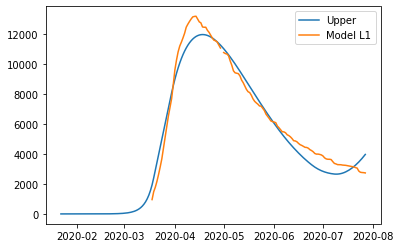

{'home': 0.9961544561199005, 'leisure': 0.8968729913759913, 'other': 0.878748458264309, 'school': 0.9653809815724504, 'transport': 0.9069678498966722, 'work': 0.9666547388962659}
{'home': 0.9961544561199005, 'leisure': 0.20921110504441326, 'other': 0.20024302432213484, 'school': 0, 'transport': 0.12853681624999566, 'work': 0.07002563563929819}
{'home': 0.9961544561199005, 'leisure': 0.20921110504441326, 'other': 0.20024302432213484, 'school': 0, 'transport': 0.12853681624999566, 'work': 0.07002563563929819}
{'home': 0.9961544561199005, 'leisure': 0.3297382887248208, 'other': 0.37003397672416954, 'school': 0.31857572391890865, 'transport': 0.2975338821411153, 'work': 0.17949431081153686}
{'home': 0.9961544561199005, 'leisure': 0.37745418117002405, 'other': 0.4881025746966064, 'school': 0.6468052576535418, 'transport': 0.43864379933125824, 'work': 0.3092116474358865}
{'home': 0.9961544561199005, 'leisure': 0.45640118605109214, 'other': 0.5560460711083, 'school': 0.6468052576535418, 'tran

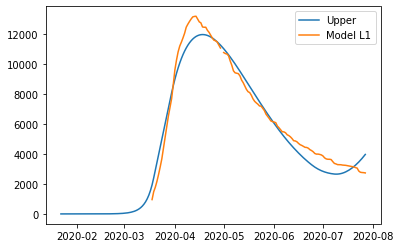

{'home': 0.9961544561199005, 'leisure': 0.8968729913759913, 'other': 0.878748458264309, 'school': 0.9653809815724504, 'transport': 0.9069678498966722, 'work': 0.9666547388962659}
{'home': 0.9961544561199005, 'leisure': 0.20921110504441326, 'other': 0.2002430219747534, 'school': 0, 'transport': 0.12853681624999566, 'work': 0.07002563563929819}
{'home': 0.9961544561199005, 'leisure': 0.20921110504441326, 'other': 0.2002430219747534, 'school': 0, 'transport': 0.12853681624999566, 'work': 0.07002563563929819}
{'home': 0.9961544561199005, 'leisure': 0.3297382887248208, 'other': 0.37003397672416954, 'school': 0.31857572391890865, 'transport': 0.2975338821411153, 'work': 0.17949431081153686}
{'home': 0.9961544561199005, 'leisure': 0.37745418117002405, 'other': 0.4881025746966064, 'school': 0.6468052576535418, 'transport': 0.43864379933125824, 'work': 0.3092116474358865}
{'home': 0.9961544561199005, 'leisure': 0.45640118605109214, 'other': 0.5560460711083, 'school': 0.6468052576535418, 'transp

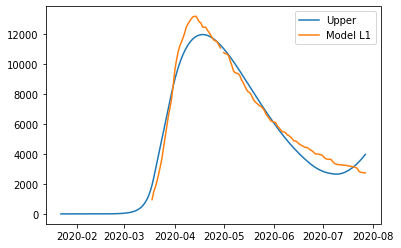

{'home': 0.9961545326100573, 'leisure': 0.8968727877001311, 'other': 0.8787483485438781, 'school': 0.9653799414740406, 'transport': 0.9069678354829834, 'work': 0.966654623809447}
{'home': 0.9961545326100573, 'leisure': 0.209210994245407, 'other': 0.20024294330450096, 'school': 0, 'transport': 0.12853666018766485, 'work': 0.07002545768535397}
{'home': 0.9961545326100573, 'leisure': 0.209210994245407, 'other': 0.20024294330450096, 'school': 0, 'transport': 0.12853666018766485, 'work': 0.07002545768535397}
{'home': 0.9961545326100573, 'leisure': 0.3297380245019693, 'other': 0.37003379694226396, 'school': 0.31857538068643343, 'transport': 0.2975336051294915, 'work': 0.17949400373868818}
{'home': 0.9961545326100573, 'leisure': 0.37745371862098015, 'other': 0.48810224000011004, 'school': 0.6468045607876073, 'transport': 0.4386433756021387, 'work': 0.3092112354357686}
{'home': 0.9961545326100573, 'leisure': 0.4564007530835177, 'other': 0.5560457618870835, 'school': 0.6468045607876073, 'transp

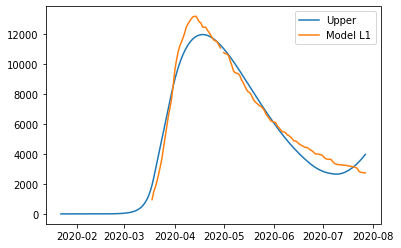

{'home': 0.9961545326100573, 'leisure': 0.8968727877001311, 'other': 0.8787483485438781, 'school': 0.9653799414740406, 'transport': 0.9069678354829834, 'work': 0.966654623809447}
{'home': 0.9961545326100573, 'leisure': 0.209210994245407, 'other': 0.20024294330450096, 'school': 0, 'transport': 0.12853666018766485, 'work': 0.07002545768535397}
{'home': 0.9961545326100573, 'leisure': 0.209210994245407, 'other': 0.20024294330450096, 'school': 0, 'transport': 0.12853666018766485, 'work': 0.07002545768535397}
{'home': 0.9961545326100573, 'leisure': 0.3297380245019693, 'other': 0.37003379694226396, 'school': 0.31857538068643343, 'transport': 0.2975336051294915, 'work': 0.17949400373868818}
{'home': 0.9961545326100573, 'leisure': 0.37745371862098015, 'other': 0.48810224000011004, 'school': 0.6468045607876073, 'transport': 0.4386433756021387, 'work': 0.3092112354357686}
{'home': 0.9961545326100573, 'leisure': 0.4564007530835177, 'other': 0.5560457618870835, 'school': 0.6468045607876073, 'transp

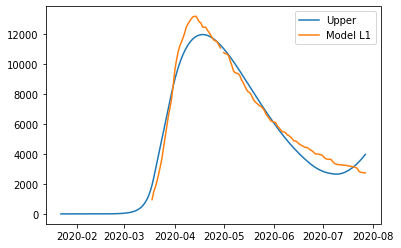

{'home': 0.9961545326100573, 'leisure': 0.8968727877001311, 'other': 0.8787483485438781, 'school': 0.9653799414740406, 'transport': 0.9069678354829834, 'work': 0.966654623809447}
{'home': 0.9961545326100573, 'leisure': 0.209210994245407, 'other': 0.2002429451169772, 'school': 0, 'transport': 0.12853666018766485, 'work': 0.07002545768535397}
{'home': 0.9961545326100573, 'leisure': 0.209210994245407, 'other': 0.2002429451169772, 'school': 0, 'transport': 0.12853666018766485, 'work': 0.07002545768535397}
{'home': 0.9961545326100573, 'leisure': 0.3297380245019693, 'other': 0.37003379830118177, 'school': 0.31857538068643343, 'transport': 0.2975336051294915, 'work': 0.17949400373868818}
{'home': 0.9961545326100573, 'leisure': 0.37745371862098015, 'other': 0.4881022410436343, 'school': 0.6468045607876073, 'transport': 0.4386433756021387, 'work': 0.3092112354357686}
{'home': 0.9961545326100573, 'leisure': 0.4564007530835177, 'other': 0.5560457627491119, 'school': 0.6468045607876073, 'transport

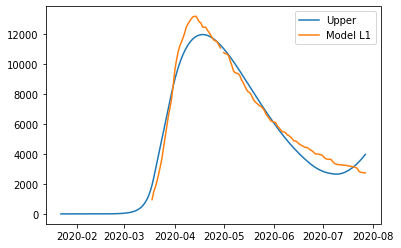

{'home': 0.9961545326100573, 'leisure': 0.8968727877001311, 'other': 0.8787483485438781, 'school': 0.9653799414740406, 'transport': 0.9069678354829834, 'work': 0.966654623809447}
{'home': 0.9961545326100573, 'leisure': 0.209210994245407, 'other': 0.2002429427695965, 'school': 0, 'transport': 0.12853666018766485, 'work': 0.07002545768535397}
{'home': 0.9961545326100573, 'leisure': 0.209210994245407, 'other': 0.2002429427695965, 'school': 0, 'transport': 0.12853666018766485, 'work': 0.07002545768535397}
{'home': 0.9961545326100573, 'leisure': 0.3297380245019693, 'other': 0.37003379830118177, 'school': 0.31857538068643343, 'transport': 0.2975336051294915, 'work': 0.17949400373868818}
{'home': 0.9961545326100573, 'leisure': 0.37745371862098015, 'other': 0.4881022410436343, 'school': 0.6468045607876073, 'transport': 0.4386433756021387, 'work': 0.3092112354357686}
{'home': 0.9961545326100573, 'leisure': 0.4564007530835177, 'other': 0.5560457627491119, 'school': 0.6468045607876073, 'transport

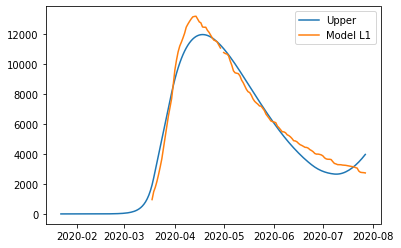

{'home': 0.9961545684684084, 'leisure': 0.896872692217512, 'other': 0.8787482971072763, 'school': 0.9653794538790933, 'transport': 0.9069678287258903, 'work': 0.966654569857099}
{'home': 0.9961545684684084, 'leisure': 0.20921094230319467, 'other': 0.20024290617337737, 'school': 0, 'transport': 0.1285365870261375, 'work': 0.07002537426106348}
{'home': 0.9961545684684084, 'leisure': 0.20921094230319467, 'other': 0.20024290617337737, 'school': 0, 'transport': 0.1285365870261375, 'work': 0.07002537426106348}
{'home': 0.9961545684684084, 'leisure': 0.3297379006351729, 'other': 0.37003371329814194, 'school': 0.3185752197801008, 'transport': 0.29753347526731777, 'work': 0.1794938597838326}
{'home': 0.9961545684684084, 'leisure': 0.37745350177953846, 'other': 0.4881020835846766, 'school': 0.6468042340989926, 'transport': 0.4386431769592665, 'work': 0.30921104229131674}
{'home': 0.9961545684684084, 'leisure': 0.4564005501097615, 'other': 0.5560456173292915, 'school': 0.6468042340989926, 'transp

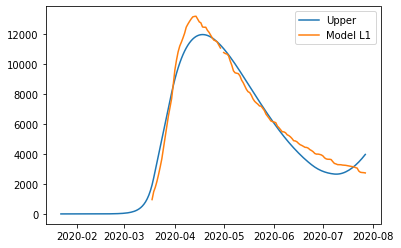

{'home': 0.9961545684684084, 'leisure': 0.896872692217512, 'other': 0.8787482971072763, 'school': 0.9653794538790933, 'transport': 0.9069678287258903, 'work': 0.966654569857099}
{'home': 0.9961545684684084, 'leisure': 0.20921094230319467, 'other': 0.20024290617337737, 'school': 0, 'transport': 0.1285365870261375, 'work': 0.07002537426106348}
{'home': 0.9961545684684084, 'leisure': 0.20921094230319467, 'other': 0.20024290617337737, 'school': 0, 'transport': 0.1285365870261375, 'work': 0.07002537426106348}
{'home': 0.9961545684684084, 'leisure': 0.3297379006351729, 'other': 0.37003371329814194, 'school': 0.3185752197801008, 'transport': 0.29753347526731777, 'work': 0.1794938597838326}
{'home': 0.9961545684684084, 'leisure': 0.37745350177953846, 'other': 0.4881020835846766, 'school': 0.6468042340989926, 'transport': 0.4386431769592665, 'work': 0.30921104229131674}
{'home': 0.9961545684684084, 'leisure': 0.4564005501097615, 'other': 0.5560456173292915, 'school': 0.6468042340989926, 'transp

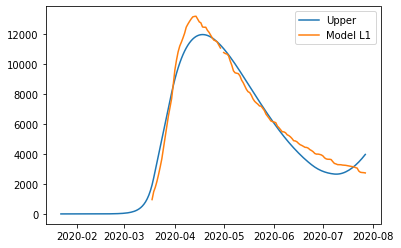

{'home': 0.9961545684684084, 'leisure': 0.896872692217512, 'other': 0.8787482971072763, 'school': 0.9653794538790933, 'transport': 0.9069678287258903, 'work': 0.966654569857099}
{'home': 0.9961545684684084, 'leisure': 0.20921094230319467, 'other': 0.2002429079858534, 'school': 0, 'transport': 0.1285365870261375, 'work': 0.07002537426106348}
{'home': 0.9961545684684084, 'leisure': 0.20921094230319467, 'other': 0.2002429079858534, 'school': 0, 'transport': 0.1285365870261375, 'work': 0.07002537426106348}
{'home': 0.9961545684684084, 'leisure': 0.3297379006351729, 'other': 0.3700337146570596, 'school': 0.3185752197801008, 'transport': 0.29753347526731777, 'work': 0.1794938597838326}
{'home': 0.9961545684684084, 'leisure': 0.37745350177953846, 'other': 0.4881020846282009, 'school': 0.6468042340989926, 'transport': 0.4386431769592665, 'work': 0.30921104229131674}
{'home': 0.9961545684684084, 'leisure': 0.4564005501097615, 'other': 0.5560456181913198, 'school': 0.6468042340989926, 'transport

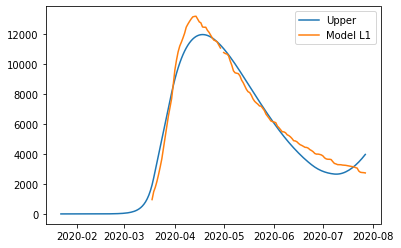

{'home': 0.9961545684684084, 'leisure': 0.896872692217512, 'other': 0.8787482971072763, 'school': 0.9653794538790933, 'transport': 0.9069678287258903, 'work': 0.966654569857099}
{'home': 0.9961545684684084, 'leisure': 0.20921094230319467, 'other': 0.20024290563847305, 'school': 0, 'transport': 0.1285365870261375, 'work': 0.07002537426106348}
{'home': 0.9961545684684084, 'leisure': 0.20921094230319467, 'other': 0.20024290563847305, 'school': 0, 'transport': 0.1285365870261375, 'work': 0.07002537426106348}
{'home': 0.9961545684684084, 'leisure': 0.3297379006351729, 'other': 0.3700337146570596, 'school': 0.3185752197801008, 'transport': 0.29753347526731777, 'work': 0.1794938597838326}
{'home': 0.9961545684684084, 'leisure': 0.37745350177953846, 'other': 0.4881020846282009, 'school': 0.6468042340989926, 'transport': 0.4386431769592665, 'work': 0.30921104229131674}
{'home': 0.9961545684684084, 'leisure': 0.4564005501097615, 'other': 0.5560456181913198, 'school': 0.6468042340989926, 'transpo

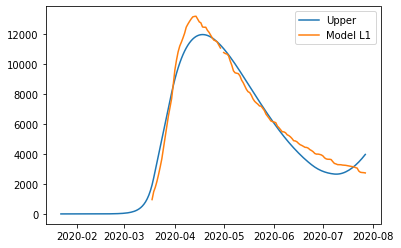

{'home': 0.9961545694227548, 'leisure': 0.8968726896703776, 'other': 0.8787482957488181, 'school': 0.9653794409056793, 'transport': 0.906967828551697, 'work': 0.9666545684200022}
{'home': 0.9961545694227548, 'leisure': 0.20921094091512238, 'other': 0.2002429051831677, 'school': 0, 'transport': 0.12853658507008103, 'work': 0.0700253720303663}
{'home': 0.9961545694227548, 'leisure': 0.20921094091512238, 'other': 0.2002429051831677, 'school': 0, 'transport': 0.12853658507008103, 'work': 0.0700253720303663}
{'home': 0.9961545694227548, 'leisure': 0.3297378973238531, 'other': 0.37003371106610833, 'school': 0.3185752154988742, 'transport': 0.29753347179582756, 'work': 0.1794938559350233}
{'home': 0.9961545694227548, 'leisure': 0.37745349598193456, 'other': 0.48810207940859496, 'school': 0.6468042254068052, 'transport': 0.438643171649092, 'work': 0.30921103712790815}
{'home': 0.9961545694227548, 'leisure': 0.4564005446842782, 'other': 0.5560456134731823, 'school': 0.6468042254068052, 'transpo

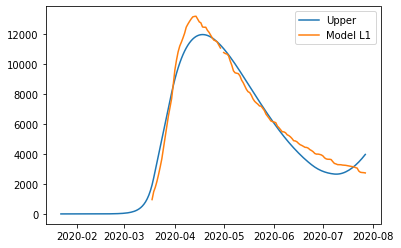

{'home': 0.9961545694227548, 'leisure': 0.8968726896703776, 'other': 0.8787482957488181, 'school': 0.9653794409056793, 'transport': 0.906967828551697, 'work': 0.9666545684200022}
{'home': 0.9961545694227548, 'leisure': 0.20921094091512238, 'other': 0.2002429051831677, 'school': 0, 'transport': 0.12853658507008103, 'work': 0.0700253720303663}
{'home': 0.9961545694227548, 'leisure': 0.20921094091512238, 'other': 0.2002429051831677, 'school': 0, 'transport': 0.12853658507008103, 'work': 0.0700253720303663}
{'home': 0.9961545694227548, 'leisure': 0.3297378973238531, 'other': 0.37003371106610833, 'school': 0.3185752154988742, 'transport': 0.29753347179582756, 'work': 0.1794938559350233}
{'home': 0.9961545694227548, 'leisure': 0.37745349598193456, 'other': 0.48810207940859496, 'school': 0.6468042254068052, 'transport': 0.438643171649092, 'work': 0.30921103712790815}
{'home': 0.9961545694227548, 'leisure': 0.4564005446842782, 'other': 0.5560456134731823, 'school': 0.6468042254068052, 'transpo

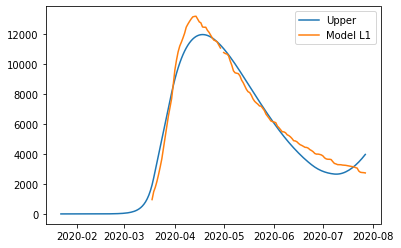

{'home': 0.9961545794227549, 'leisure': 0.8968726896703776, 'other': 0.8787482957488181, 'school': 0.9653794409056793, 'transport': 0.906967828551697, 'work': 0.9666545684200022}
{'home': 0.9961545794227549, 'leisure': 0.20921094091512238, 'other': 0.2002429051831677, 'school': 0, 'transport': 0.12853658507008103, 'work': 0.0700253720303663}
{'home': 0.9961545794227549, 'leisure': 0.20921094091512238, 'other': 0.2002429051831677, 'school': 0, 'transport': 0.12853658507008103, 'work': 0.0700253720303663}
{'home': 0.9961545794227549, 'leisure': 0.3297378973238531, 'other': 0.37003371106610833, 'school': 0.3185752154988742, 'transport': 0.29753347179582756, 'work': 0.1794938559350233}
{'home': 0.9961545794227549, 'leisure': 0.37745349598193456, 'other': 0.48810207940859496, 'school': 0.6468042254068052, 'transport': 0.438643171649092, 'work': 0.30921103712790815}
{'home': 0.9961545794227549, 'leisure': 0.4564005446842782, 'other': 0.5560456134731823, 'school': 0.6468042254068052, 'transpo

In [31]:
from scipy.optimize import minimize, Bounds, shgo, differential_evolution

bounds = Bounds(lb,ub)

result = minimize(error, v0, bounds = bounds)

In [32]:
best_v

array([55.76574406,  1.67438361,  3.54751353,  1.81829588,  0.29775115,
       10.16456894,  0.99615458,  0.89687269,  0.8787483 ,  0.96537944,
        0.96665457,  0.90696783,  0.97371304,  0.56095857,  0.22207873,
        0.36743667,  0.57386786,  0.94824818,  0.52793675,  0.8530484 ,
        0.72332039,  0.50297928,  0.28944408,  0.83974079,  0.19482276,
        0.34017182,  0.27339658,  0.42739236,  0.50644834,  0.31035431,
        0.80520744,  0.58609923,  0.86516311,  0.48232211,  0.6341458 ,
        0.52950161,  0.58770836,  0.49053886,  0.43910603,  0.2399934 ])

In [70]:
best_v = [55.76574406,  1.67438361,  3.54751353,  1.81829588,  0.29775115,
       10.16456894,  0.99615458,  0.89687269,  0.8787483 ,  0.96537944,
        0.96665457,  0.90696783,  0.97371304,  0.56095857,  0.22207873,
        0.36743667,  0.57386786,  0.94824818,  0.52793675,  0.8530484 ,
        0.72332039,  0.50297928,  0.28944408,  0.83974079,  0.19482276,
        0.34017182,  0.27339658,  0.42739236,  0.50644834,  0.31035431,
        0.80520744,  0.58609923,  0.86516311,  0.48232211,  0.6341458 ,
        0.52950161,  0.58770836,  0.49053886,  0.43910603,  0.2399934 ]

In [22]:
import copy
import math
def plot_model(v, days_diff, gamma_mult, alphas_mult):

    days_ahead = v[0]+days_diff
    alpha_mixing = v[1]
    beta_mixing = v[2]
    gamma_mixing_before = v[3]*gamma_mult
    gamma_mixing_after = v[3]*(1-v[4])*gamma_mult
    gamma_change = v[5] + v[0]


    upper_bound_home = v[6]
    upper_bound_leisure = v[7]
    upper_bound_other = v[8]
    upper_bound_school = v[9]
    upper_bound_work = v[10]
    upper_bound_transport = v[11]
    
    leisure_v = v[12:29]
    leisure_1 = leisure_v[0]
    leisure_2 = leisure_v[1]
    leisure_3 = leisure_v[2]
    leisure_4 = leisure_v[3]
    leisure_5 = leisure_v[4]
    leisure_6 = leisure_v[5]
    leisure_7 = leisure_v[6]
    leisure_denom = leisure_1+leisure_2+leisure_3+leisure_4+leisure_5+leisure_6+leisure_7

    other_v = v[19:26]
    other_1 = other_v[0]
    other_2 = other_v[1]
    other_3 = other_v[2]
    other_4 = other_v[3]
    other_5 = other_v[4]
    other_6 = other_v[5]
    other_7 = other_v[6]
    other_denom = other_1+other_2+other_3+other_4+other_5+other_6+other_7

    work_v = v[26:33]
    work_1 = work_v[0]
    work_2 = work_v[1]
    work_3 = work_v[2]
    work_4 = work_v[3]
    work_5 = work_v[4]
    work_6 = work_v[5]
    work_7 = work_v[6]
    work_denom = work_1+work_2+work_3+work_4+work_5+work_6+work_7
    
    transport_v = v[33:40]
    transport_1 = transport_v[0]
    transport_2 = transport_v[1]
    transport_3 = transport_v[2]
    transport_4 = transport_v[3]
    transport_5 = transport_v[4]
    transport_6 = transport_v[5]
    transport_7 = transport_v[6]
    transport_denom = transport_1+transport_2+transport_3+transport_4+transport_5+transport_6+transport_7


    # Construct initialization
    initialization = copy.deepcopy(original_initialization)
    for i,group in enumerate(age_groups):
        if group == "age_group_40_49":
            initialization[group]["I"] = initialization[group]["I"] + 1
            initialization[group]["S"] = initialization[group]["S"] - 1
        initialization[group]["N"] = initialization[group]["S"] + initialization[group]["E"] + initialization[group]["I"] + initialization[group]["R"]


    # Alphas
    a_before_date_1 = {
        'home':upper_bound_home*alphas_mult,
        'leisure':upper_bound_leisure*alphas_mult,
        'other':upper_bound_other*alphas_mult,
        'school':upper_bound_school*alphas_mult,
        'transport':delta_transport*upper_bound_work*alphas_mult,
        'work':upper_bound_work*alphas_mult
    }
    a_between_date_1_2 = {
        'home':upper_bound_home*alphas_mult,
        'leisure':leisure_1/leisure_denom*upper_bound_leisure*alphas_mult,
        'other':other_1/other_denom*upper_bound_other*alphas_mult,
        'school':0,
        'transport':delta_transport*work_1/work_denom*upper_bound_work*alphas_mult,
        'work':work_1/work_denom*upper_bound_work*alphas_mult
    }
    a_between_date_2_3 = {
        'home':upper_bound_home*alphas_mult,
        'leisure':leisure_1/leisure_denom*upper_bound_leisure*alphas_mult,
        'other':other_1/other_denom*upper_bound_other*alphas_mult,
        'school':0,
        'transport':delta_transport*work_1/work_denom*upper_bound_work*alphas_mult,
        'work':work_1/work_denom*upper_bound_work*alphas_mult
    }
    a_between_date_3_4 = {
        'home':upper_bound_home*alphas_mult,
        'leisure':(leisure_1+leisure_2)/leisure_denom*upper_bound_leisure*alphas_mult,
        'other':(other_1+other_2)/other_denom*upper_bound_other*alphas_mult,
        'school':0.33*delta_school*upper_bound_school*alphas_mult,
        'transport':delta_transport*(work_1+work_2)/work_denom*upper_bound_work*alphas_mult,
        'work':(work_1+work_2)/work_denom*upper_bound_work*alphas_mult
    }
    a_between_date_4_5 = {
        'home':upper_bound_home*alphas_mult,
        'leisure':(leisure_1+leisure_2+leisure_3)/leisure_denom*upper_bound_leisure*alphas_mult,
        'other':(other_1+other_2+other_3)/other_denom*upper_bound_other*alphas_mult,
        'school':0.67*delta_school*upper_bound_school*alphas_mult,
        'transport':delta_transport*(work_1+work_2+work_3)/work_denom*upper_bound_work*alphas_mult,
        'work':(work_1+work_2+work_3)/work_denom*upper_bound_work*alphas_mult
    }
    a_between_date_5_6 = {
        'home':upper_bound_home*alphas_mult,
        'leisure':(leisure_1+leisure_2+leisure_3+leisure_4)/leisure_denom*upper_bound_leisure*alphas_mult,
        'other':(other_1+other_2+other_3+other_4)/other_denom*upper_bound_other*alphas_mult,
        'school':0.67*delta_school*upper_bound_school*alphas_mult,
        'transport':delta_transport*(work_1+work_2+work_3+work_4)/work_denom*upper_bound_work*alphas_mult,
        'work':(work_1+work_2+work_3+work_4)/work_denom*upper_bound_work*alphas_mult
    }
    a_between_date_6_7 = {
        'home':upper_bound_home*alphas_mult,
        'leisure':(leisure_1+leisure_2+leisure_3+leisure_4+leisure_5)/leisure_denom*upper_bound_leisure*alphas_mult,
        'other':(other_1+other_2+other_3+other_4+other_5)/other_denom*upper_bound_other*alphas_mult,
        'school':1.0*delta_school*upper_bound_school*alphas_mult,
        'transport':delta_transport*(work_1+work_2+work_3+work_4+work_5)/work_denom*upper_bound_work*alphas_mult,
        'work':(work_1+work_2+work_3+work_4+work_5)/work_denom*upper_bound_work*alphas_mult
    }
    a_after_date_7 = {
        'home':upper_bound_home*alphas_mult,
        'leisure':(leisure_1+leisure_2+leisure_3+leisure_4+leisure_5+leisure_6)/leisure_denom*upper_bound_leisure*alphas_mult,
        'other':(other_1+other_2+other_3+other_4+other_5+other_6)/other_denom*upper_bound_other*alphas_mult,
        'school':1.0*delta_school*upper_bound_school*alphas_mult,
        'transport':delta_transport*(work_1+work_2+work_3+work_4+work_5+work_6)/work_denom*upper_bound_work*alphas_mult,
        'work':(work_1+work_2+work_3+work_4+work_5+work_6)/work_denom*upper_bound_work*alphas_mult
    }

    # Determine mixing method
    mixing_method_before = {
        "name":"mult",
        "param_alpha":alpha_mixing,
        "param_beta":beta_mixing,
        "fixed_gamma":gamma_mixing_before,
    }

    # Determine mixing method
    mixing_method_after = {
        "name":"mult",
        "param_alpha":alpha_mixing,
        "param_beta":beta_mixing,
        "fixed_gamma":gamma_mixing_after,
    }
    #dynModel.mixing_method = mixing_method_after

    # Number of days
    days_before_date_1 = int(days_ahead)
    days_between_dates_1_2 = (date_2-date_1).days
    days_between_dates_2_3 = (date_3-date_2).days
    days_between_dates_3_4 = (date_4-date_3).days
    days_between_dates_4_5 = (date_5-date_4).days
    days_between_dates_5_6 = (date_6-date_5).days
    days_between_dates_6_7 = (date_7-date_6).days

    days_after_date_7 = (final_date-date_7).days
    total_days = days_before_date_1 + days_between_dates_1_2 + days_between_dates_2_3 + days_between_dates_3_4 + days_between_dates_4_5+ days_between_dates_5_6+ days_between_dates_6_7 + days_after_date_7



    # Calculate alphas
    alphas_vec = []
    for t in range(days_before_date_1):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_before_date_1
        alphas_vec.append(alphas)
    for t in range(days_between_dates_1_2):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_1_2
        alphas_vec.append(alphas)
    for t in range(days_between_dates_2_3):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_2_3
        alphas_vec.append(alphas)
    for t in range(days_between_dates_3_4):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_3_4
        alphas_vec.append(alphas)
    for t in range(days_between_dates_4_5):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_4_5
        alphas_vec.append(alphas)
    for t in range(days_between_dates_5_6):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_5_6
        alphas_vec.append(alphas)
    for t in range(days_between_dates_6_7):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_6_7
        alphas_vec.append(alphas)
    for t in range(days_after_date_7):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_after_date_7
        alphas_vec.append(alphas)

    mixing_vec = []
    for t in range(int(gamma_change)):
        mixing_vec.append(mixing_method_before)
    for t in range(int(gamma_change),total_days):
        mixing_vec.append(mixing_method_after)
        
        
        
        
    # Calculate tests
    tests = np.zeros(len(age_groups))


    # Run model
    model_data_beds = {ag:[] for ag in age_groups+["total"]}
    model_data_icus = {ag:[] for ag in age_groups+["total"]}
    model_data_deaths = {ag:[] for ag in age_groups+["total"]}

    state = state_to_matrix(initialization)
    t_beds = 0
    t_icus = 0
    t_deaths = 0
    for i,ag in enumerate(age_groups):
        state_H = state[i,cont.index("H")]
        state_ICU = state[i,cont.index("ICU")]
        state_D = state[i,cont.index("D")]
        model_data_beds[ag].append(state_H)
        model_data_icus[ag].append(state_ICU)
        model_data_deaths[ag].append(state_D)
        t_beds+= state_H
        t_icus+= state_ICU
        t_deaths+= state_D
    model_data_beds["total"].append(t_beds)
    model_data_icus["total"].append(t_icus)
    model_data_deaths["total"].append(t_deaths)

    recalc_days = [0,
                 days_before_date_1,
                 days_before_date_1+days_between_dates_1_2,
                 days_before_date_1+days_between_dates_1_2+days_between_dates_2_3,
                 days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4,
                 days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5,
                 days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5+days_between_dates_5_6,
                 days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5+days_between_dates_5_6+days_between_dates_6_7,
                int(gamma_change)
                ]

    for t in range(total_days):
        if t in recalc_days:
            update_contacts = True
        else:
            update_contacts = False
        dynModel.mixing_method = mixing_vec[t]
        state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]), "", update_contacts=update_contacts)
        t_beds = 0
        t_icus = 0
        t_deaths = 0
        for i,ag in enumerate(age_groups):
            state_H = state[i,cont.index("H")]
            state_ICU = state[i,cont.index("ICU")]
            state_D = state[i,cont.index("D")]
            model_data_beds[ag].append(state_H)
            model_data_icus[ag].append(state_ICU)
            model_data_deaths[ag].append(state_D)
            t_beds+= state_H
            t_icus+= state_ICU
            t_deaths+= state_D
        model_data_beds["total"].append(t_beds)
        model_data_icus["total"].append(t_icus)
        model_data_deaths["total"].append(t_deaths)


    initial_date = date_1-timedelta(days=days_before_date_1)

    # Calculate the days of the model
    days_model = [initial_date+timedelta(days = t) for t in range(total_days + 1)]

    # Indices where to put the real data
    indices = [(datetime.strptime(d, '%Y-%m-%d') - initial_date).days for d in days]

    # Real data
    real_data_beds = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
    real_data_icus = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
    real_data_deaths = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}

    for k,ind in enumerate(indices):
        for ag in age_groups+["total"]:
            real_data_beds[ag][ind] = beds_real[ag][k]
            real_data_icus[ag][ind] = icus_real[ag][k]
            real_data_deaths[ag][ind] = deaths_real[ag][k]


    error_beds = 0
    error_icus = 0
    error_deaths = 0
    for ag in age_groups:
        error_beds += np.nanmean(np.abs(np.array(model_data_beds[ag])-np.array(real_data_beds[ag])))
        error_icus += np.nanmean(np.abs(np.array(model_data_icus[ag])-np.array(real_data_icus[ag])))
        error_deaths += np.nanmean(np.abs(np.array(model_data_deaths[ag])-np.array(real_data_deaths[ag])))
    error_beds_total = np.nanmean(np.abs(np.array(model_data_beds["total"])-np.array(real_data_beds["total"])))
    error_icus_total = np.nanmean(np.abs(np.array(model_data_icus["total"])-np.array(real_data_icus["total"])))
    error_deaths_total = np.nanmean(np.abs(np.array(model_data_deaths["total"])-np.array(real_data_deaths["total"])))

    diff = np.array(model_data_beds["total"])-np.array(real_data_beds["total"])
    error_beds_above = np.nanmean([max(d,0) for d in diff])
    error_beds_below = -np.nanmean([min(d,0) for d in diff])

    cumm_beds_model = [sum([model_data_beds["total"][k] for k in range(i+1) if not math.isnan(real_data_beds["total"][k])]) for i in range(len(model_data_beds["total"]))]
    cumm_beds_real = [sum([real_data_beds["total"][k] for k in range(i+1) if not math.isnan(real_data_beds["total"][k])]) for i in range(len(real_data_beds["total"]))]
    diff_cumm = np.array(cumm_beds_model)-np.array(cumm_beds_real)
    error_cumm_above = np.nanmean([max(d,0) for d in diff_cumm])
    error_cumm_below = -np.nanmean([min(d,0) for d in diff_cumm])



    #     error = error_beds_total
    #     error = mult_icus*error_icus_total
    #     error = mult_deaths*error_deaths_total
    upper_model_data = model_data_beds["total"]
    upper_days_model = days_model
    upper_real_data = real_data_beds["total"]
    error = error_beds+5*error_beds_total

    plt.plot(upper_days_model, upper_model_data, label=str(days_diff))
    plt.plot(upper_days_model, upper_real_data, color="black")


In [23]:
# Modify number of days
interval_days = [-6,6]
plt.figure(1)
for k in range(-4,6,2):
    plot_model(best_v,k,1,1)
plt.show()

NameError: name 'delta_transport' is not defined

<Figure size 432x288 with 0 Axes>

In [22]:
%matplotlib inline

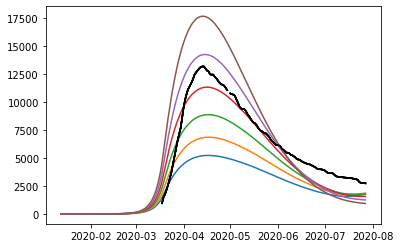

In [23]:
# Modify number of days
plt.figure(1)
for k in np.linspace(0.95,1.05,6):
    plot_model(best_v,0,k,1)
plt.show()

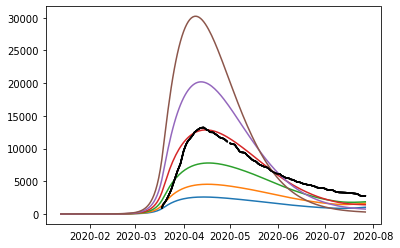

In [24]:
# Modify number of days
plt.figure(1)
for k in np.linspace(0.97,1.03,6):
    plot_model(best_v,0,1,k)
plt.show()

In [71]:
v = best_v

days_ahead = v[0]
alpha_mixing = v[1]
beta_mixing = v[2]
gamma_mixing_before = v[3]
gamma_mixing_after = v[3]*(1-v[4])
gamma_change = v[5] + v[0]


upper_bound_home = v[6]
upper_bound_leisure = v[7]
upper_bound_other = v[8]
upper_bound_school = v[9]
upper_bound_work = v[10]
upper_bound_transport = v[11]

leisure_v = v[12:29]
leisure_1 = leisure_v[0]
leisure_2 = leisure_v[1]
leisure_3 = leisure_v[2]
leisure_4 = leisure_v[3]
leisure_5 = leisure_v[4]
leisure_6 = leisure_v[5]
leisure_7 = leisure_v[6]
leisure_denom = leisure_1+leisure_2+leisure_3+leisure_4+leisure_5+leisure_6+leisure_7

other_v = v[19:26]
other_1 = other_v[0]
other_2 = other_v[1]
other_3 = other_v[2]
other_4 = other_v[3]
other_5 = other_v[4]
other_6 = other_v[5]
other_7 = other_v[6]
other_denom = other_1+other_2+other_3+other_4+other_5+other_6+other_7

work_v = v[26:33]
work_1 = work_v[0]
work_2 = work_v[1]
work_3 = work_v[2]
work_4 = work_v[3]
work_5 = work_v[4]
work_6 = work_v[5]
work_7 = work_v[6]
work_denom = work_1+work_2+work_3+work_4+work_5+work_6+work_7

transport_v = v[33:40]
transport_1 = transport_v[0]
transport_2 = transport_v[1]
transport_3 = transport_v[2]
transport_4 = transport_v[3]
transport_5 = transport_v[4]
transport_6 = transport_v[5]
transport_7 = transport_v[6]
transport_denom = transport_1+transport_2+transport_3+transport_4+transport_5+transport_6+transport_7


# Construct initialization
initialization = copy.deepcopy(original_initialization)
for i,group in enumerate(age_groups):
    if group == "age_group_40_49":
        initialization[group]["I"] = initialization[group]["I"] + 1
        initialization[group]["S"] = initialization[group]["S"] - 1
    initialization[group]["N"] = initialization[group]["S"] + initialization[group]["E"] + initialization[group]["I"] + initialization[group]["R"]


# Alphas
a_before_date_1 = {
    'home':upper_bound_home,
    'leisure':upper_bound_leisure,
    'other':upper_bound_other,
    'school':upper_bound_school,
    'transport':upper_bound_transport,
    'work':upper_bound_work
}
a_between_date_1_2 = {
    'home':upper_bound_home,
    'leisure':leisure_1/leisure_denom*upper_bound_leisure,
    'other':other_1/other_denom*upper_bound_other,
    'school':0,
    'transport':transport_1/transport_denom*upper_bound_transport,
    'work':work_1/work_denom*upper_bound_work
}
a_between_date_2_3 = {
    'home':upper_bound_home,
    'leisure':leisure_1/leisure_denom*upper_bound_leisure,
    'other':other_1/other_denom*upper_bound_other,
    'school':0,
    'transport':transport_1/transport_denom*upper_bound_transport,
    'work':work_1/work_denom*upper_bound_work
}
a_between_date_3_4 = {
    'home':upper_bound_home,
    'leisure':(leisure_1+leisure_2)/leisure_denom*upper_bound_leisure,
    'other':(other_1+other_2)/other_denom*upper_bound_other,
    'school':0.33*upper_bound_school,
    'transport':(transport_1+transport_2)/transport_denom*upper_bound_transport,
    'work':(work_1+work_2)/work_denom*upper_bound_work
}
a_between_date_4_5 = {
    'home':upper_bound_home,
    'leisure':(leisure_1+leisure_2+leisure_3)/leisure_denom*upper_bound_leisure,
    'other':(other_1+other_2+other_3)/other_denom*upper_bound_other,
    'school':0.67*upper_bound_school,
    'transport':(transport_1+transport_2+transport_3)/transport_denom*upper_bound_transport,
    'work':(work_1+work_2+work_3)/work_denom*upper_bound_work
}
a_between_date_5_6 = {
    'home':upper_bound_home,
    'leisure':(leisure_1+leisure_2+leisure_3+leisure_4)/leisure_denom*upper_bound_leisure,
    'other':(other_1+other_2+other_3+other_4)/other_denom*upper_bound_other,
    'school':0.67*upper_bound_school,
    'transport':(transport_1+transport_2+transport_3+transport_4)/transport_denom*upper_bound_transport,
    'work':(work_1+work_2+work_3+work_4)/work_denom*upper_bound_work
}
a_between_date_6_7 = {
    'home':upper_bound_home,
    'leisure':(leisure_1+leisure_2+leisure_3+leisure_4+leisure_5)/leisure_denom*upper_bound_leisure,
    'other':(other_1+other_2+other_3+other_4+other_5)/other_denom*upper_bound_other,
    'school':1.0*upper_bound_school,
    'transport':(transport_1+transport_2+transport_3+transport_4+transport_5)/transport_denom*upper_bound_transport,
    'work':(work_1+work_2+work_3+work_4+work_5)/work_denom*upper_bound_work
}
a_after_date_7 = {
    'home':upper_bound_home,
    'leisure':(leisure_1+leisure_2+leisure_3+leisure_4+leisure_5+leisure_6)/leisure_denom*upper_bound_leisure,
    'other':(other_1+other_2+other_3+other_4+other_5+other_6)/other_denom*upper_bound_other,
    'school':1.0*upper_bound_school,
    'transport':(transport_1+transport_2+transport_3+transport_4+transport_5+transport_6)/transport_denom*upper_bound_transport,
    'work':(work_1+work_2+work_3+work_4+work_5+work_6)/work_denom*upper_bound_work
}

# Determine mixing method
mixing_method_before = {
    "name":"mult",
    "param_alpha":alpha_mixing,
    "param_beta":beta_mixing,
    "fixed_gamma":gamma_mixing_before,
}

# Determine mixing method
mixing_method_after = {
    "name":"mult",
    "param_alpha":alpha_mixing,
    "param_beta":beta_mixing,
    "fixed_gamma":gamma_mixing_after,
}
#dynModel.mixing_method = mixing_method_after

# Number of days
days_before_date_1 = int(days_ahead)
days_between_dates_1_2 = (date_2-date_1).days
days_between_dates_2_3 = (date_3-date_2).days
days_between_dates_3_4 = (date_4-date_3).days
days_between_dates_4_5 = (date_5-date_4).days
days_between_dates_5_6 = (date_6-date_5).days
days_between_dates_6_7 = (date_7-date_6).days

days_after_date_7 = (final_date-date_7).days
total_days = days_before_date_1 + days_between_dates_1_2 + days_between_dates_2_3 + days_between_dates_3_4 + days_between_dates_4_5+ days_between_dates_5_6+ days_between_dates_6_7 + days_after_date_7



# Calculate alphas
alphas_vec = []
for t in range(days_before_date_1):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_before_date_1
    alphas_vec.append(alphas)
for t in range(days_between_dates_1_2):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_between_date_1_2
    alphas_vec.append(alphas)
for t in range(days_between_dates_2_3):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_between_date_2_3
    alphas_vec.append(alphas)
for t in range(days_between_dates_3_4):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_between_date_3_4
    alphas_vec.append(alphas)
for t in range(days_between_dates_4_5):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_between_date_4_5
    alphas_vec.append(alphas)
for t in range(days_between_dates_5_6):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_between_date_5_6
    alphas_vec.append(alphas)
for t in range(days_between_dates_6_7):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_between_date_6_7
    alphas_vec.append(alphas)
for t in range(days_after_date_7):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_after_date_7
    alphas_vec.append(alphas)

mixing_vec = []
for t in range(int(gamma_change)):
    mixing_vec.append(mixing_method_before)
for t in range(int(gamma_change),total_days):
    mixing_vec.append(mixing_method_after)




# Calculate tests
tests = np.zeros(len(age_groups))


# Run model
model_data_beds = {ag:[] for ag in age_groups+["total"]}
model_data_icus = {ag:[] for ag in age_groups+["total"]}
model_data_deaths = {ag:[] for ag in age_groups+["total"]}

state = state_to_matrix(initialization)
t_beds = 0
t_icus = 0
t_deaths = 0
for i,ag in enumerate(age_groups):
    state_H = state[i,cont.index("H")]
    state_ICU = state[i,cont.index("ICU")]
    state_D = state[i,cont.index("D")]
    model_data_beds[ag].append(state_H)
    model_data_icus[ag].append(state_ICU)
    model_data_deaths[ag].append(state_D)
    t_beds+= state_H
    t_icus+= state_ICU
    t_deaths+= state_D
model_data_beds["total"].append(t_beds)
model_data_icus["total"].append(t_icus)
model_data_deaths["total"].append(t_deaths)

recalc_days = [0,
             days_before_date_1,
             days_before_date_1+days_between_dates_1_2,
             days_before_date_1+days_between_dates_1_2+days_between_dates_2_3,
             days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4,
             days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5,
             days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5+days_between_dates_5_6,
             days_before_date_1+days_between_dates_1_2+days_between_dates_2_3+days_between_dates_3_4+days_between_dates_4_5+days_between_dates_5_6+days_between_dates_6_7,
            int(gamma_change)
            ]

for t in range(total_days):
    if t in recalc_days:
        update_contacts = True
    else:
        update_contacts = False
    dynModel.mixing_method = mixing_vec[t]
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]), "", update_contacts=update_contacts)
    t_beds = 0
    t_icus = 0
    t_deaths = 0
    for i,ag in enumerate(age_groups):
        state_H = state[i,cont.index("H")]
        state_ICU = state[i,cont.index("ICU")]
        state_D = state[i,cont.index("D")]
        model_data_beds[ag].append(state_H)
        model_data_icus[ag].append(state_ICU)
        model_data_deaths[ag].append(state_D)
        t_beds+= state_H
        t_icus+= state_ICU
        t_deaths+= state_D
    model_data_beds["total"].append(t_beds)
    model_data_icus["total"].append(t_icus)
    model_data_deaths["total"].append(t_deaths)


initial_date = date_1-timedelta(days=days_before_date_1)

# Calculate the days of the model
days_model = [initial_date+timedelta(days = t) for t in range(total_days + 1)]

# Indices where to put the real data
indices = [(datetime.strptime(d, '%Y-%m-%d') - initial_date).days for d in days]

# Real data
real_data_beds = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
real_data_icus = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
real_data_deaths = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}

for k,ind in enumerate(indices):
    for ag in age_groups+["total"]:
        real_data_beds[ag][ind] = beds_real[ag][k]
        real_data_icus[ag][ind] = icus_real[ag][k]
        real_data_deaths[ag][ind] = deaths_real[ag][k]


error_beds = 0
error_icus = 0
error_deaths = 0
for ag in age_groups:
    error_beds += np.nanmean(np.abs(np.array(model_data_beds[ag])-np.array(real_data_beds[ag])))
    error_icus += np.nanmean(np.abs(np.array(model_data_icus[ag])-np.array(real_data_icus[ag])))
    error_deaths += np.nanmean(np.abs(np.array(model_data_deaths[ag])-np.array(real_data_deaths[ag])))
error_beds_total = np.nanmean(np.abs(np.array(model_data_beds["total"])-np.array(real_data_beds["total"])))
error_icus_total = np.nanmean(np.abs(np.array(model_data_icus["total"])-np.array(real_data_icus["total"])))
error_deaths_total = np.nanmean(np.abs(np.array(model_data_deaths["total"])-np.array(real_data_deaths["total"])))

diff = np.array(model_data_beds["total"])-np.array(real_data_beds["total"])
error_beds_above = np.nanmean([max(d,0) for d in diff])
error_beds_below = -np.nanmean([min(d,0) for d in diff])

cumm_beds_model = [sum([model_data_beds["total"][k] for k in range(i+1) if not math.isnan(real_data_beds["total"][k])]) for i in range(len(model_data_beds["total"]))]
cumm_beds_real = [sum([real_data_beds["total"][k] for k in range(i+1) if not math.isnan(real_data_beds["total"][k])]) for i in range(len(real_data_beds["total"]))]
diff_cumm = np.array(cumm_beds_model)-np.array(cumm_beds_real)
error_cumm_above = np.nanmean([max(d,0) for d in diff_cumm])
error_cumm_below = -np.nanmean([min(d,0) for d in diff_cumm])



#     error = error_beds_total
#     error = mult_icus*error_icus_total
#     error = mult_deaths*error_deaths_total
upper_model_data = model_data_beds["total"]
upper_days_model = days_model
upper_real_data = real_data_beds["total"]
error = error_beds+5*error_beds_total




print(a_before_date_1)
print(a_between_date_1_2)
print(a_between_date_2_3)
print(a_between_date_3_4)
print(a_between_date_4_5)
print(a_between_date_5_6)
print(a_between_date_6_7)
print(a_after_date_7)


{'home': 0.99615458, 'leisure': 0.89687269, 'other': 0.8787483, 'school': 0.96537944, 'transport': 0.90696783, 'work': 0.96665457}
{'home': 0.99615458, 'leisure': 0.20921094027057996, 'other': 0.2002429065401181, 'school': 0, 'transport': 0.1285365847945069, 'work': 0.07002537255491703}
{'home': 0.99615458, 'leisure': 0.20921094027057996, 'other': 0.2002429065401181, 'school': 0, 'transport': 0.1285365847945069, 'work': 0.07002537255491703}
{'home': 0.99615458, 'leisure': 0.32973789745556326, 'other': 0.37003371472091034, 'school': 0.3185752152, 'transport': 0.29753347235950023, 'work': 0.17949385689413305}
{'home': 0.99615458, 'leisure': 0.37745349538716355, 'other': 0.48810208335820676, 'school': 0.6468042248, 'transport': 0.4386431730791975, 'work': 0.3092110380246333}
{'home': 0.99615458, 'leisure': 0.4564005445307087, 'other': 0.5560456184026783, 'school': 0.6468042248, 'transport': 0.5952647002357705, 'work': 0.3887024353997366}
{'home': 0.99615458, 'leisure': 0.5797011779305301,

In [72]:
with open("../initialization/initialization.yaml") as file:
    initialization = yaml.load(file, Loader=yaml.FullLoader)
with open("../parameters/Ile-de-France.yaml") as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    universe_params = yaml.load(file, Loader=yaml.FullLoader)


In [73]:
# Modify parameters
universe_params['mixing'] = {
    "name":"mult",
    "param_alpha":float(alpha_mixing),
    "param_beta":float(beta_mixing),
    "param_gamma_before":float(gamma_mixing_before),
    "param_gamma_after":float(gamma_mixing_after),
}
universe_params['days_before_gamma'] = gamma_change
universe_params['upper_bounds'] = {
    "transport":float(upper_bound_transport),
    "leisure":float(upper_bound_leisure),
    "other":float(upper_bound_other),
    "school":float(upper_bound_school),
    "home":float(upper_bound_home),
    "work":float(upper_bound_work)
}
    
with open('../parameters/fitted.yaml', 'w') as file:
    yaml.dump(universe_params, file)
    

In [74]:
days_ahead

55.76574406

In [75]:
# Add economic value parameters
contrib = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="contributions_normal", index_col = 0)
gains = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="activity_levels_as_%_of_full", index_col = 0)

empl_params = {}
empl_params["v"] = {}
for age_group in age_groups:
    empl_params["v"][age_group] = {}
    for activity in econ_activities:
        empl_params["v"][age_group][activity] = float(contrib[age_group][activity])/365.0


In [76]:
# Calculate l-april and l-may
l_april = a_between_date_1_2
l_may = {}
for a in a_between_date_1_2.keys():
    l_may[a] = a_between_date_1_2[a]/3.0 + a_between_date_3_4[a]*2.0/3.0

In [77]:
l_april

{'home': 0.99615458,
 'leisure': 0.20921094027057996,
 'other': 0.2002429065401181,
 'school': 0,
 'transport': 0.1285365847945069,
 'work': 0.07002537255491703}

In [78]:
l_may

{'home': 0.99615458,
 'leisure': 0.2895622450605688,
 'other': 0.31343677866064623,
 'school': 0.2123834768,
 'transport': 0.24120117650450243,
 'work': 0.14300436211439438}

In [107]:
eq_activities = ['leisure','other','school','transport']
t = 0.5
nu = (1-t)*(1-l_may["work"])/(1-0.5851)
eta = t*(1-np.mean([l_may[act] for act in eq_activities]))/(1-0.5851)
gamma = 1-nu-eta
print(nu,eta,gamma)
empl_params['nu'] = 0.33
empl_params['eta'] = 0.33
empl_params['gamma'] = 0.34

1.0327737260612262 0.8867848647186919 -0.9195585907799181


In [108]:
# from gurobipy import *

# eq_activities = ['leisure','other','school','transport']
# upper_bounds = {
#     "transport":upper_bound_transport,
#     "leisure":upper_bound_leisure,
#     "other":upper_bound_other,
#     "school":upper_bound_school,
#     "home":upper_bound_home,
#     "work":upper_bound_work,
# }
# m = Model()
# nu = m.addVar(vtype=GRB.CONTINUOUS, name="nu", lb = 0)
# gamma = m.addVar(vtype=GRB.CONTINUOUS, name="gamma", lb = 0)
# epsilonp_1 = m.addVar(vtype=GRB.CONTINUOUS, name="epsilonp_1", lb = 0)
# epsilonn_1 = m.addVar(vtype=GRB.CONTINUOUS, name="epsilonn_1", lb = 0)
# epsilonp_2 = m.addVar(vtype=GRB.CONTINUOUS, name="epsilonp_2", lb = 0)
# epsilonn_2 = m.addVar(vtype=GRB.CONTINUOUS, name="epsilonn_2", lb = 0)

# m.addConstr(nu*upper_bound_work+gamma==1)
# m.addConstr(
#         nu*l_april["work"]  + gamma == 0.5851+epsilonp_1-epsilonn_1
# )
# m.addConstr(
#         nu*l_may["work"] + gamma == 0.7170+epsilonp_2-epsilonn_2
# )
# m.setObjective(epsilonp_1+epsilonn_1+epsilonp_2+epsilonn_2)
# m.update()
# m.optimize()
# print("nu",nu.x)
# print("gamma",gamma.x)
# empl_params['nu'] = float(nu.x)
# empl_params['gamma'] = float(gamma.x)

In [109]:
empl_params

{'v': {'age_group_0_9': {'transport': 0.0, 'leisure': 0.0, 'other': 0.0},
  'age_group_10_19': {'transport': 0.42995936063784673,
   'leisure': 0.7068903576182438,
   'other': 4.574913439411911},
  'age_group_20_29': {'transport': 2.421870523023006,
   'leisure': 3.981764503475539,
   'other': 25.769523863503046},
  'age_group_30_39': {'transport': 5.3207402525299345,
   'leisure': 8.74775693759741,
   'other': 56.61448108213707},
  'age_group_40_49': {'transport': 6.5473065780407085,
   'leisure': 10.764338009809762,
   'other': 69.6655628368981},
  'age_group_50_59': {'transport': 6.717886370840974,
   'leisure': 11.04478593529775,
   'other': 71.48058969296267},
  'age_group_60_69': {'transport': 2.606993951947998,
   'leisure': 4.286123424007397,
   'other': 27.739299941136395},
  'age_group_70_79': {'transport': 0.0, 'leisure': 0.0, 'other': 0.0},
  'age_group_80_plus': {'transport': 0.0, 'leisure': 0.0, 'other': 0.0}},
 'nu': 0.33,
 'eta': 0.33,
 'gamma': 0.34}

In [110]:
# Calculate the schooling parameter
r = 0.03
schooling_param = {}
for age_group in age_groups:
    if age_group == "age_group_0_9":
        schooling_param[age_group] = (1+r)**(-15)*sum([empl_params["v"]["age_group_20_29"][act] for act in econ_activities])/upper_bound_school
    elif age_group == "age_group_10_19":
        schooling_param[age_group] = 0.907*(1+r)**(-5)*sum([empl_params["v"]["age_group_20_29"][act] for act in econ_activities])/upper_bound_school
    else:
        schooling_param[age_group] = 0

In [111]:
# Calculate the cost of death
econ_cost_death = {}
age_groups_n = [0,10,20,30,40,50,60,70,80]
for i,age_group in enumerate(age_groups):
    s = 0
    for tao in range(age_groups_n[i]+5,70):
        ag = "age_group_%d_%d"%(int(tao/10)*10,int(tao/10)*10+9)
        s+=(1+r)**(-(tao-age_groups_n[i]))*sum([empl_params["v"][ag][act] for act in econ_activities])*365
    econ_cost_death[age_group] = float(s)

In [112]:
econ_params = {
    "employment_params":empl_params,
    "schooling_params":schooling_param,
    "econ_cost_death":econ_cost_death,
    "upper_bounds":upper_bounds,
}
with open('../parameters/econ.yaml', 'w') as file:
    yaml.dump(econ_params, file)

In [113]:
print(econ_params)

{'employment_params': {'v': {'age_group_0_9': {'transport': 0.0, 'leisure': 0.0, 'other': 0.0}, 'age_group_10_19': {'transport': 0.42995936063784673, 'leisure': 0.7068903576182438, 'other': 4.574913439411911}, 'age_group_20_29': {'transport': 2.421870523023006, 'leisure': 3.981764503475539, 'other': 25.769523863503046}, 'age_group_30_39': {'transport': 5.3207402525299345, 'leisure': 8.74775693759741, 'other': 56.61448108213707}, 'age_group_40_49': {'transport': 6.5473065780407085, 'leisure': 10.764338009809762, 'other': 69.6655628368981}, 'age_group_50_59': {'transport': 6.717886370840974, 'leisure': 11.04478593529775, 'other': 71.48058969296267}, 'age_group_60_69': {'transport': 2.606993951947998, 'leisure': 4.286123424007397, 'other': 27.739299941136395}, 'age_group_70_79': {'transport': 0.0, 'leisure': 0.0, 'other': 0.0}, 'age_group_80_plus': {'transport': 0.0, 'leisure': 0.0, 'other': 0.0}}, 'nu': 0.33, 'eta': 0.33, 'gamma': 0.34}, 'schooling_params': {'age_group_0_9': 21.391305390

In [114]:
# Initialization
# Construct initialization
initialization = copy.deepcopy(original_initialization)
for i,group in enumerate(age_groups):
    if group == "age_group_40_49":
        initialization[group]["I"] = initialization[group]["I"] + 1
        initialization[group]["S"] = initialization[group]["S"] - 1
    initialization[group]["N"] = initialization[group]["S"] + initialization[group]["E"] + initialization[group]["I"] + initialization[group]["R"]

# Run model
model_data = []
state = state_to_matrix(initialization)

for t in range(10):
    if t < universe_params['days_before_gamma']:
        lockdown_status = "pre-gamma"
    else:
        lockdown_status = "post-gamma"
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]),lockdown_status)

def matrix_to_state(m):
    state = {}
    for i,age_group in enumerate(age_groups):
        state[age_group] = {}
        for j,c in enumerate(cont):
            state[age_group][c] = float(m[i,j])
    return state

with open('../initialization/10days.yaml', 'w') as file:
    yaml.dump(matrix_to_state(state), file)
    

In [115]:
# Run model
model_data = []
state = state_to_matrix(initialization)

for t in range(20):
    if t < universe_params['days_before_gamma']:
        lockdown_status = "pre-gamma"
    else:
        lockdown_status = "post-gamma"
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]),lockdown_status)


with open('../initialization/20days.yaml', 'w') as file:
    yaml.dump(matrix_to_state(state), file)

In [116]:
# Run model
model_data = []
state = state_to_matrix(initialization)

for t in range(30):
    if t < universe_params['days_before_gamma']:
        lockdown_status = "pre-gamma"
    else:
        lockdown_status = "post-gamma"
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]),lockdown_status)

with open('../initialization/30days.yaml', 'w') as file:
    yaml.dump(matrix_to_state(state), file)

In [117]:
# Run model
model_data = []
state = state_to_matrix(initialization)

for t in range(40):
    if t < universe_params['days_before_gamma']:
        lockdown_status = "pre-gamma"
    else:
        lockdown_status = "post-gamma"
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]),lockdown_status)

with open('../initialization/40days.yaml', 'w') as file:
    yaml.dump(matrix_to_state(state), file)

In [118]:
# Run model
model_data = []
state = state_to_matrix(initialization)

for t in range(50):
    if t < universe_params['days_before_gamma']:
        lockdown_status = "pre-gamma"
    else:
        lockdown_status = "post-gamma"
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]),lockdown_status)


with open('../initialization/50days.yaml', 'w') as file:
    yaml.dump(matrix_to_state(state), file)

In [119]:
# Run model
model_data = []
state = state_to_matrix(initialization)

for t in range(60):
    if t < universe_params['days_before_gamma']:
        lockdown_status = "pre-gamma"
    else:
        lockdown_status = "post-gamma"
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]),lockdown_status)


with open('../initialization/60days.yaml', 'w') as file:
    yaml.dump(matrix_to_state(state), file)

In [120]:
a_before_date_1 = {
    'home':float(upper_bound_home),
    'leisure':float(upper_bound_leisure),
    'other':float(upper_bound_other),
    'school':float(upper_bound_school),
    'transport':float(upper_bound_transport),
    'work':float(upper_bound_work),
}
a_between_date_1_2 = {
    'home':float(upper_bound_home),
    'leisure':float(leisure_1/leisure_denom*upper_bound_leisure),
    'other':float(other_1/other_denom*upper_bound_other),
    'school':0,
    'transport':float(transport_1/transport_denom*upper_bound_transport),
    'work':float(work_1/work_denom*upper_bound_work),
}
a_between_date_2_3 = {
    'home':float(upper_bound_home),
    'leisure':float(leisure_1/leisure_denom*upper_bound_leisure),
    'other':float(other_1/other_denom*upper_bound_other),
    'school':0,
    'transport':float(transport_1/transport_denom*upper_bound_transport),
    'work':float(work_1/work_denom*upper_bound_work),
}
a_between_date_3_4 = {
    'home':float(upper_bound_home),
    'leisure':float((leisure_1+leisure_2)/leisure_denom*upper_bound_leisure),
    'other':float((other_1+other_2)/other_denom*upper_bound_other),
    'school':float(0.33*upper_bound_school),
    'transport':float((transport_1+transport_2)/transport_denom*upper_bound_transport),
    'work':float((work_1+work_2)/work_denom*upper_bound_work),
}
a_between_date_4_5 = {
    'home':float(upper_bound_home),
    'leisure':float((leisure_1+leisure_2+leisure_3)/leisure_denom*upper_bound_leisure),
    'other':float((other_1+other_2+other_3)/other_denom*upper_bound_other),
    'school':float(0.67*upper_bound_school),
    'transport':float((transport_1+transport_2+transport_3)/transport_denom*upper_bound_transport),
    'work':float((work_1+work_2+work_3)/work_denom*upper_bound_work),
}
a_between_date_5_6 = {
    'home':float(upper_bound_home),
    'leisure':float((leisure_1+leisure_2+leisure_3+leisure_4)/leisure_denom*upper_bound_leisure),
    'other':float((other_1+other_2+other_3+other_4)/other_denom*upper_bound_other),
    'school':float(0.67*upper_bound_school),
    'transport':float((transport_1+transport_2+transport_3+transport_4)/transport_denom*upper_bound_transport),
    'work':float((work_1+work_2+work_3+work_4)/work_denom*upper_bound_work),
}
a_between_date_6_7 = {
    'home':float(upper_bound_home),
    'leisure':float((leisure_1+leisure_2+leisure_3+leisure_4+leisure_5)/leisure_denom*upper_bound_leisure),
    'other':float((other_1+other_2+other_3+other_4+other_5)/other_denom*upper_bound_other),
    'school':float(1.0*upper_bound_school),
    'transport':float((transport_1+transport_2+transport_3+transport_4+transport_5)/transport_denom*upper_bound_transport),
    'work':float((work_1+work_2+work_3+work_4+work_5)/work_denom*upper_bound_work),
}
a_after_date_7 = {
    'home':float(upper_bound_home),
    'leisure':float((leisure_1+leisure_2+leisure_3+leisure_4+leisure_5+leisure_6)/leisure_denom*upper_bound_leisure),
    'other':float((other_1+other_2+other_3+other_4+other_5+other_6)/other_denom*upper_bound_other),
    'school':float(1.0*upper_bound_school),
    'transport':float((transport_1+transport_2+transport_3+transport_4+transport_5+transport_6)/transport_denom*upper_bound_transport),
    'work':float((work_1+work_2+work_3+work_4+work_5+work_6)/work_denom*upper_bound_work),
}

In [121]:
# Construct alphas
from copy import deepcopy
alphas = []

c = 0
# Alphas
for i in range(days_before_date_1):
    a_before_date_1.update({
        'date':(initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
        'days_from_lockdown':c-days_before_date_1,
    })
    alphas.append(deepcopy(a_before_date_1))
    c+=1
for i in range(days_between_dates_1_2):
    a_between_date_1_2.update({
        'date':(initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
        'days_from_lockdown':c-days_before_date_1,
    })
    alphas.append(deepcopy(a_between_date_1_2))
    c+=1
for i in range(days_between_dates_2_3):
    a_between_date_2_3.update({
        'date':(initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
        'days_from_lockdown':c-days_before_date_1,
    })
    alphas.append(deepcopy(a_between_date_2_3))
    c+=1
for i in range(days_between_dates_3_4):
    a_between_date_3_4.update({
        'date':(initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
        'days_from_lockdown':c-days_before_date_1,
    })
    alphas.append(deepcopy(a_between_date_3_4))
    c+=1
for i in range(days_between_dates_4_5):
    a_between_date_4_5.update({
        'date':(initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
        'days_from_lockdown':c-days_before_date_1,
    })
    alphas.append(deepcopy(a_between_date_4_5))
    c+=1
for i in range(days_between_dates_5_6):
    a_between_date_5_6.update({
        'date':(initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
        'days_from_lockdown':c-days_before_date_1,
    })
    alphas.append(deepcopy(a_between_date_5_6))
    c+=1
for i in range(days_between_dates_6_7):
    a_between_date_6_7.update({
        'date':(initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
        'days_from_lockdown':c-days_before_date_1,
    })
    alphas.append(deepcopy(a_between_date_6_7))
    c+=1
for i in range(days_after_date_7):
    a_after_date_7.update({
        'date':(initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
        'days_from_lockdown':c-days_before_date_1,
    })
    alphas.append(deepcopy(a_after_date_7))
    c+=1

with open('../policies/fitted.yaml', 'w') as file:
    yaml.dump(alphas, file)

In [122]:
del a_between_date_1_2['date']
del a_between_date_1_2['days_from_lockdown']
print(a_between_date_1_2)

{'home': 0.99615458, 'leisure': 0.20921094027057996, 'other': 0.2002429065401181, 'school': 0, 'transport': 0.1285365847945069, 'work': 0.07002537255491703}


In [123]:
with open('../lower_bounds/fitted.yaml', 'w') as file:
    yaml.dump(a_between_date_1_2, file)